# Analysis of missing values

Exploratory analysis of missing values, assessing their type (MCAR, MAR or MNAR) and potential solutions (imputations...).

- MCAR: the probability of missingness in one independent variable does not depend on the other observed independent variables, it only depends on some external factors ;
- MAR : if the probability of missingness is linked with one or more observed variables ;
- MNAR : if the probability of minssingness depends on the variable itself.

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import missingno as msno
from pyampute.exploration.mcar_statistical_tests import MCARTest
pd.set_option('display.max_columns', None)

In [122]:
def remove_col(df, threshold=30):
    df_num = df.select_dtypes(include=np.number)
    df_non_num = df.select_dtypes(exclude=np.number)
    num_cols_to_drop = [col for col in df_num.columns if (df_num[col].isna().sum() / len(df_num[col])) * 100 > threshold]
    df_num.drop(num_cols_to_drop, axis=1, inplace=True)
    non_num_cols_to_drop = [col for col in df_non_num.columns if (df_non_num[col].isna().sum() / len(df_non_num[col])) * 100 > threshold]
    df_non_num.drop(non_num_cols_to_drop, axis=1, inplace=True)
    print(f'Numeric columns dropped: {num_cols_to_drop}')
    print(f'Non-numeric columns dropped: {non_num_cols_to_drop}')
    return pd.concat([df_non_num, df_num], axis=1)

def plot_data_with_stacked_bars(df, sort_column):
    def stacked_bar_by_changes(df, sort_column, ax):
        sorted_df = df.sort_values(by=sort_column)
        sorted_df.reset_index(inplace=True, drop=True)

        unique_values = sorted_df[sort_column].unique()
        bottom = 0
        for value in unique_values:
            filtered_df = sorted_df[sorted_df[sort_column] == value]

            if not filtered_df.empty:
                start_idx_stack = filtered_df.index[0]
                end_idx_stack = filtered_df.index[-1]

                height = end_idx_stack - start_idx_stack + 1

                ax.bar(x=0, height=height, bottom=bottom, width=0.5, label=f'{value}')
                annotation_y_position = bottom + height / 2

                ax.annotate(f'{value}', 
                            (0, annotation_y_position), 
                            textcoords="offset points", 
                            xytext=(5, 0), 
                            ha='center', 
                            va='center')
                bottom += height

        ax.set_ylim(bottom, 0)
        ax.set_ylabel('Index of the sorted column, stacked by values')
        ax.set_title(f'Stacked Bar Plot by Changes in {sort_column}')

    unique_value_count = len(df[sort_column].unique())

    if unique_value_count <= 50:
        # Create plot with both msno.matrix and bar plot
        fig = plt.figure(figsize=(20, 10))
        gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4])

        ax0 = plt.subplot(gs[0])
        ax1 = plt.subplot(gs[1])

        sorted_test = df.sort_values(sort_column)
        msno.matrix(sorted_test, ax=ax1, sparkline=False)
        ax1.set_title(f'Patterns of missing values in Testing set ({sort_column} sort)')

        stacked_bar_by_changes(df, sort_column, ax0)

    else:
        # Create plot with only msno.matrix
        fig, ax1 = plt.subplots(figsize=(20, 10))

        sorted_test = df.sort_values(sort_column)
        msno.matrix(sorted_test, ax=ax1, sparkline=False)
        ax1.set_title(f'Patterns of missing values in Testing set ({sort_column} sort)')

    plt.tight_layout()
    plt.show()

Starting of with the PHL dataset

In [123]:
df = pd.read_csv('data/phl_data.csv') 

I will only keep columns I'm interesting in for the modelling of planets habitability (regression and classification). In a first part, I remove columns with a too high percentage of missing values (threshold set arbitrarly at 30%).

In [124]:
col_to_drop = ['P_NAME', 'S_NAME', 'S_CONSTELLATION', 'P_YEAR', 'S_RA', 'S_DEC', 'hip_name', 'hd_name', 'matched']
df.drop(col_to_drop, axis=1, inplace=True)
df = remove_col(df)

Numeric columns dropped: []
Non-numeric columns dropped: ['S_TYPE']


Visualization of missing values per columns.

In [125]:
null_values_df = df.isnull().mean().sort_values(ascending=False)*100
null_values_df = null_values_df[null_values_df>0]

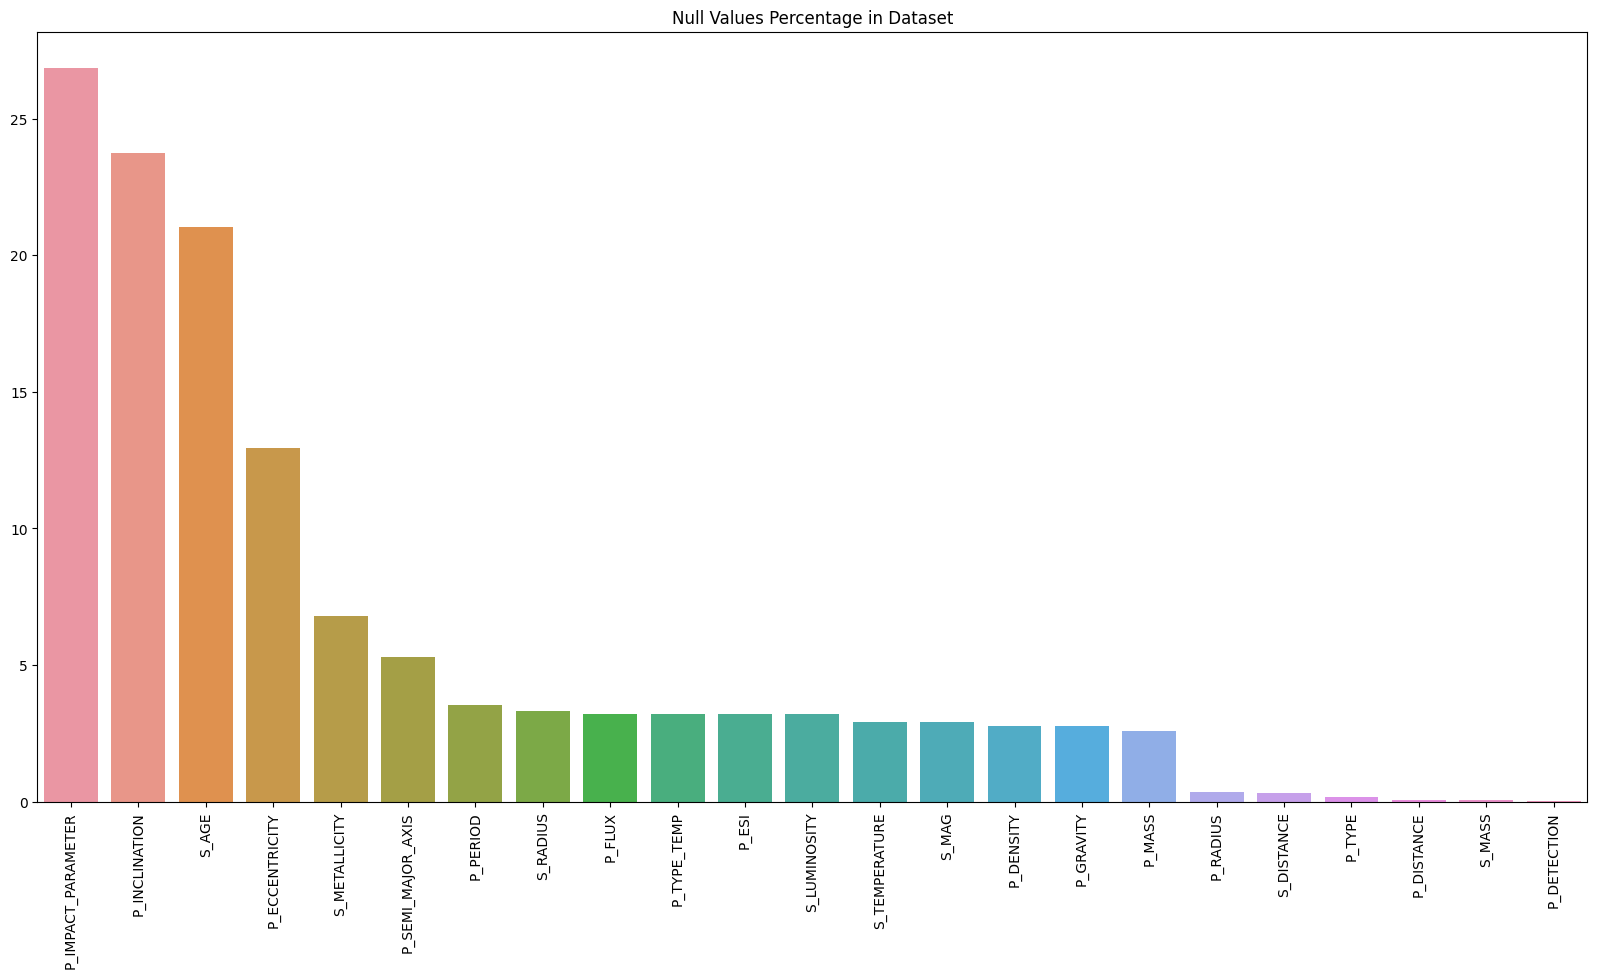

In [126]:
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x=null_values_df.index, y=null_values_df.values)
ax.set_title('Null Values Percentage in Dataset')
plt.xticks(rotation=90) 
plt.show()

Still a few columns with a lot of missing values. Let's look at the pattern of missing values.

<AxesSubplot: >

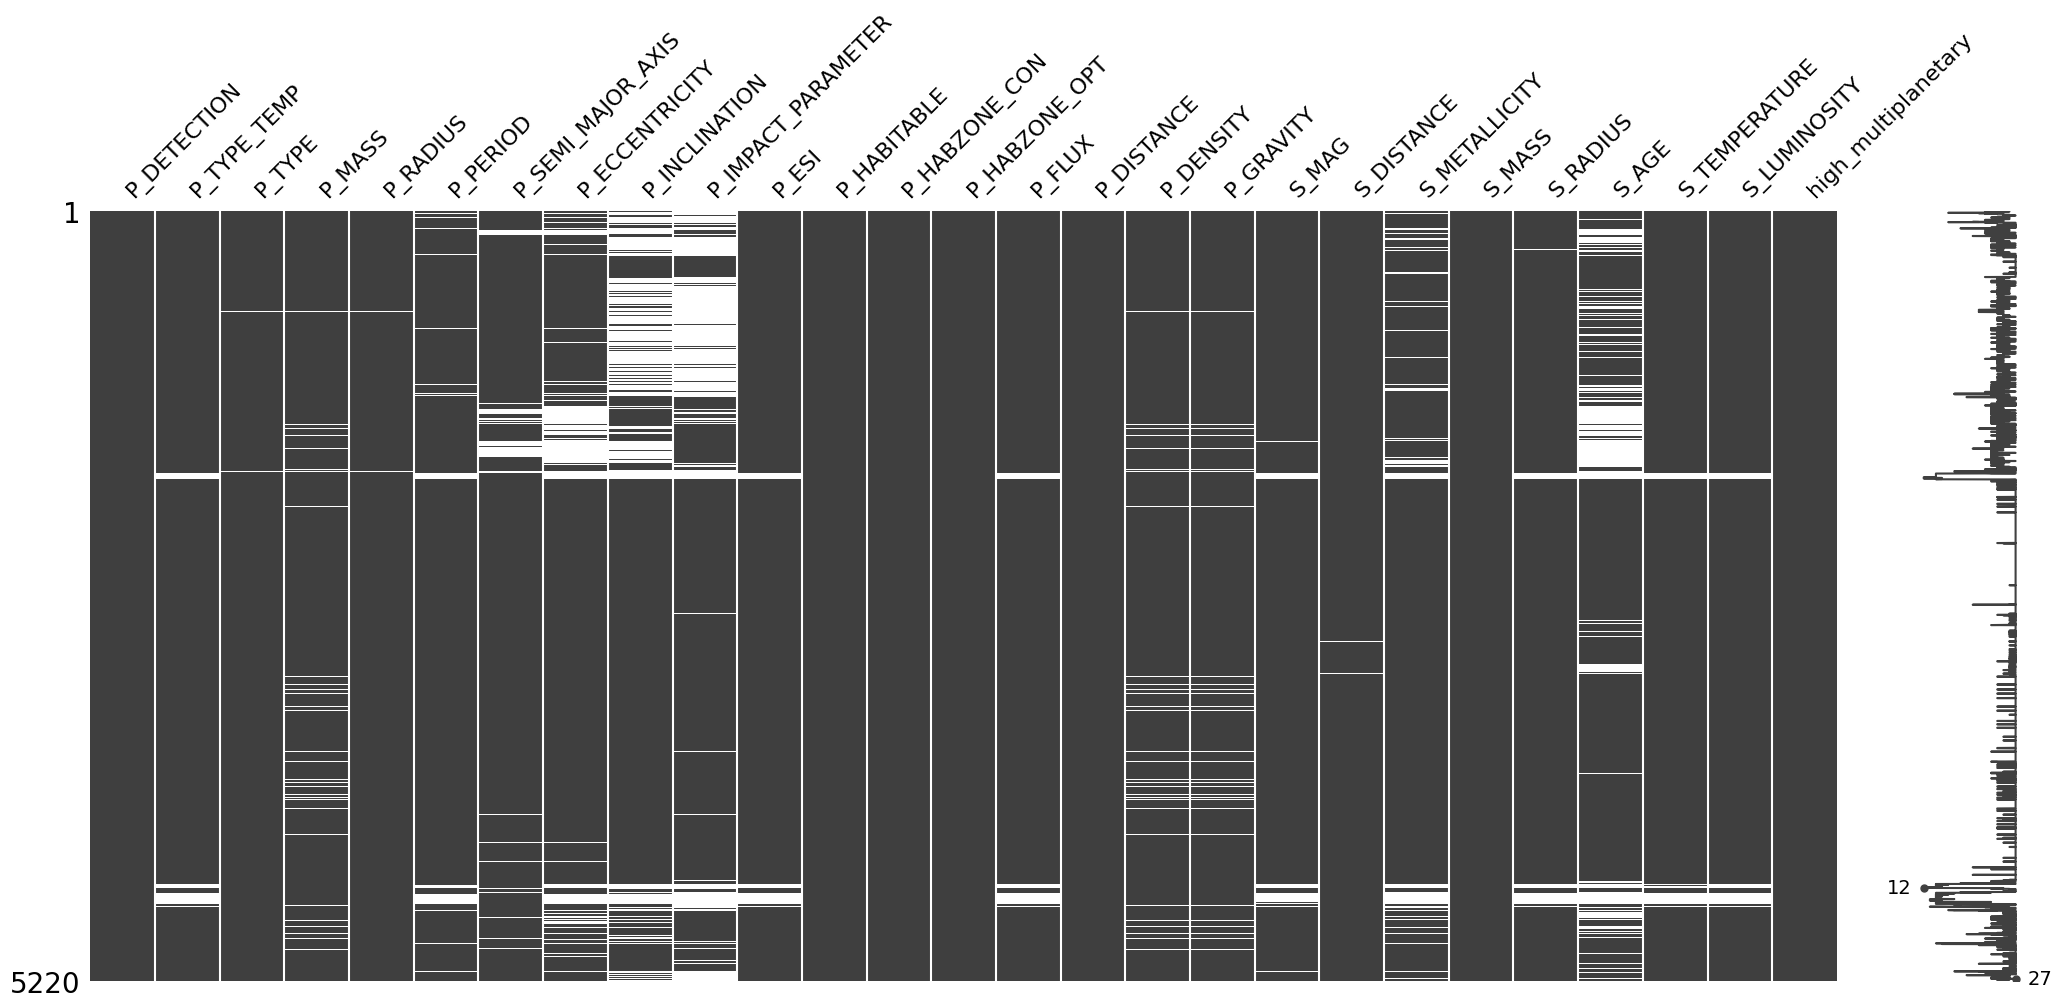

In [127]:
msno.matrix(df)

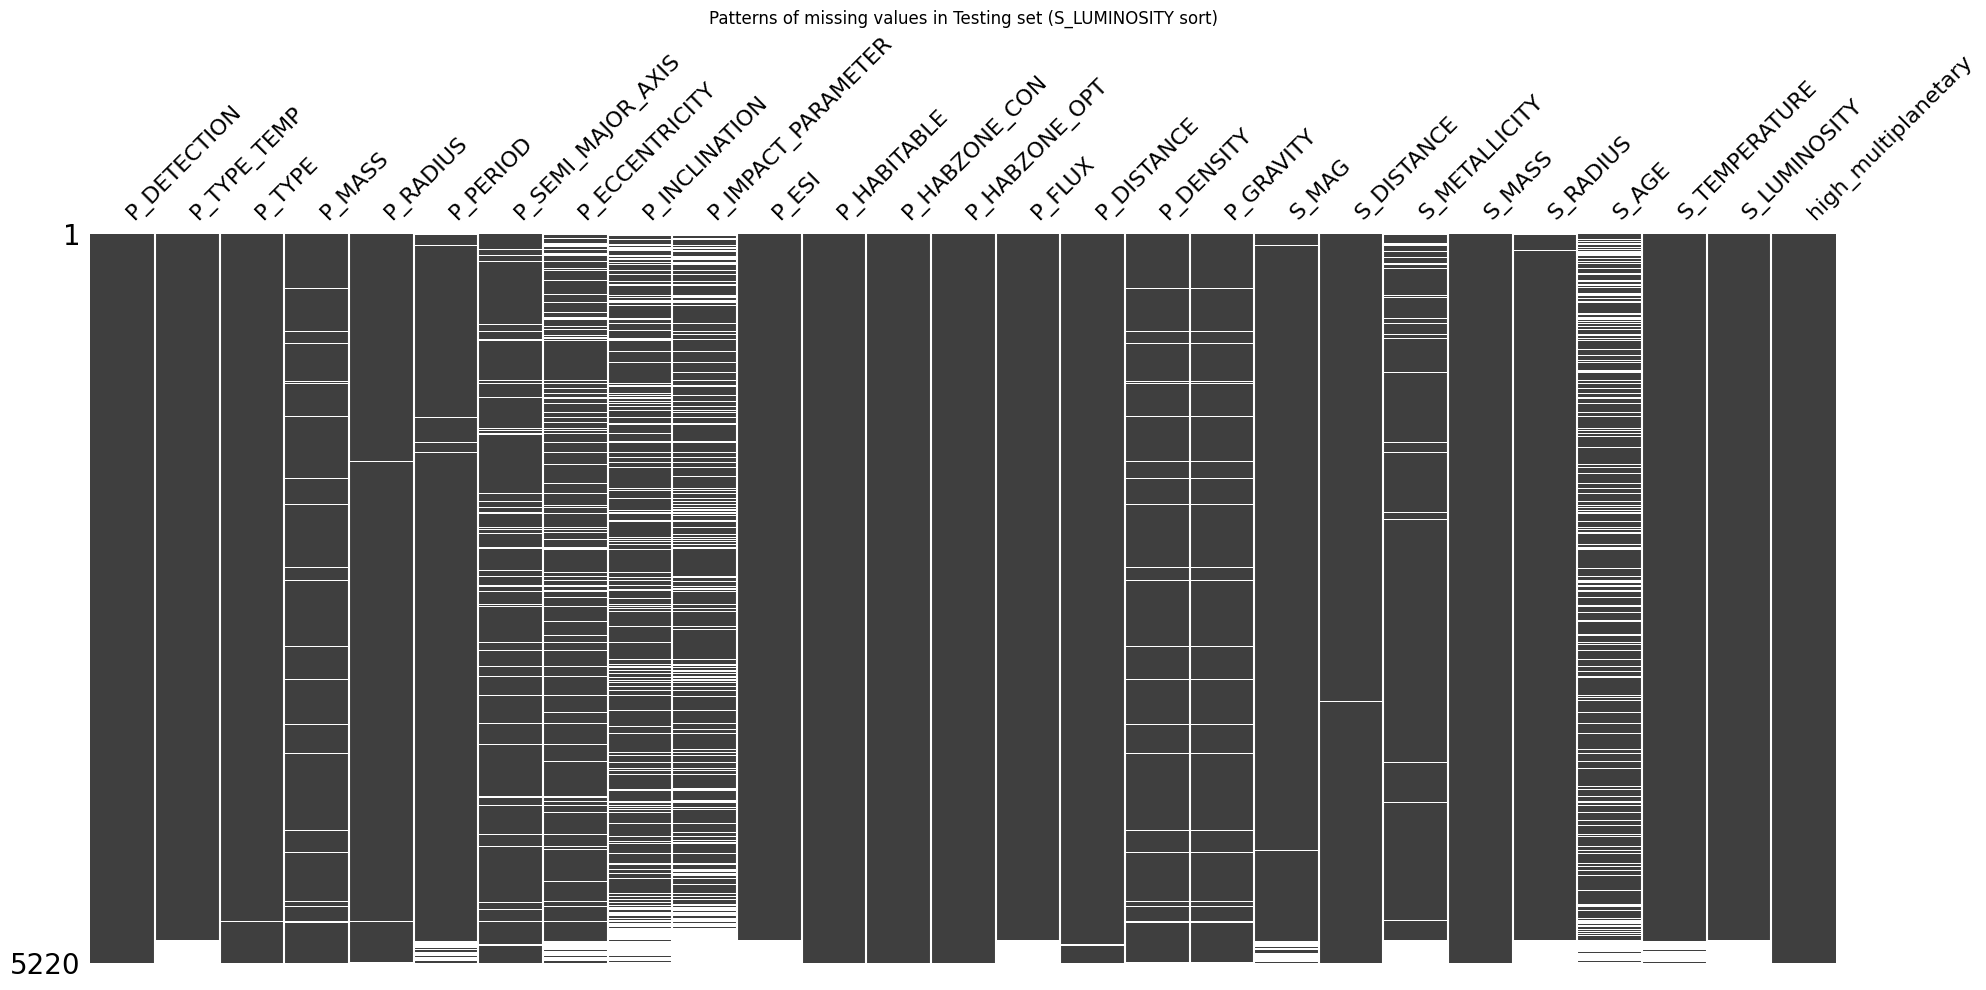

In [128]:
plot_data_with_stacked_bars(df, 'S_LUMINOSITY')

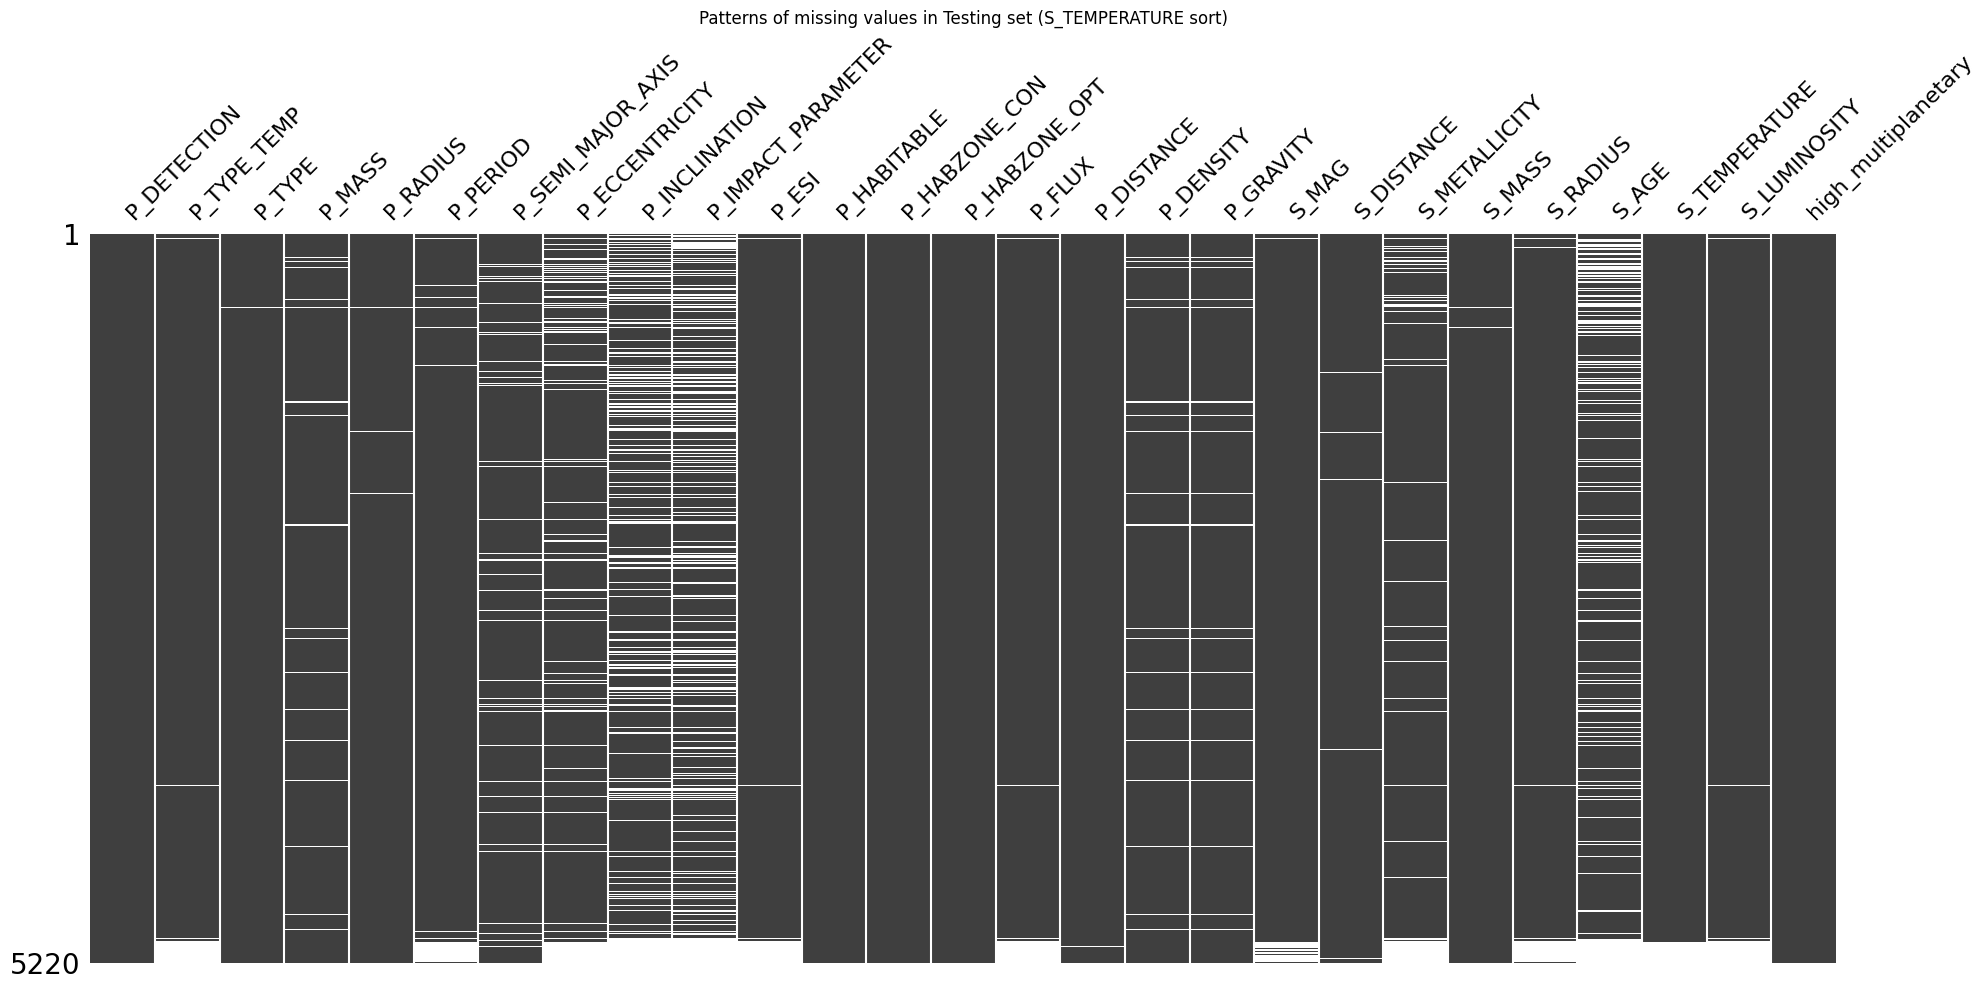

In [129]:
plot_data_with_stacked_bars(df, 'S_TEMPERATURE')

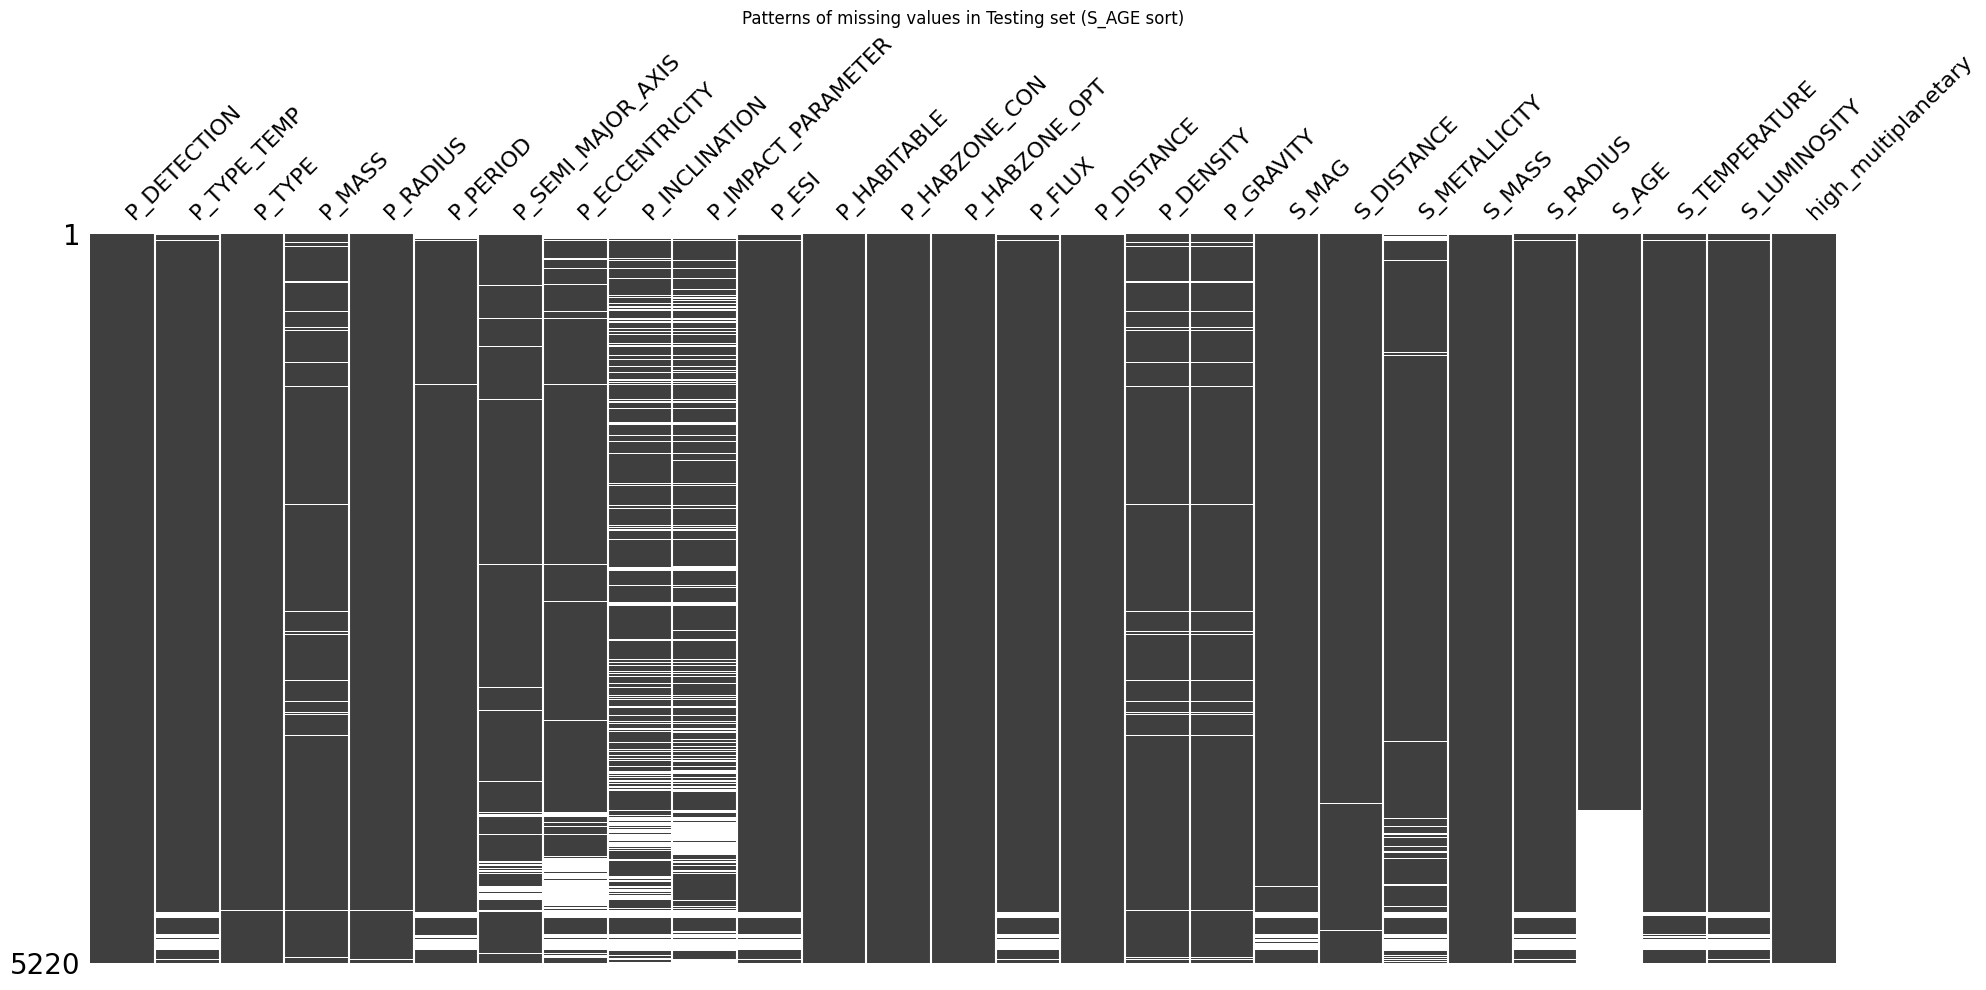

In [130]:
plot_data_with_stacked_bars(df, 'S_AGE')

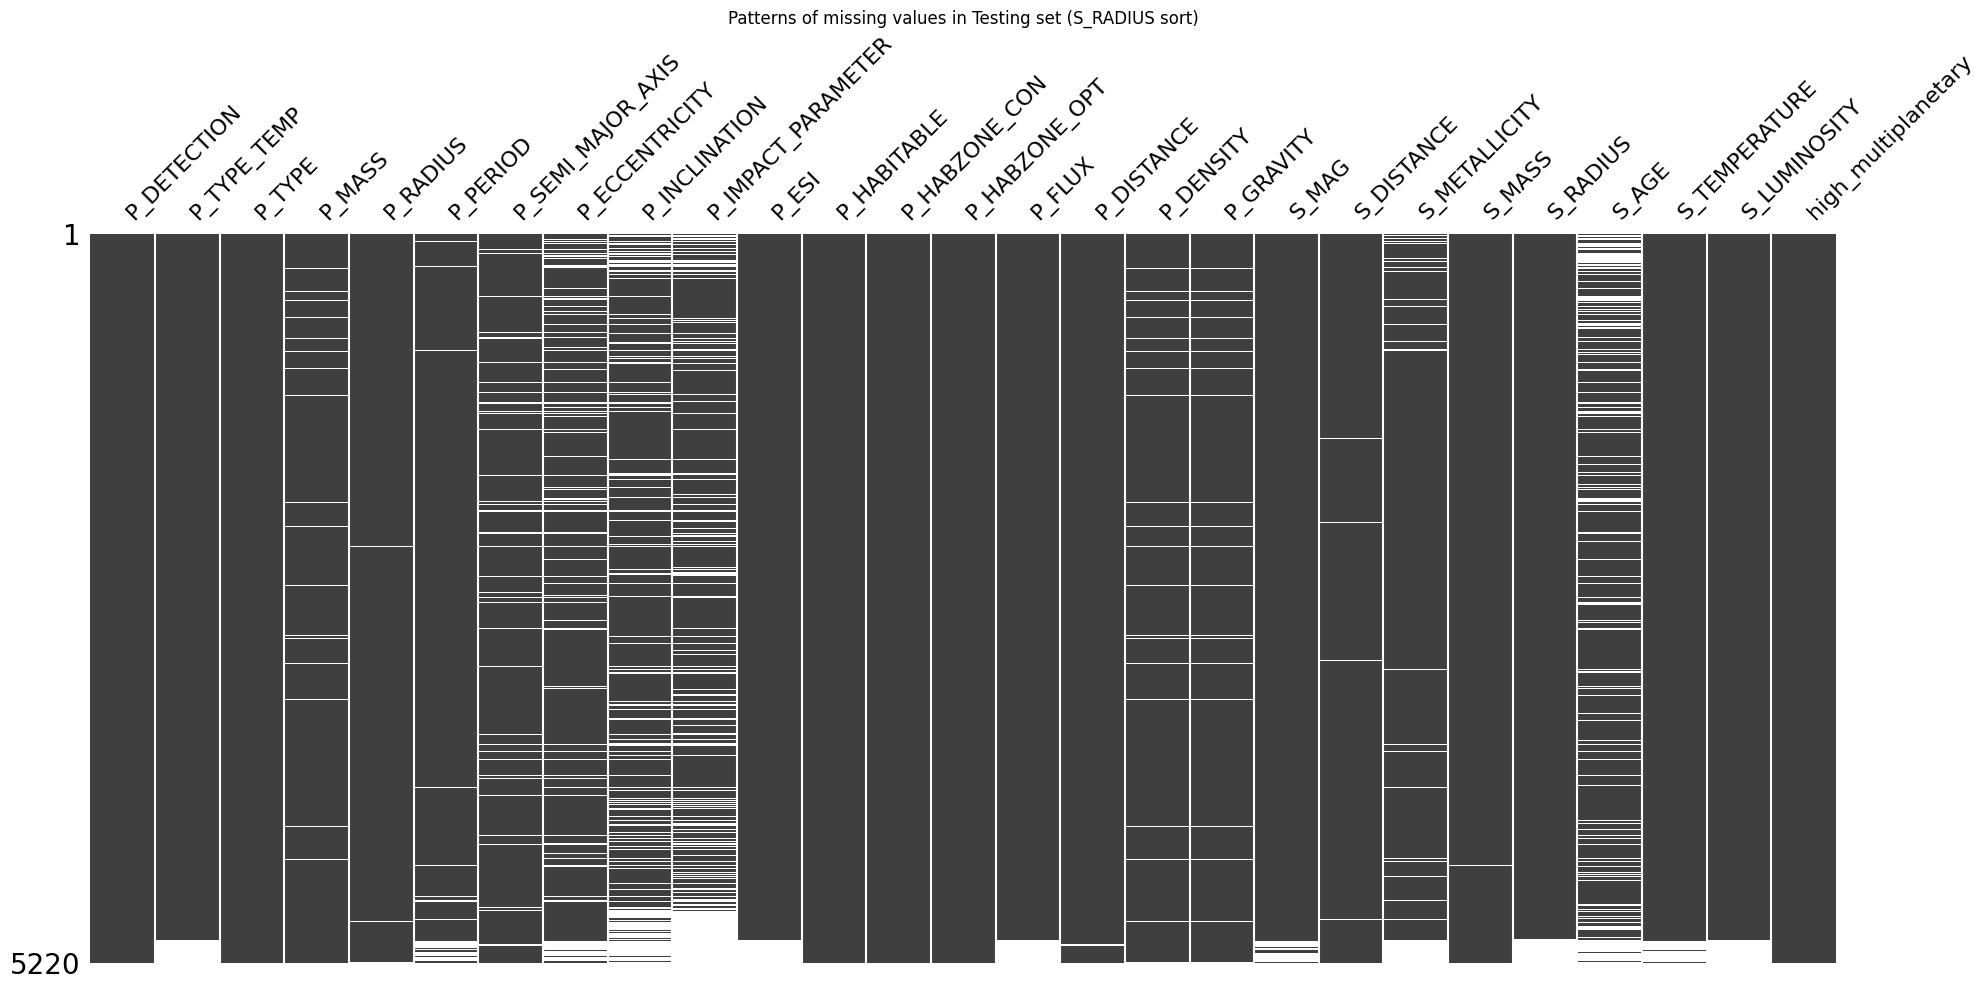

In [131]:
plot_data_with_stacked_bars(df, 'S_RADIUS')

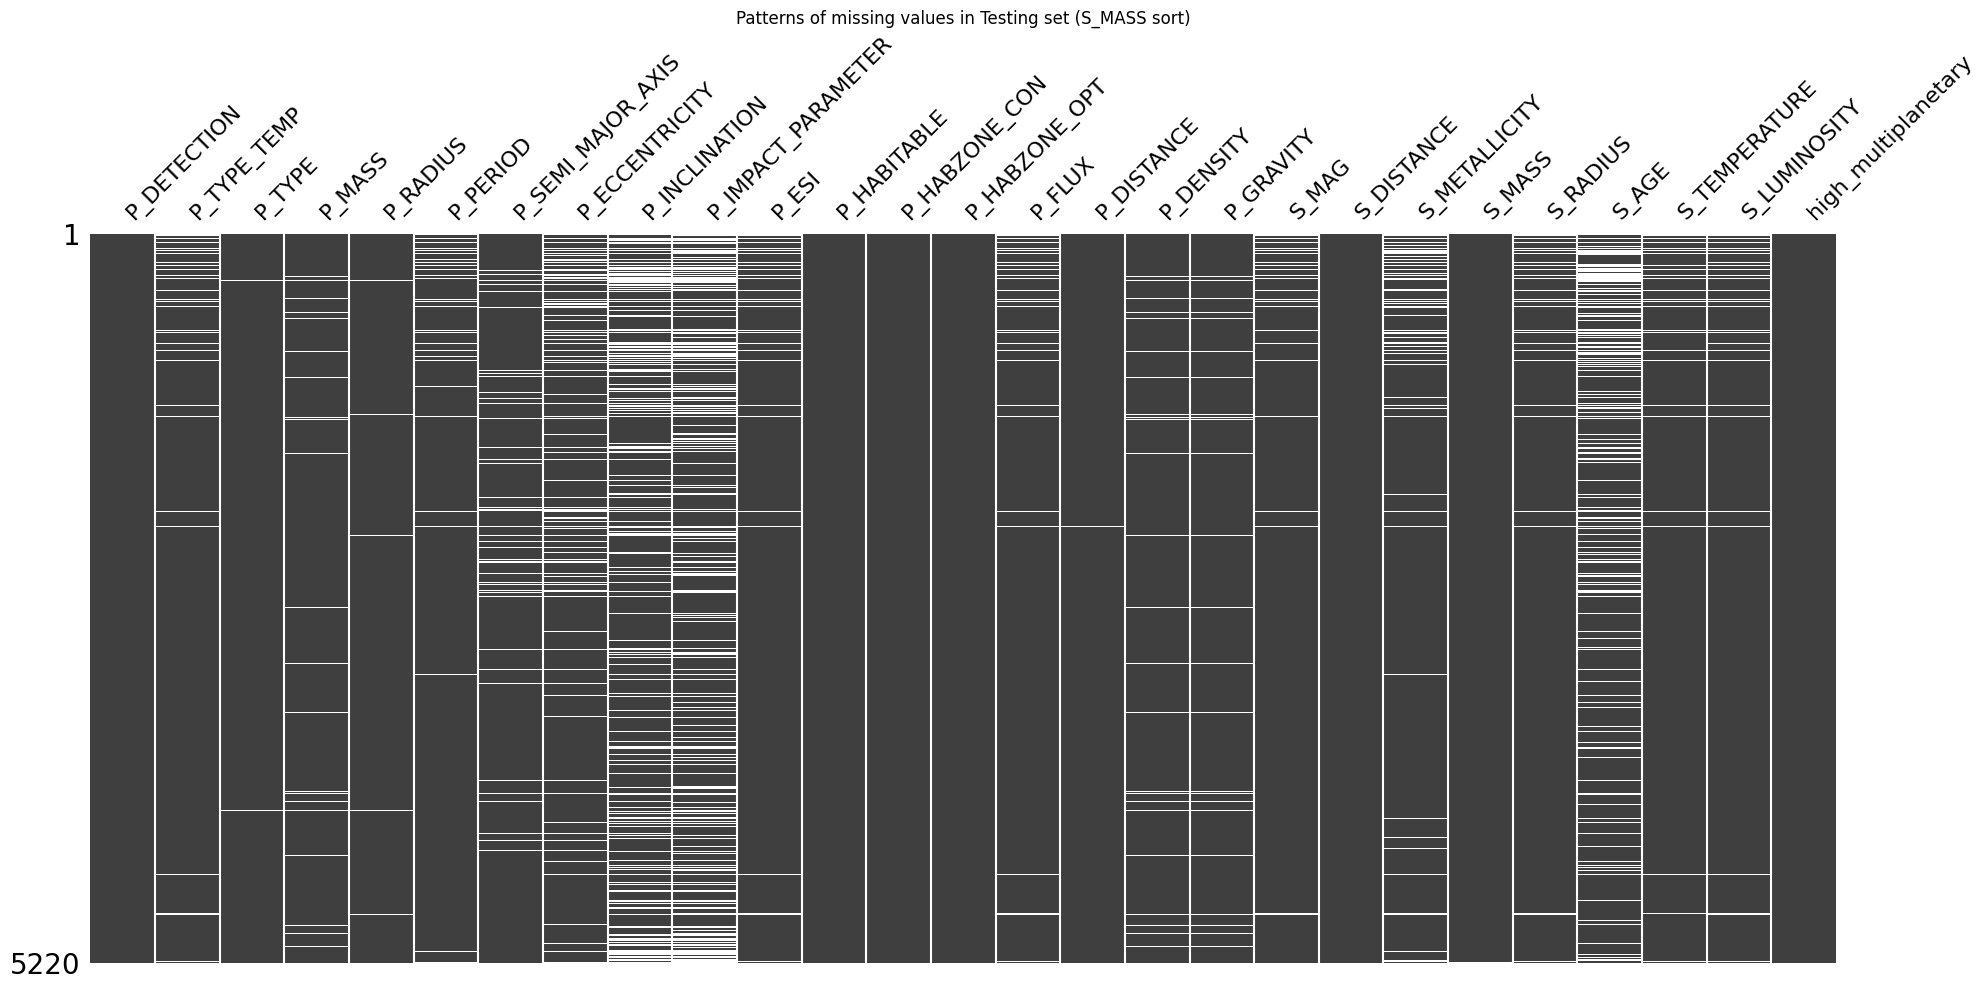

In [132]:
plot_data_with_stacked_bars(df, 'S_MASS')

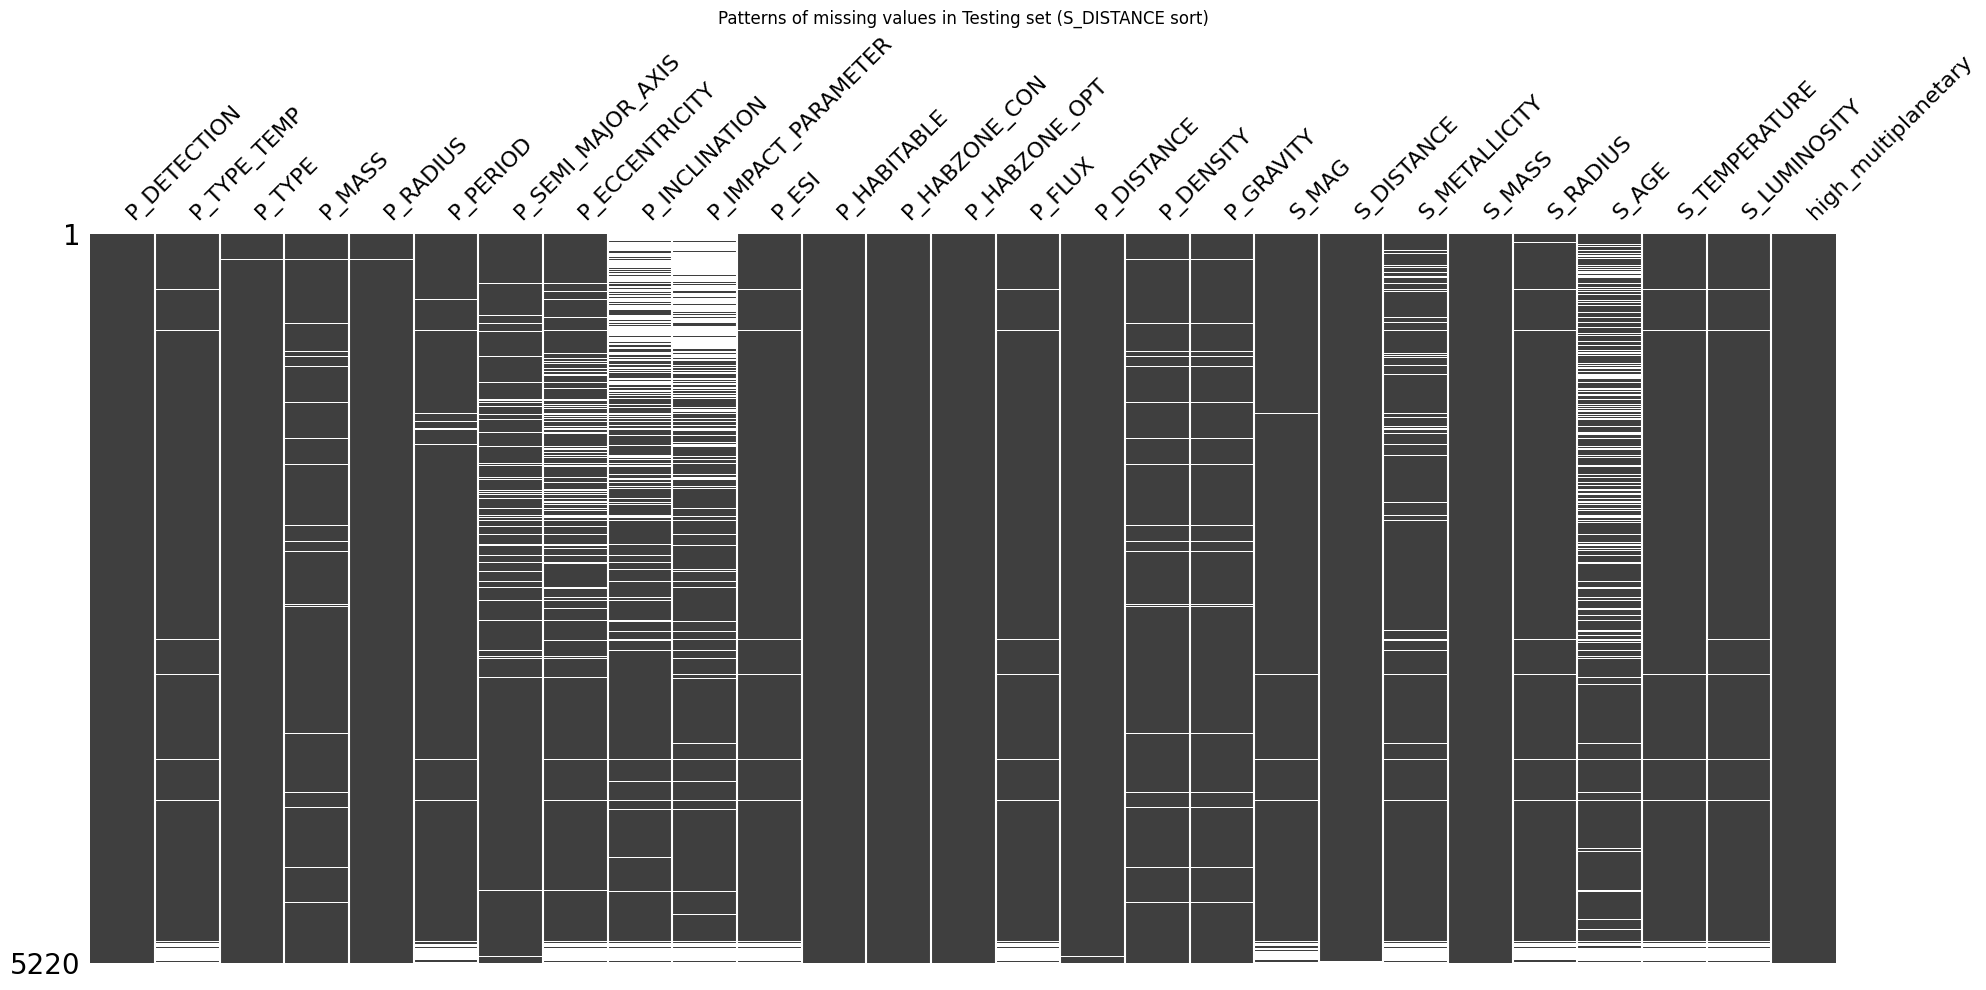

In [133]:
plot_data_with_stacked_bars(df, 'S_DISTANCE')

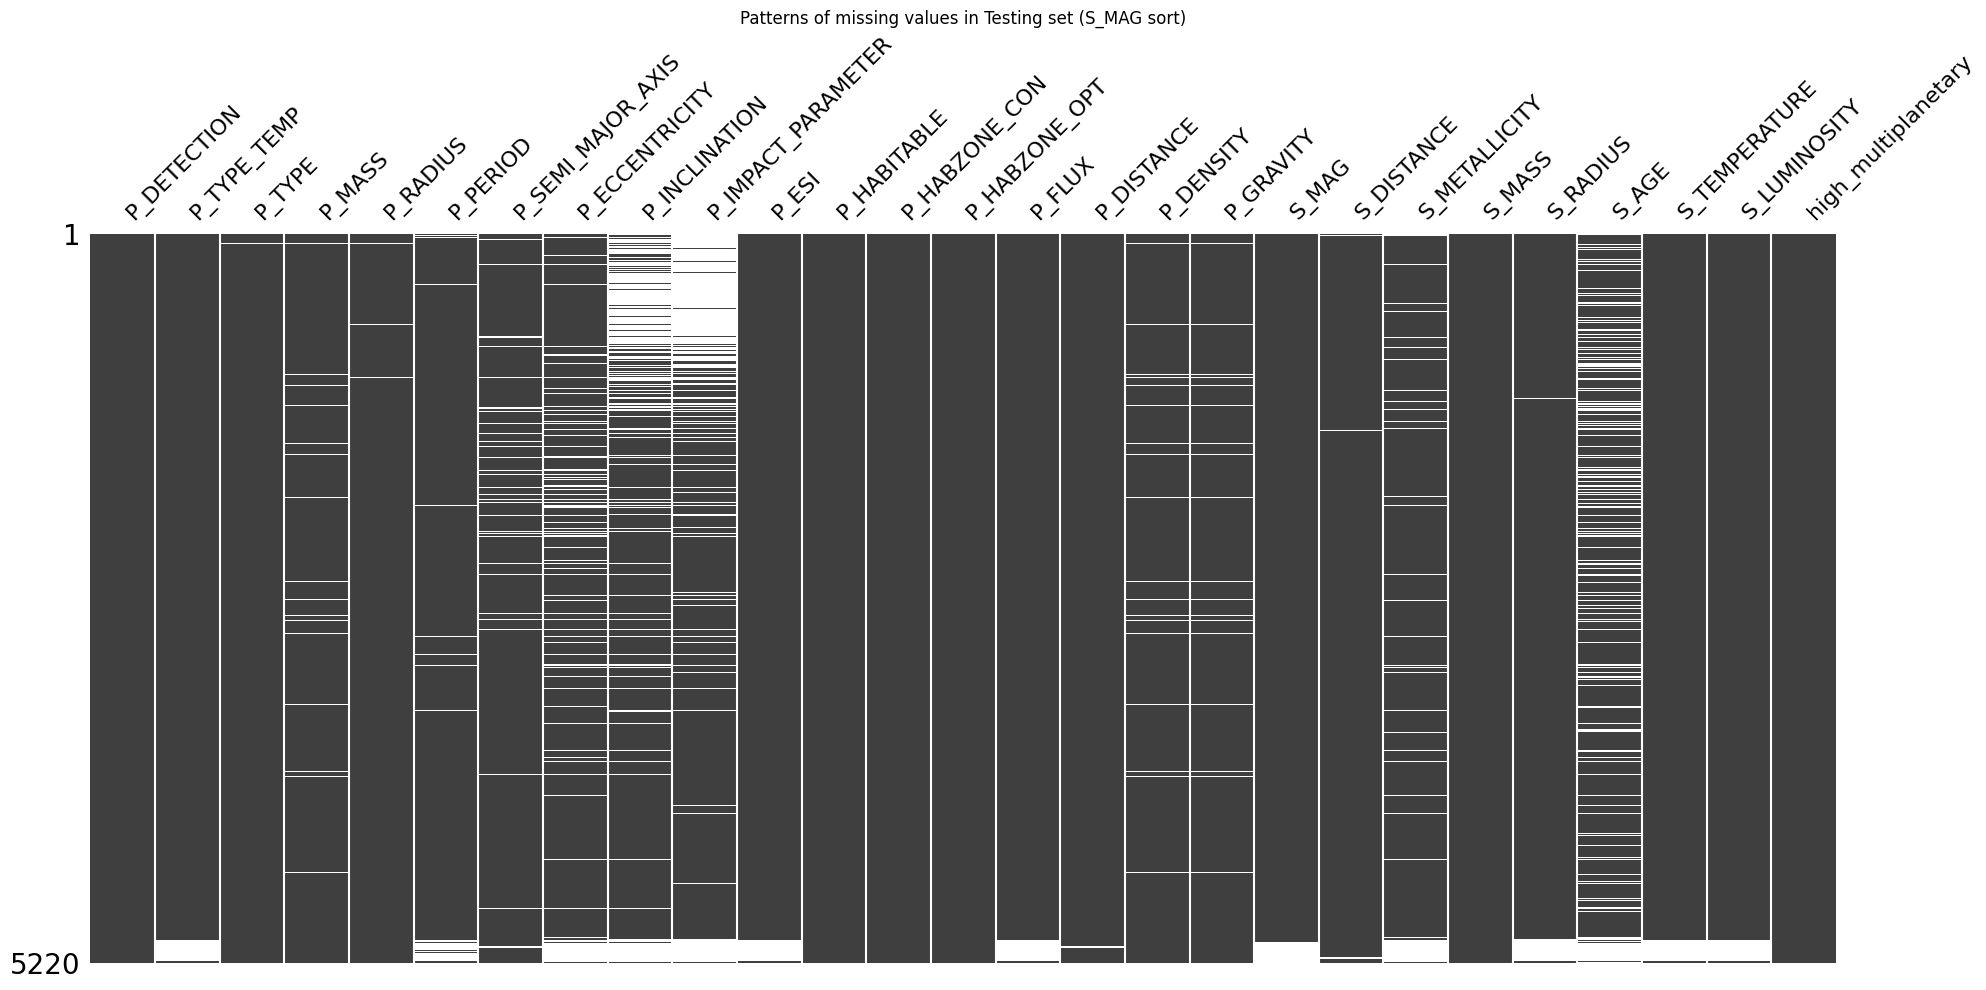

In [134]:
plot_data_with_stacked_bars(df, 'S_MAG')

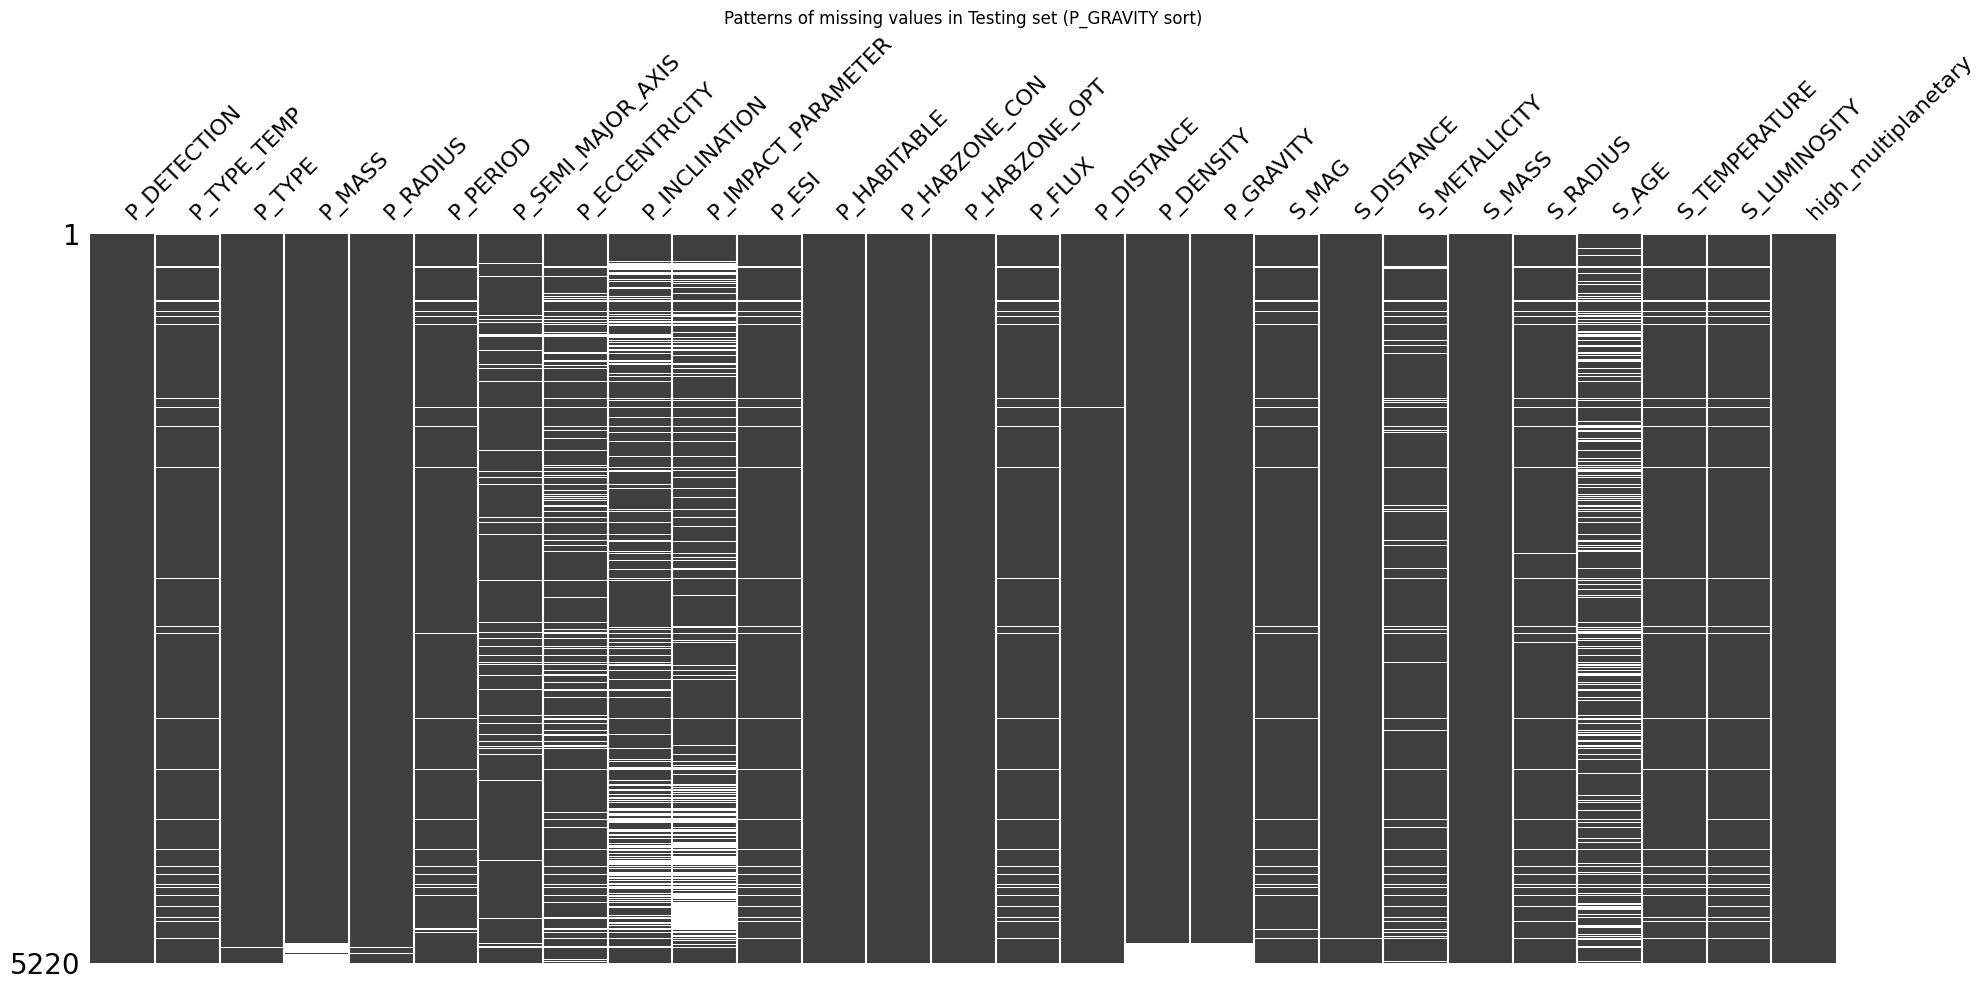

In [135]:
plot_data_with_stacked_bars(df, 'P_GRAVITY')

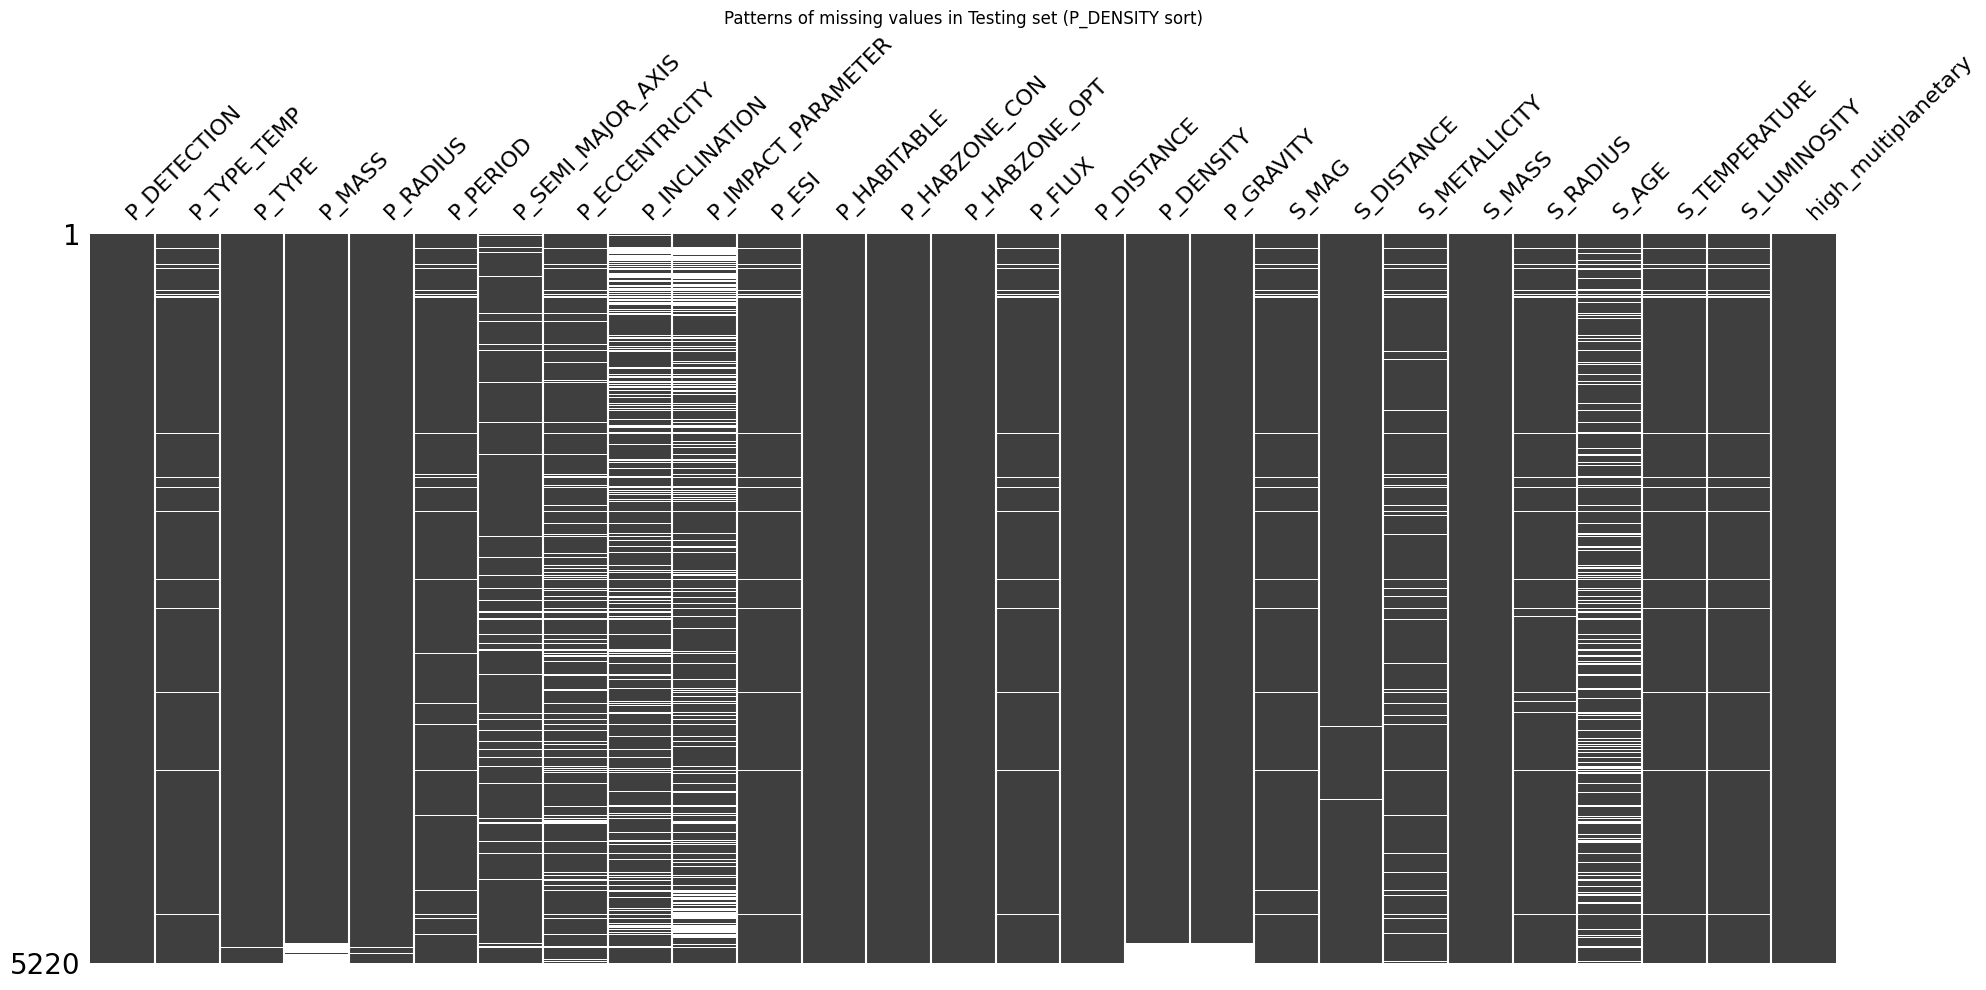

In [136]:
plot_data_with_stacked_bars(df, 'P_DENSITY')

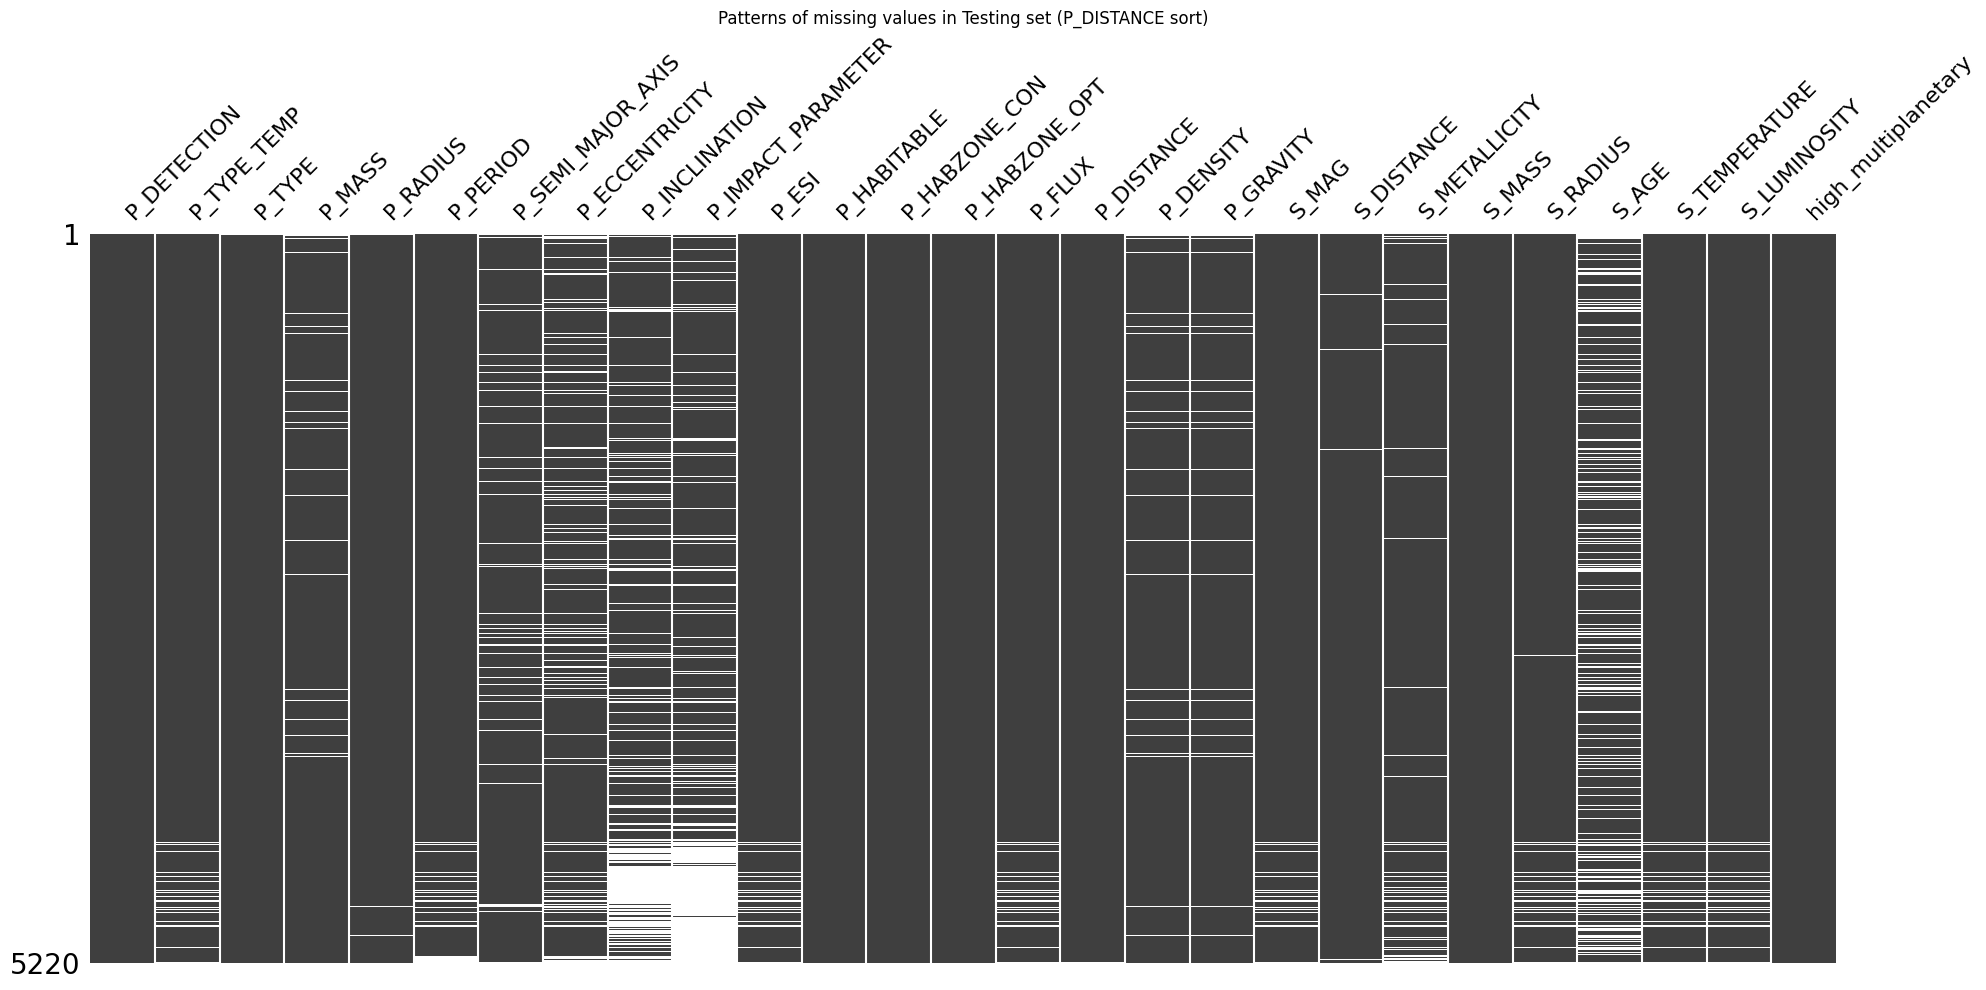

In [137]:
plot_data_with_stacked_bars(df, 'P_DISTANCE')

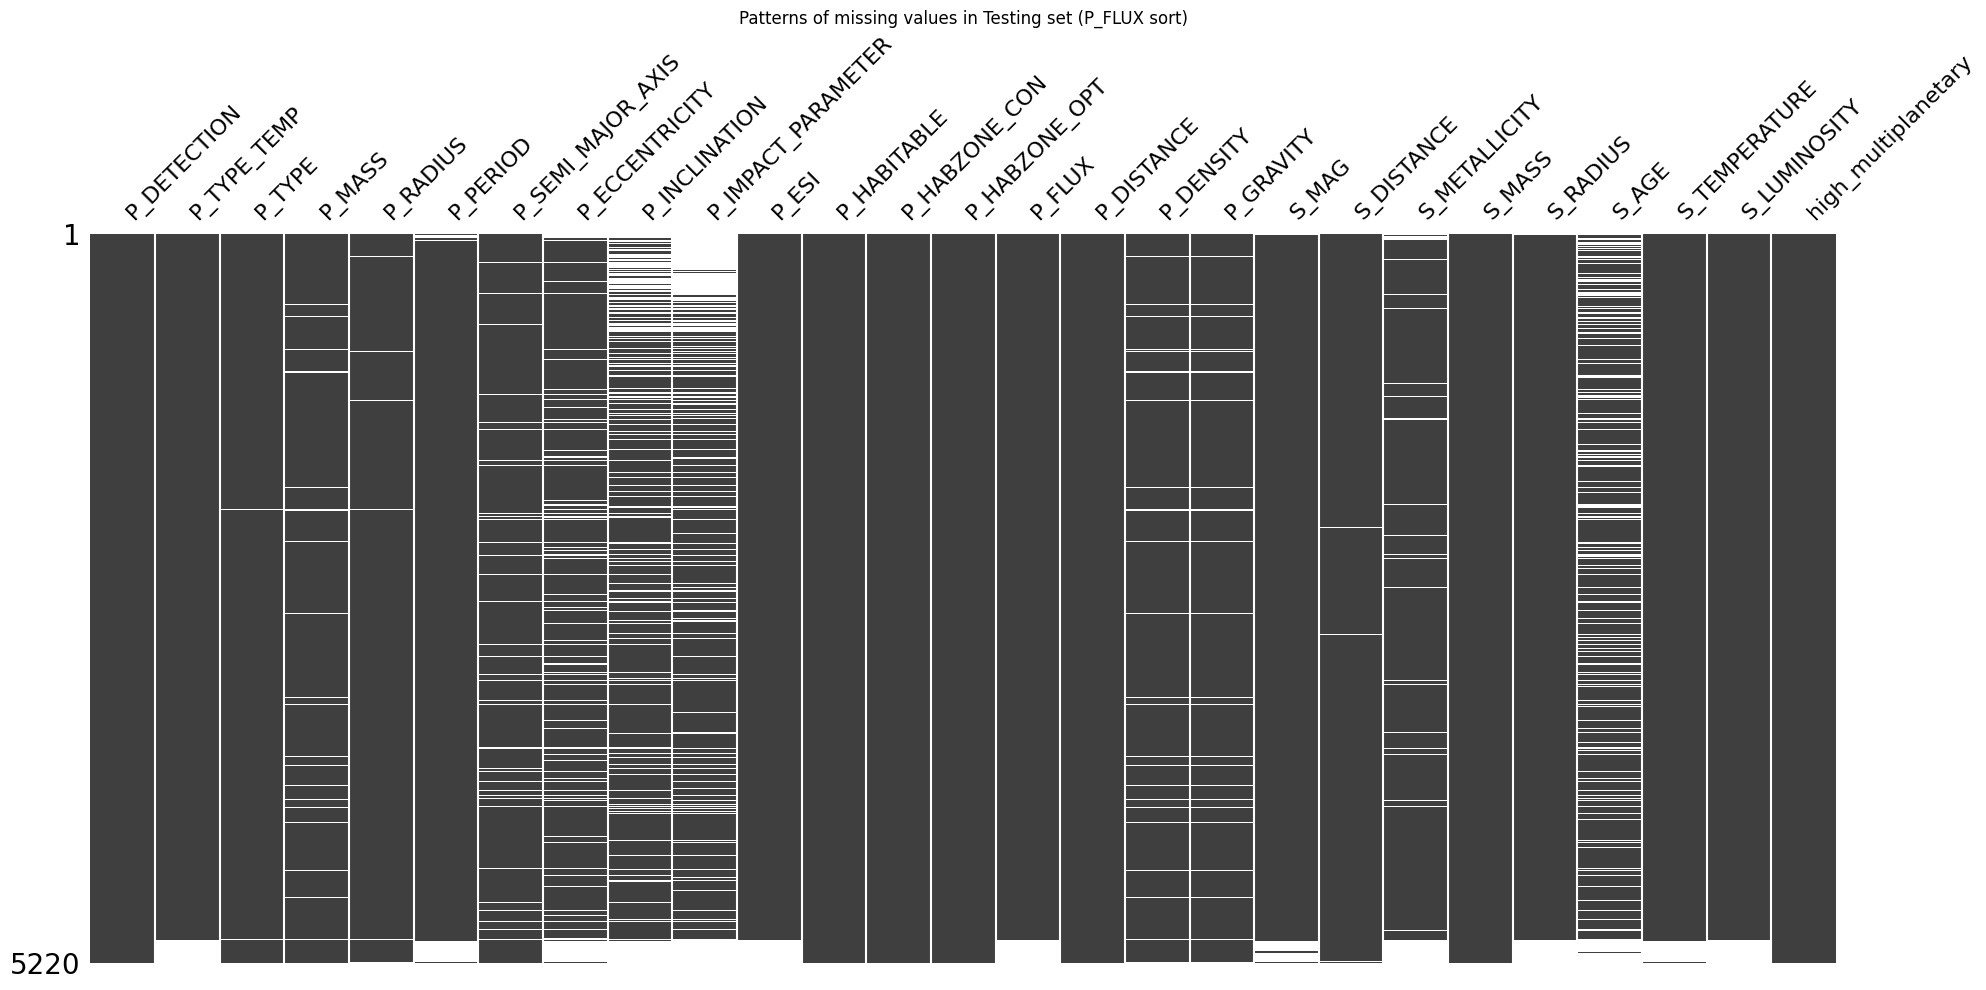

In [138]:
plot_data_with_stacked_bars(df, 'P_FLUX')

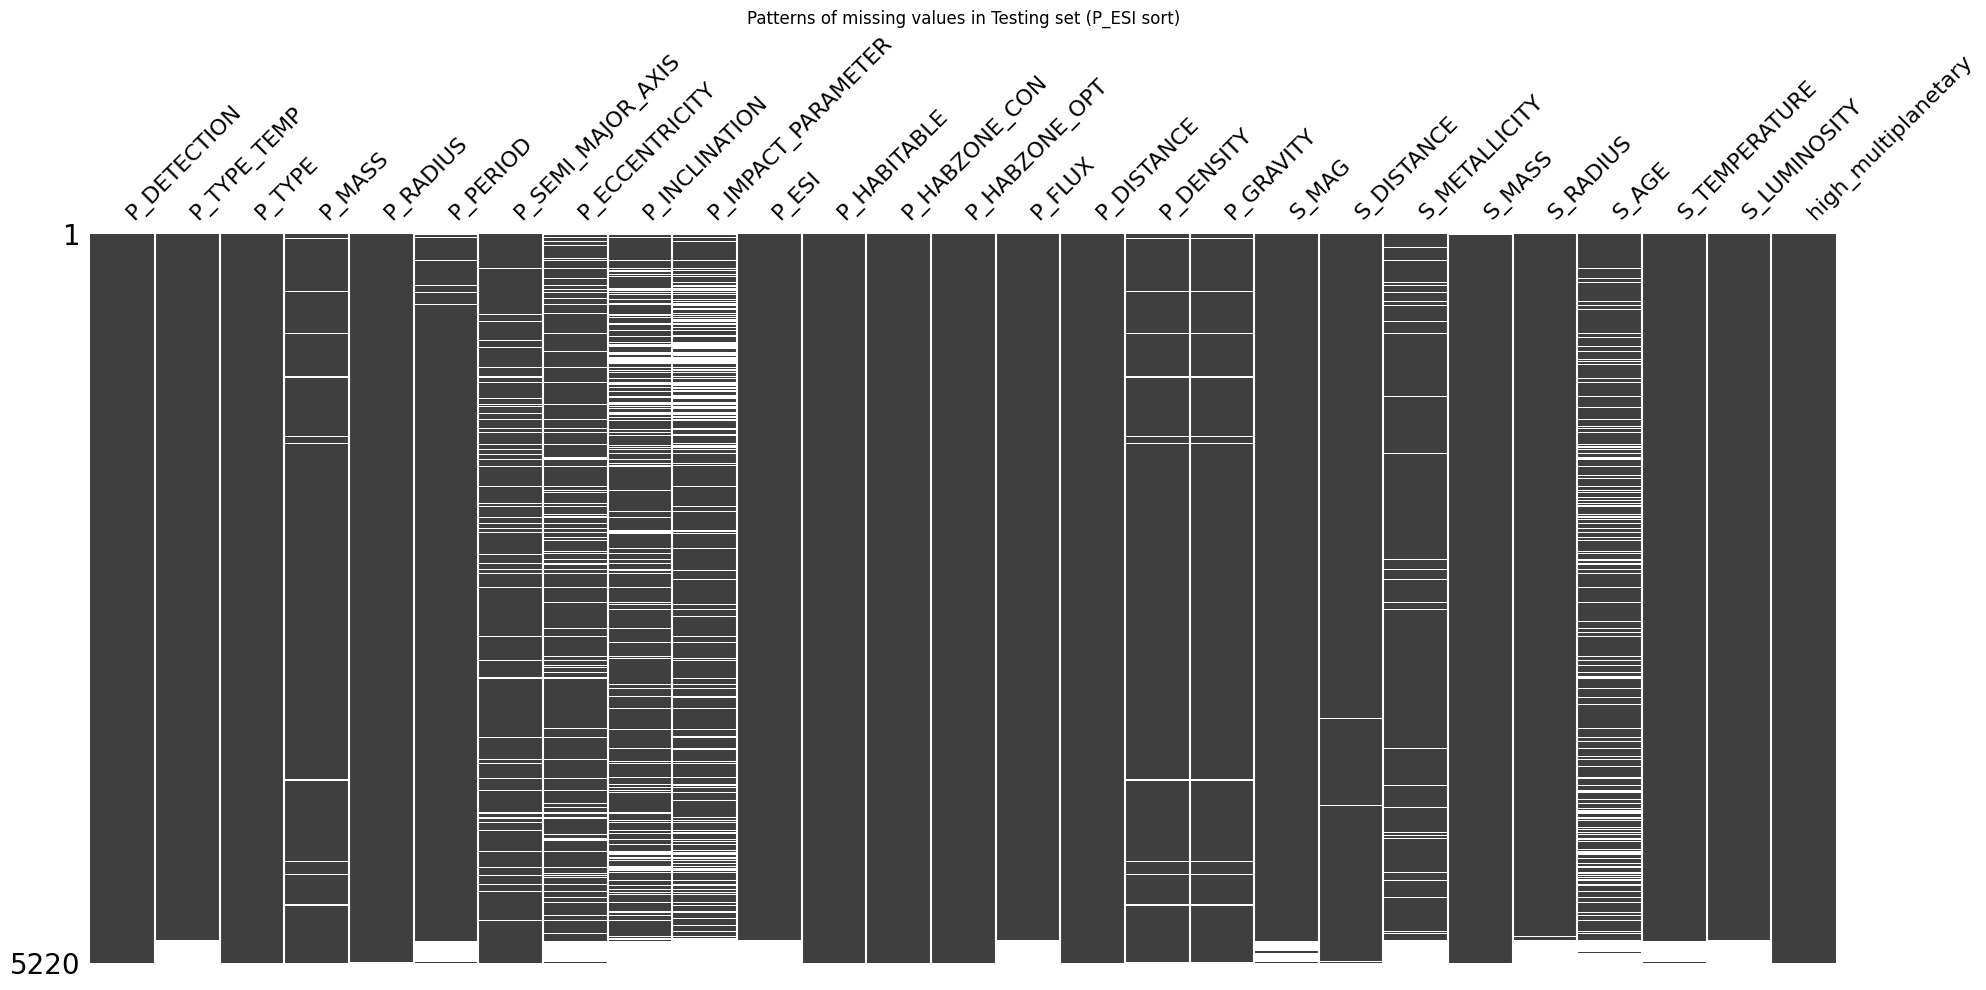

In [139]:
plot_data_with_stacked_bars(df, 'P_ESI')

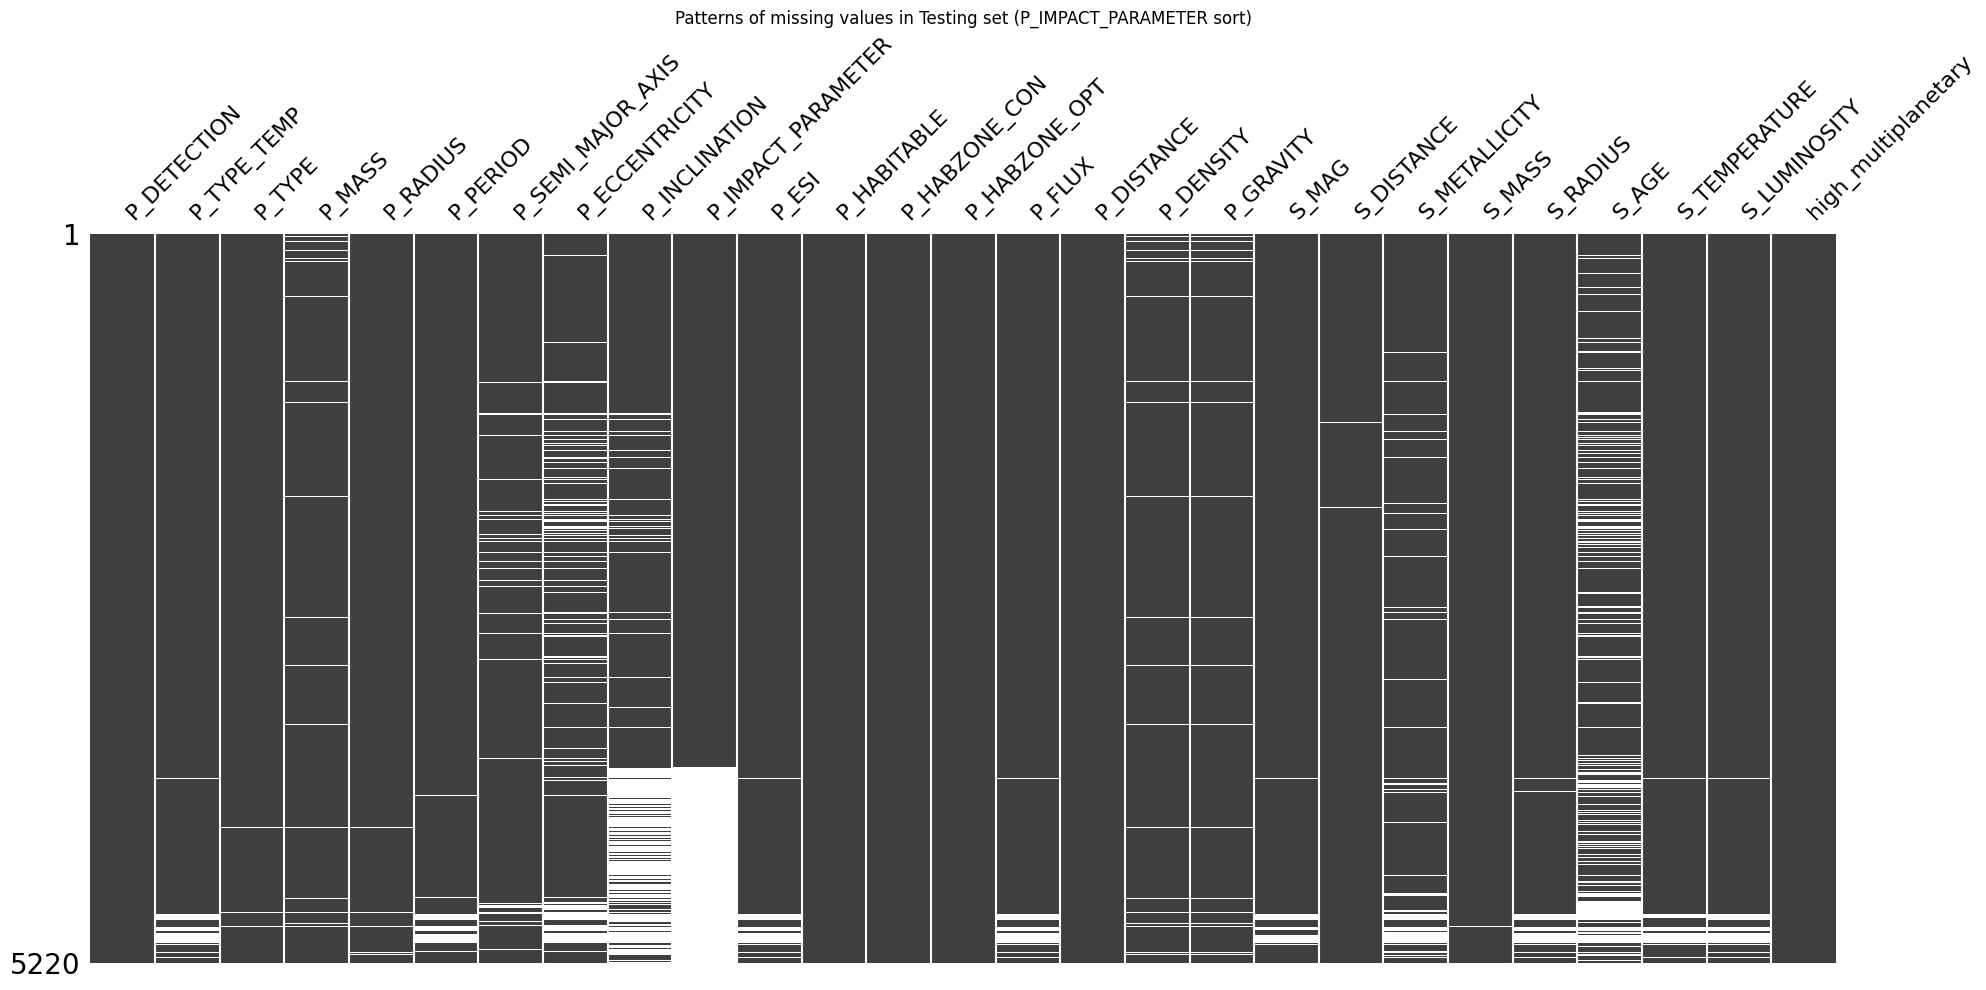

In [140]:
plot_data_with_stacked_bars(df, 'P_IMPACT_PARAMETER')

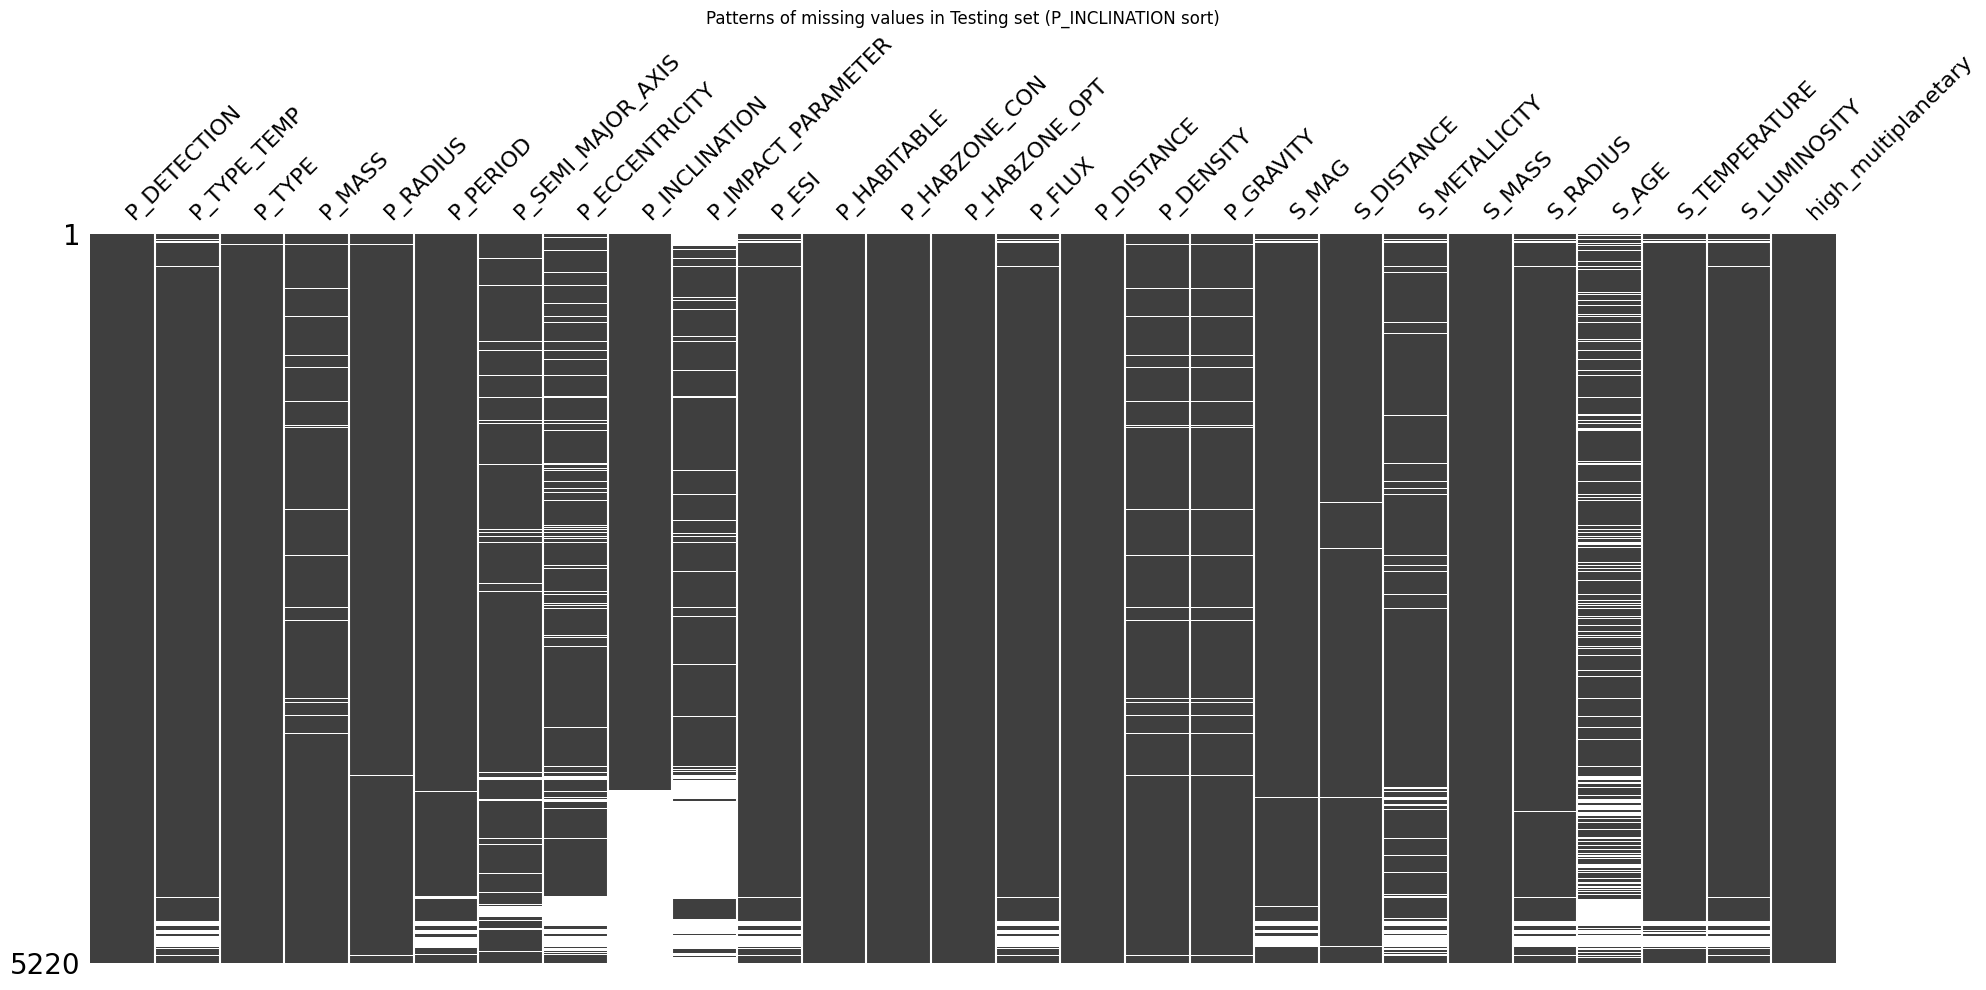

In [141]:
plot_data_with_stacked_bars(df, 'P_INCLINATION')

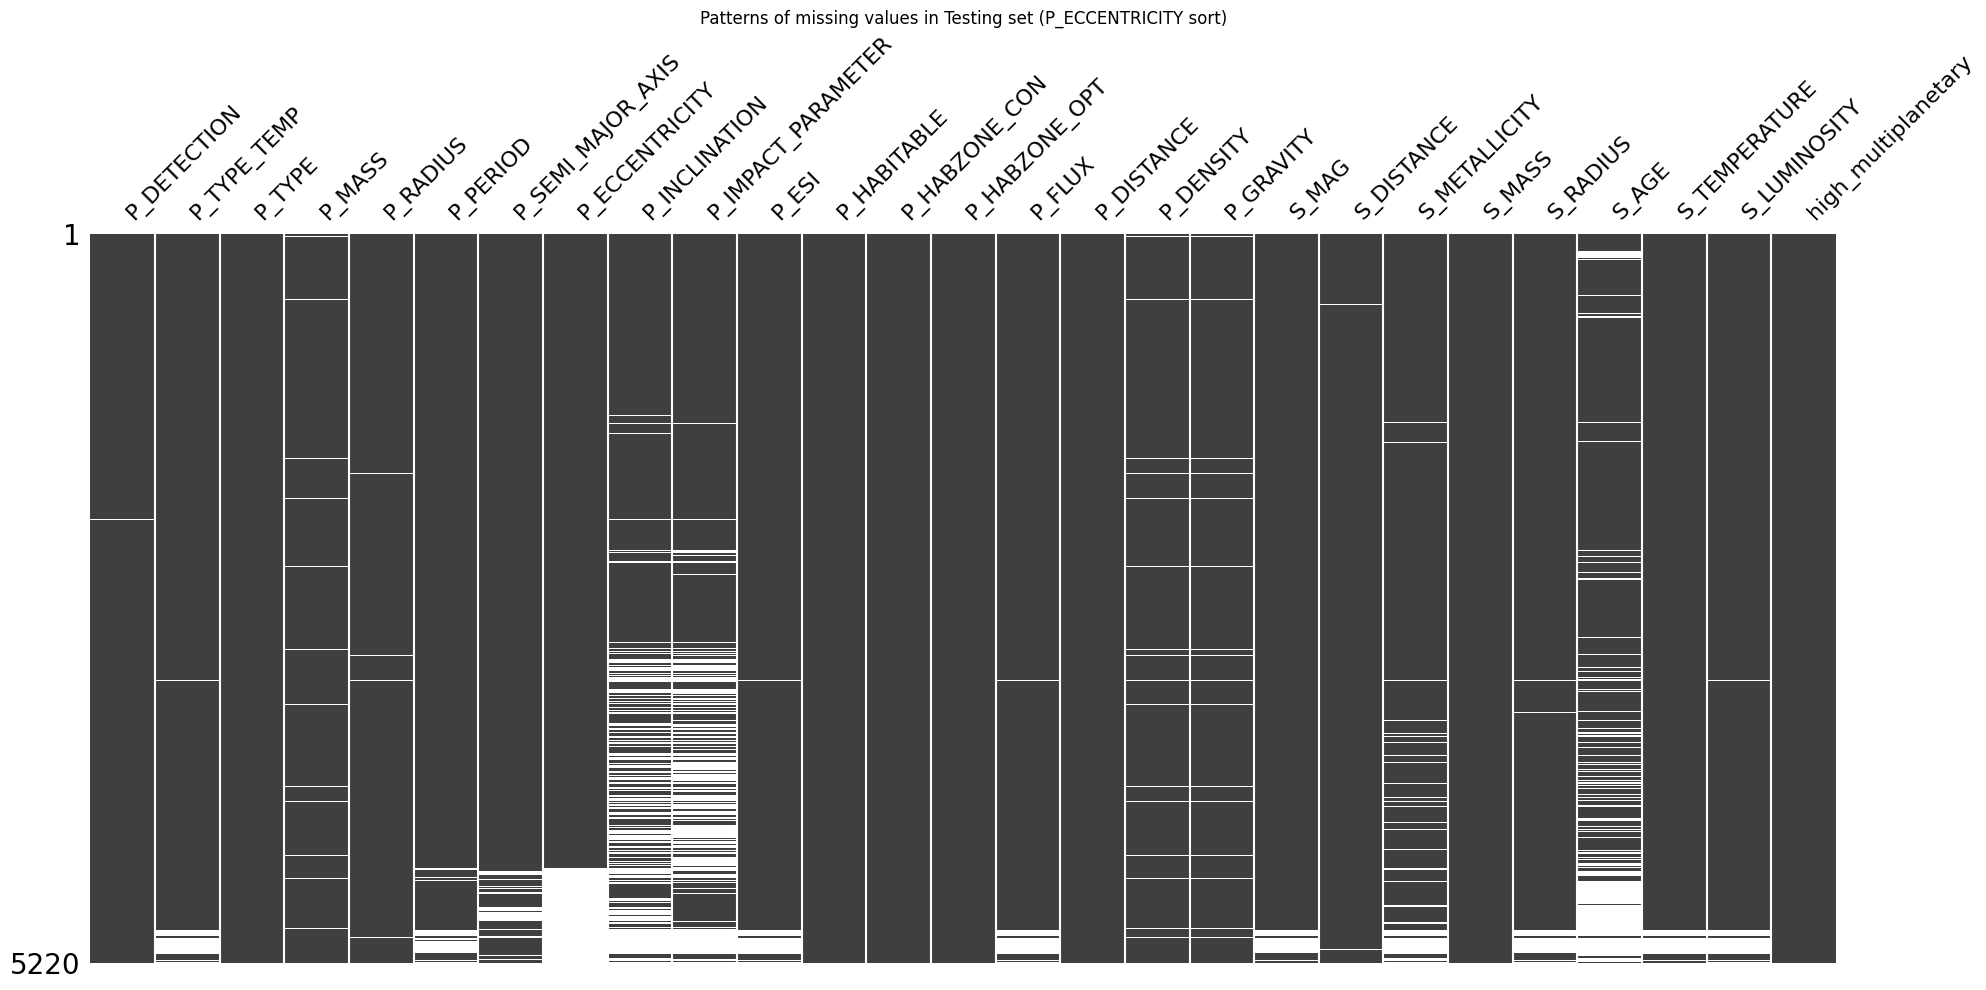

In [142]:
plot_data_with_stacked_bars(df, 'P_ECCENTRICITY')

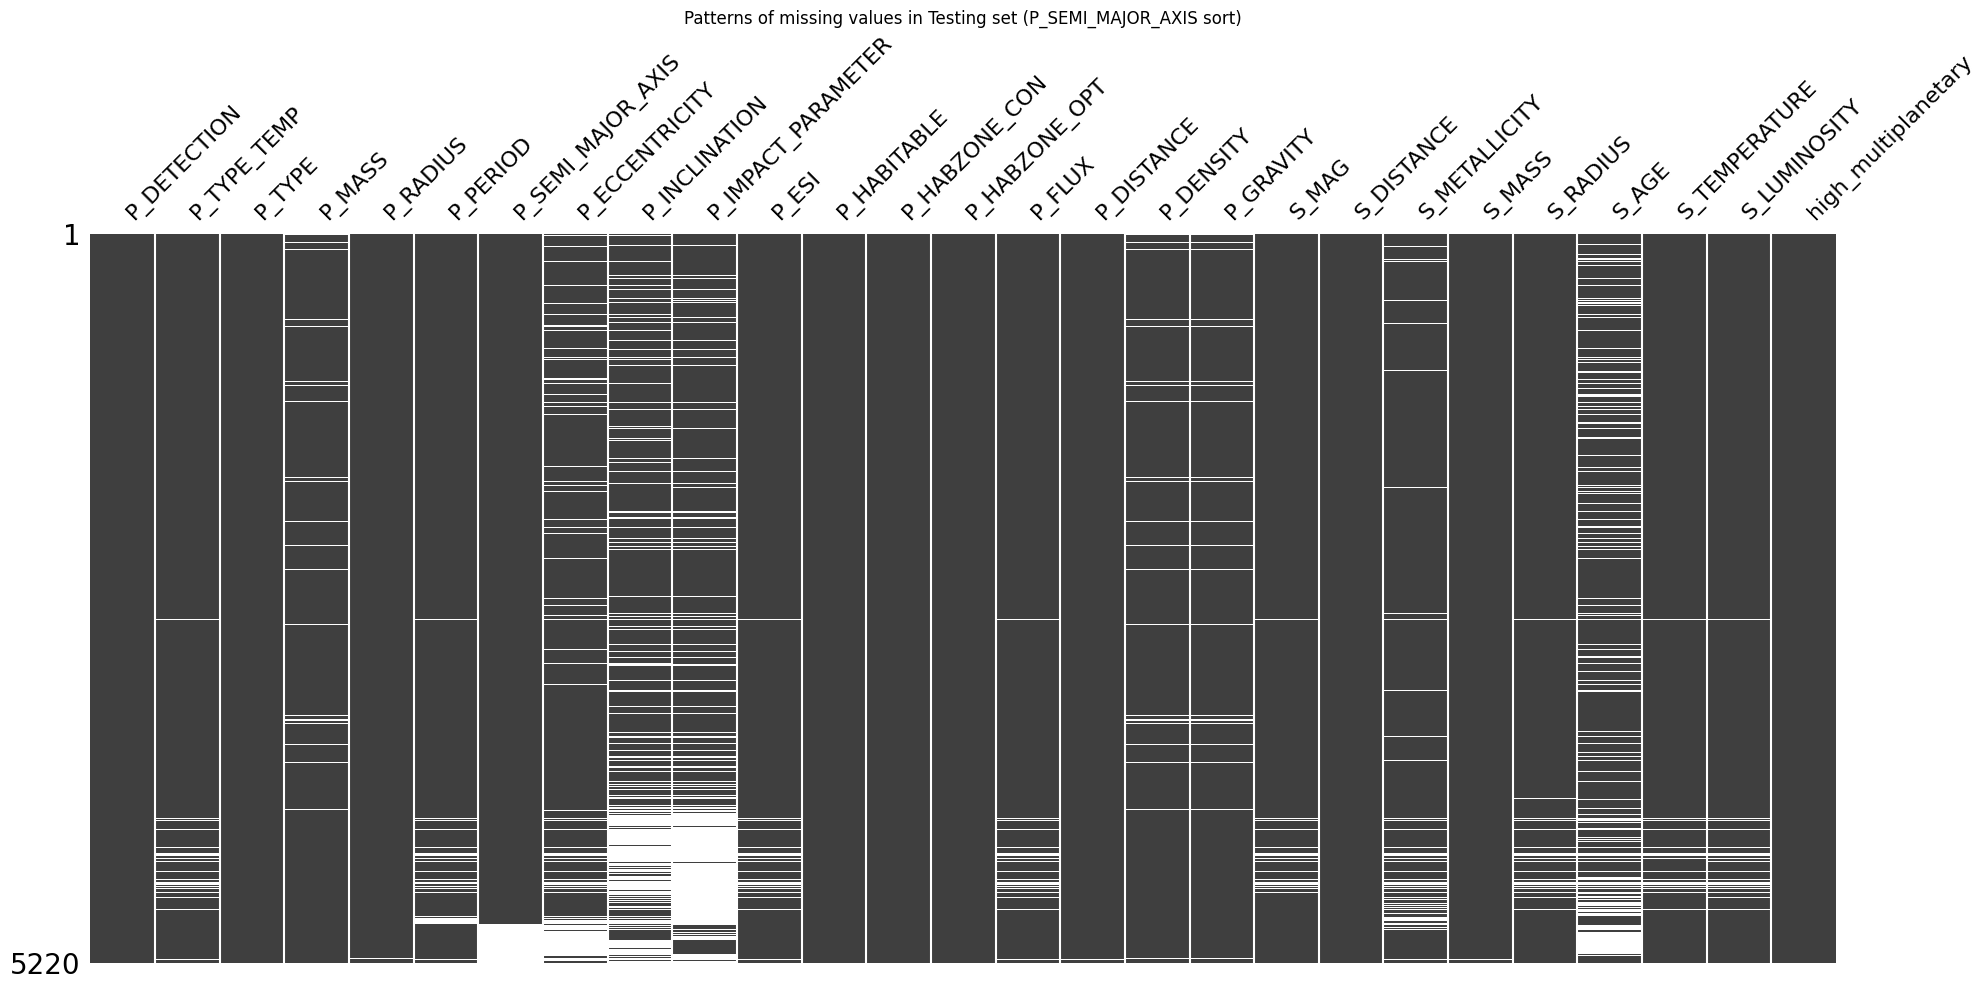

In [143]:
plot_data_with_stacked_bars(df, 'P_SEMI_MAJOR_AXIS')

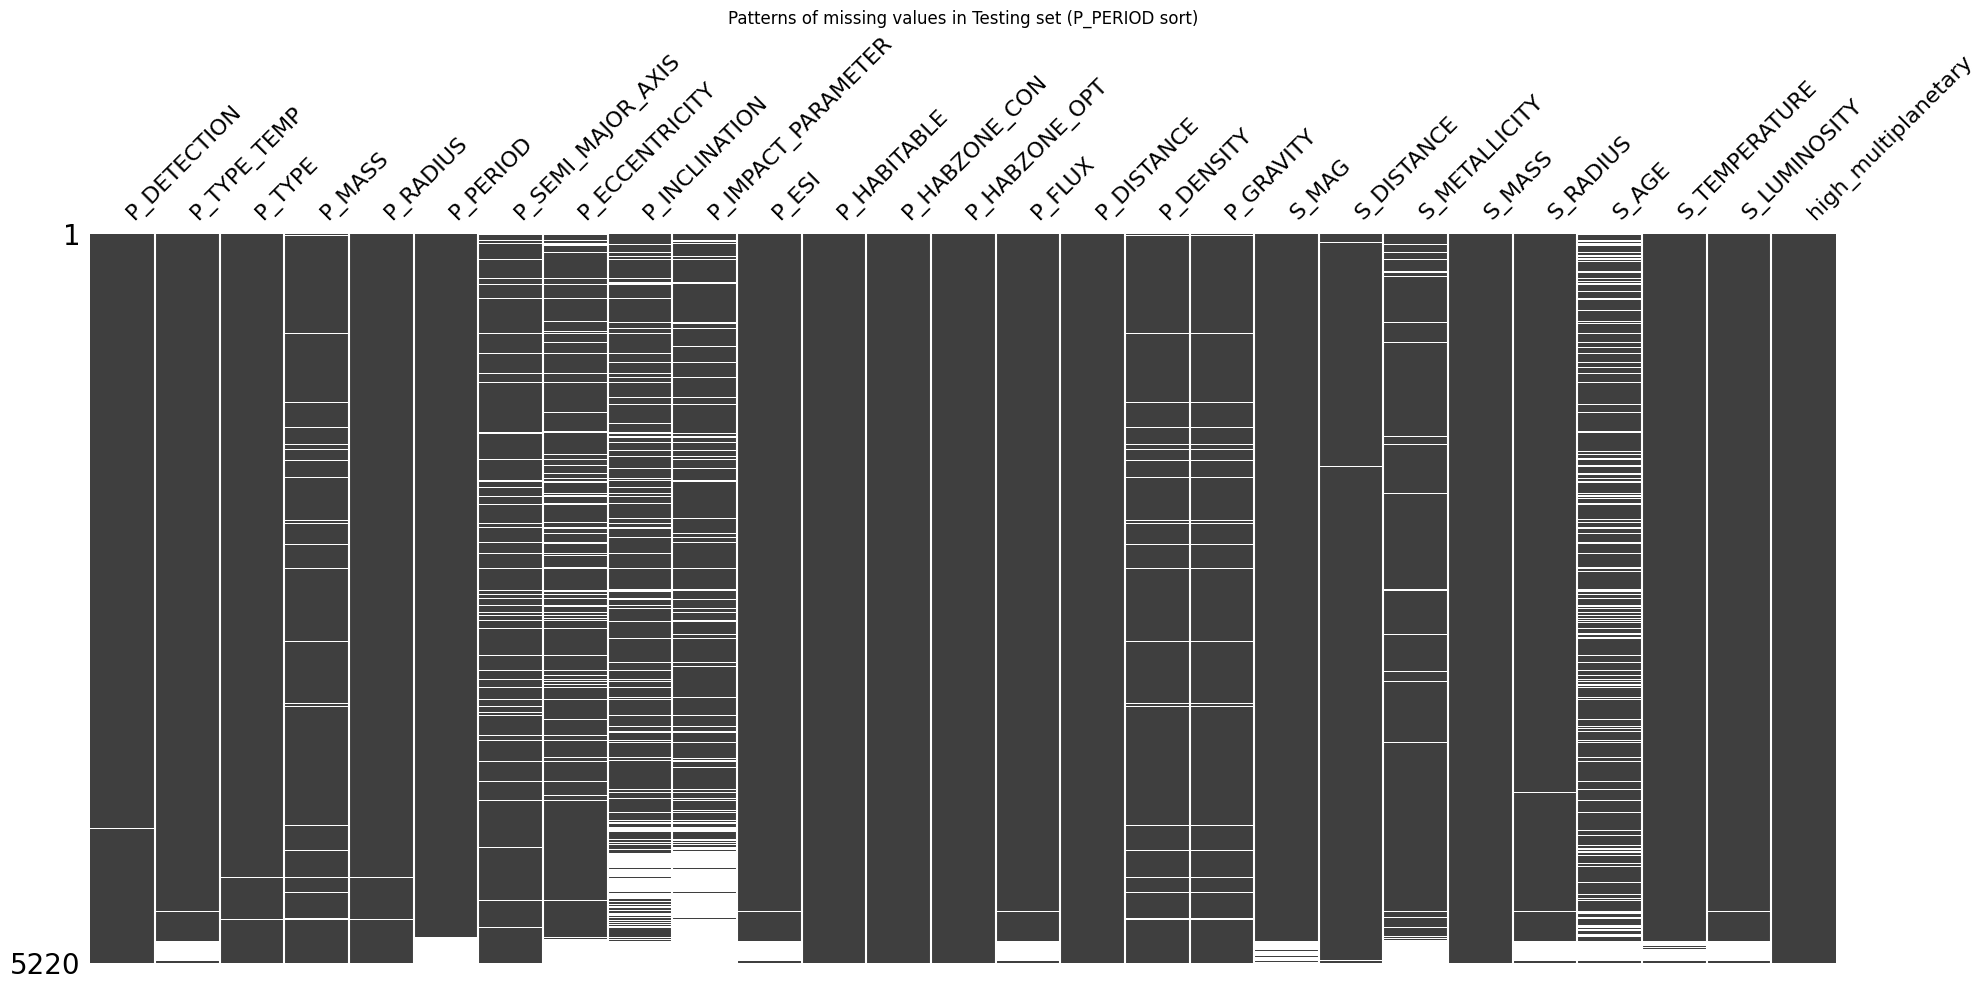

In [144]:
plot_data_with_stacked_bars(df, 'P_PERIOD')

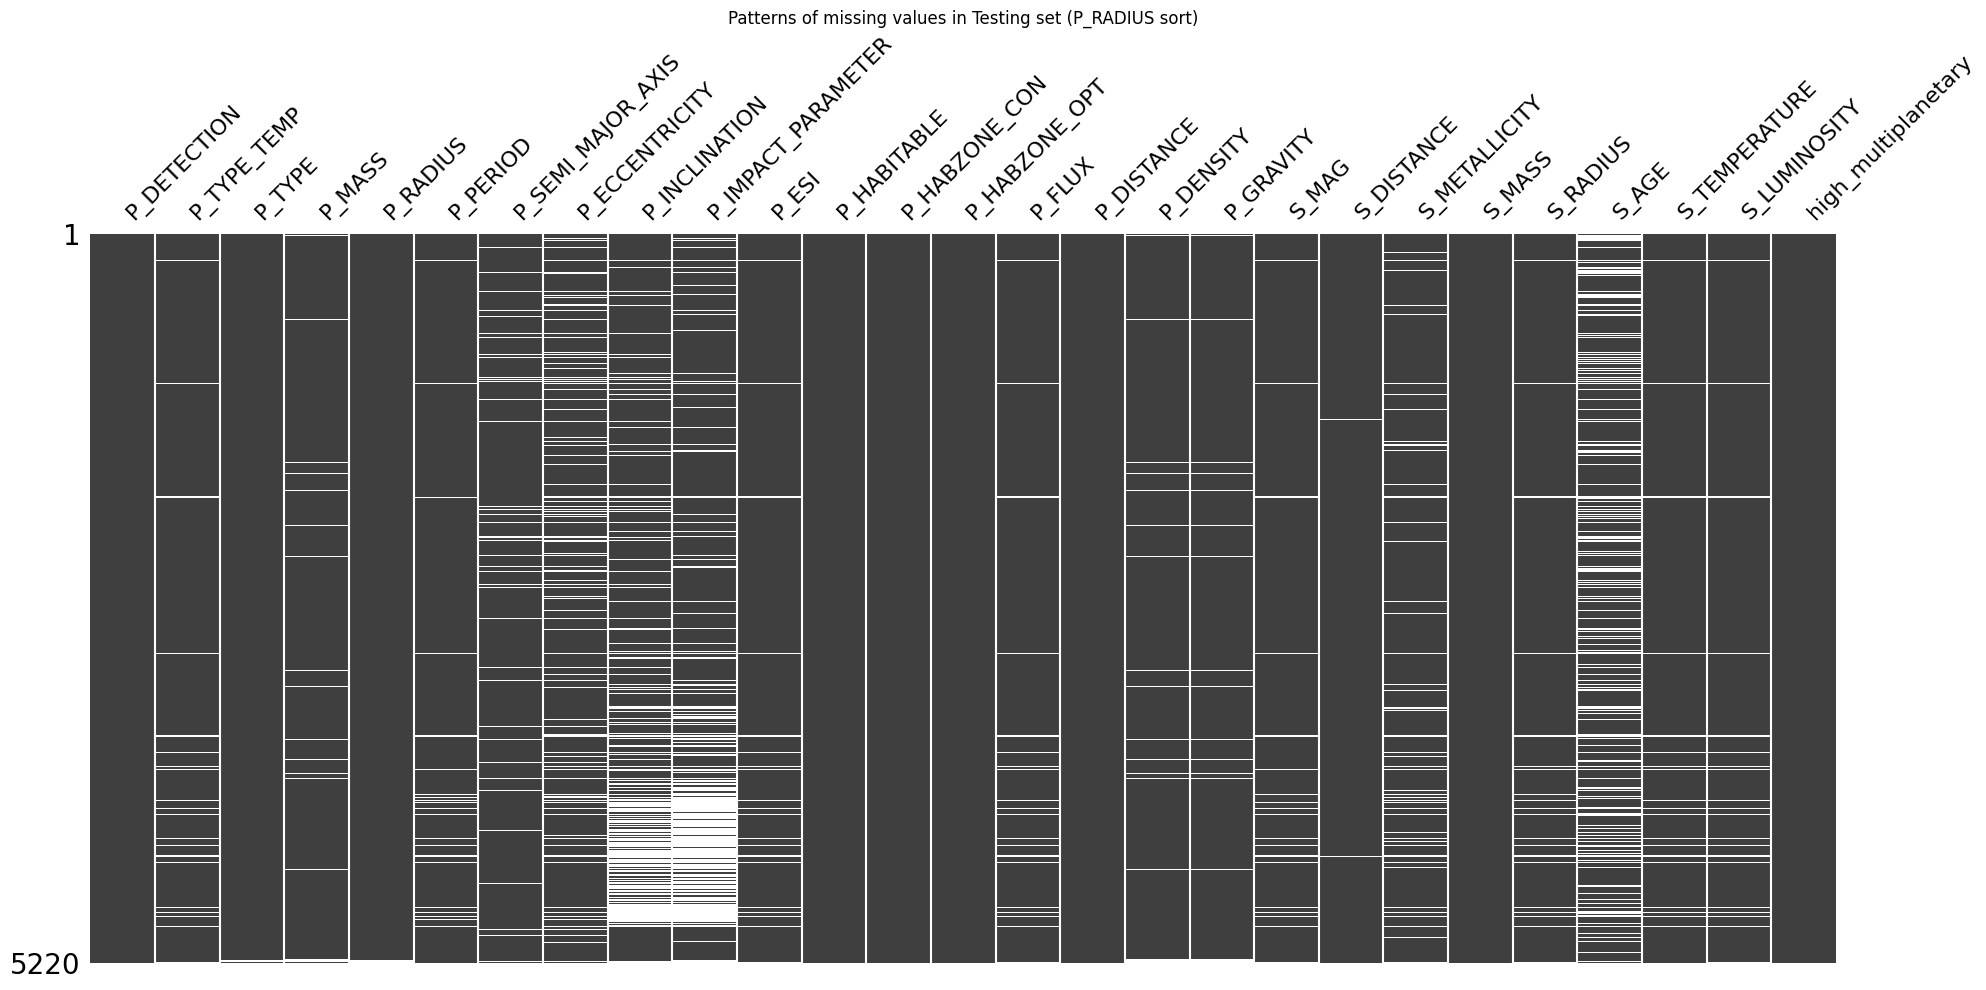

In [145]:
plot_data_with_stacked_bars(df, 'P_RADIUS')

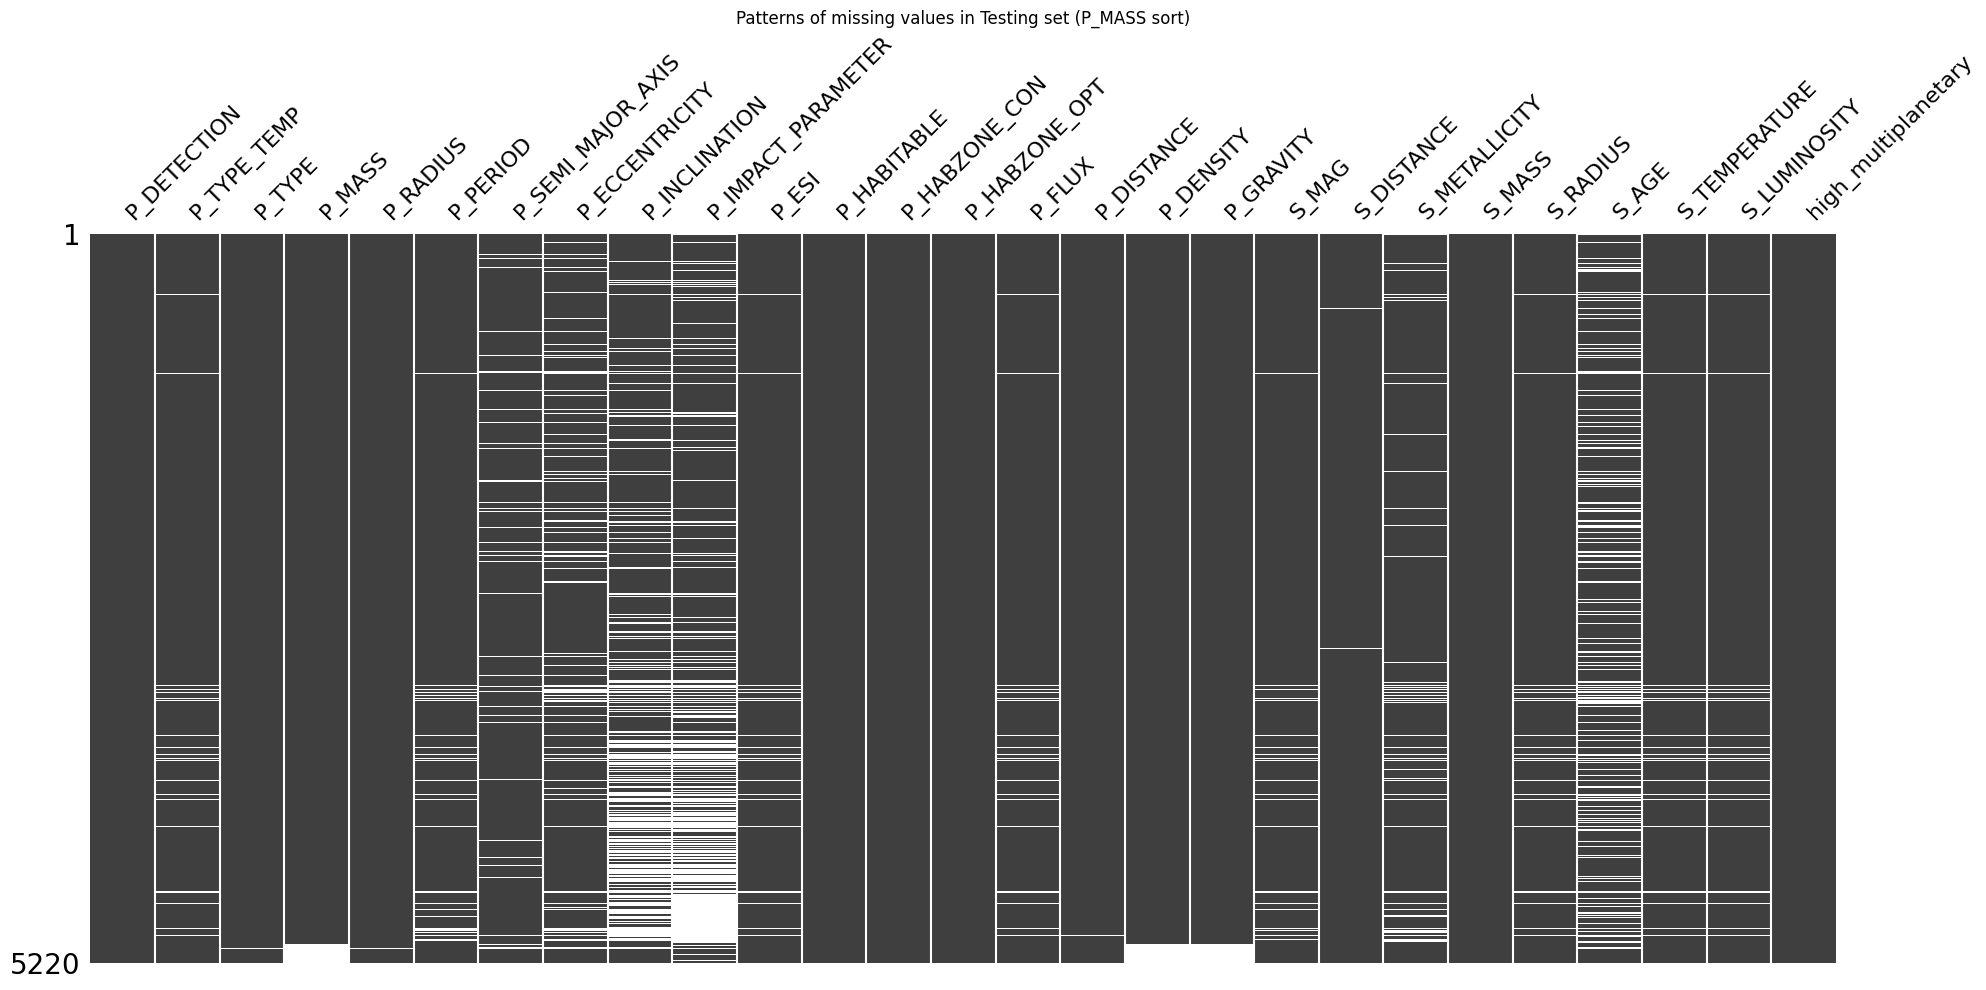

In [146]:
plot_data_with_stacked_bars(df, 'P_MASS')

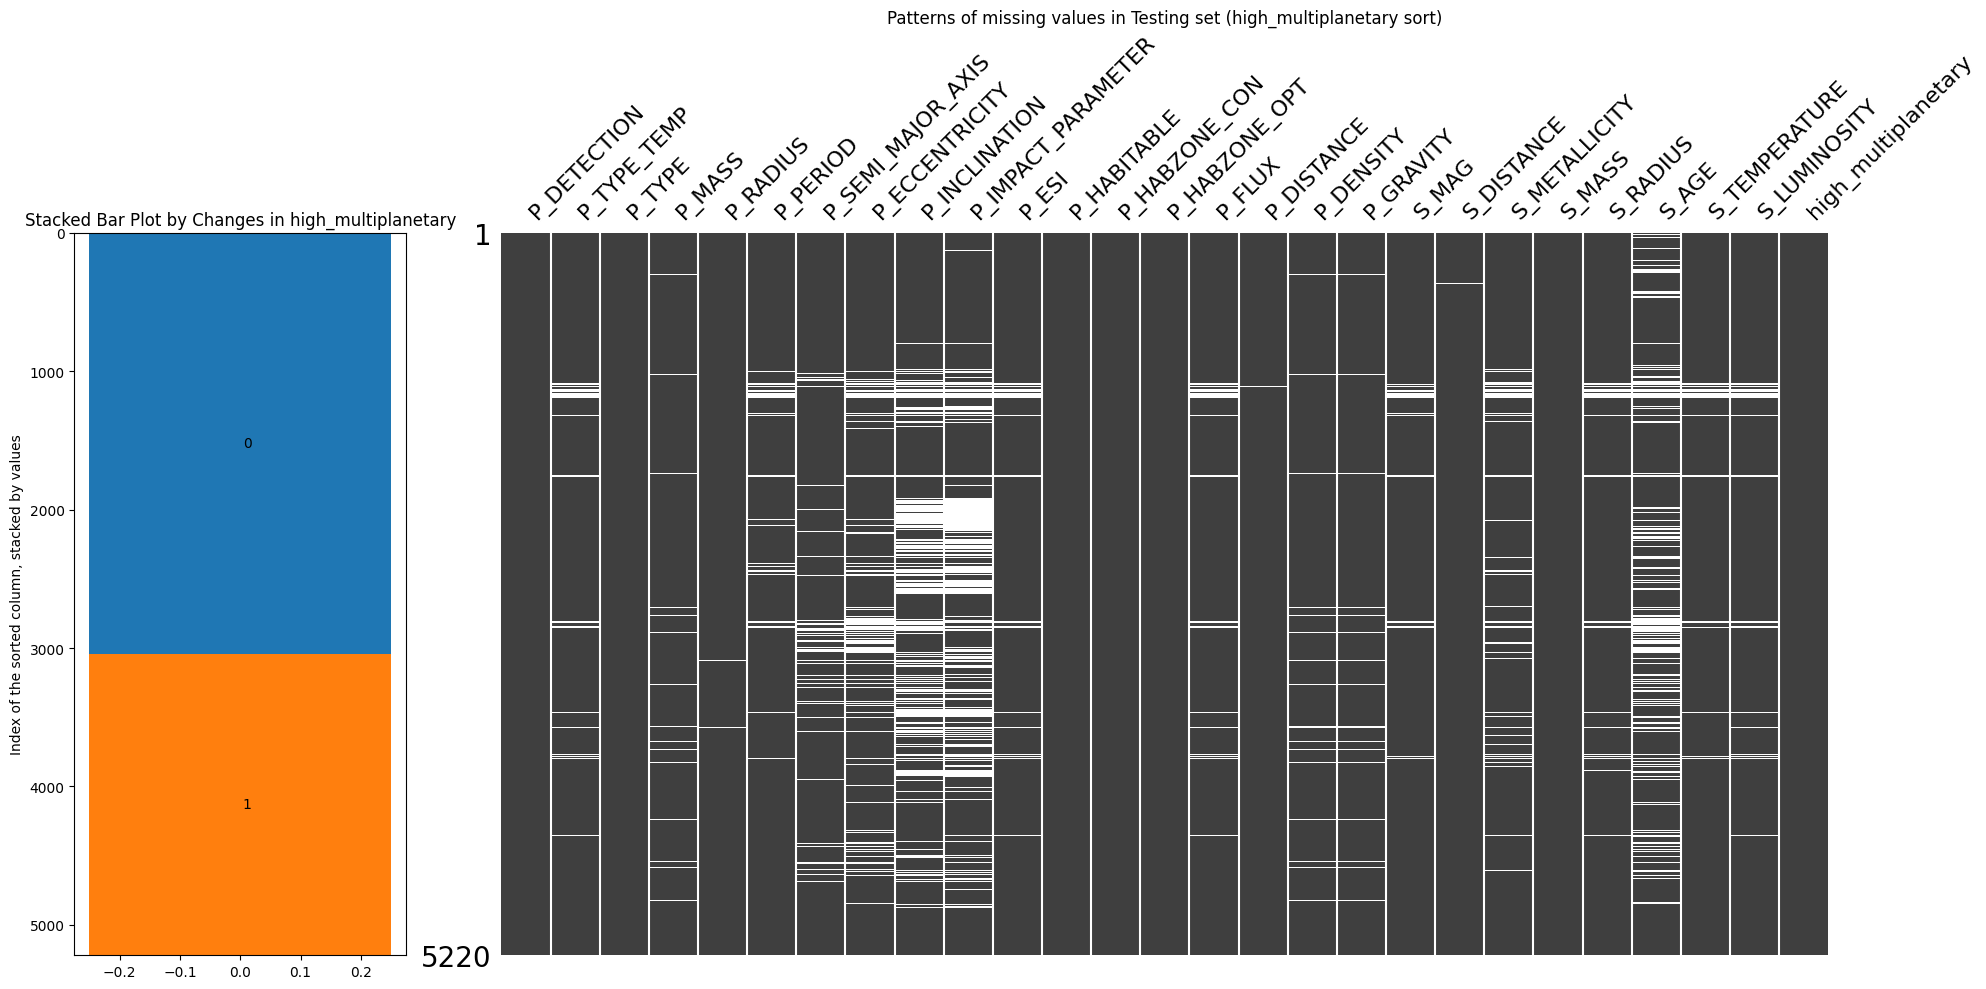

In [147]:
plot_data_with_stacked_bars(df, 'high_multiplanetary')

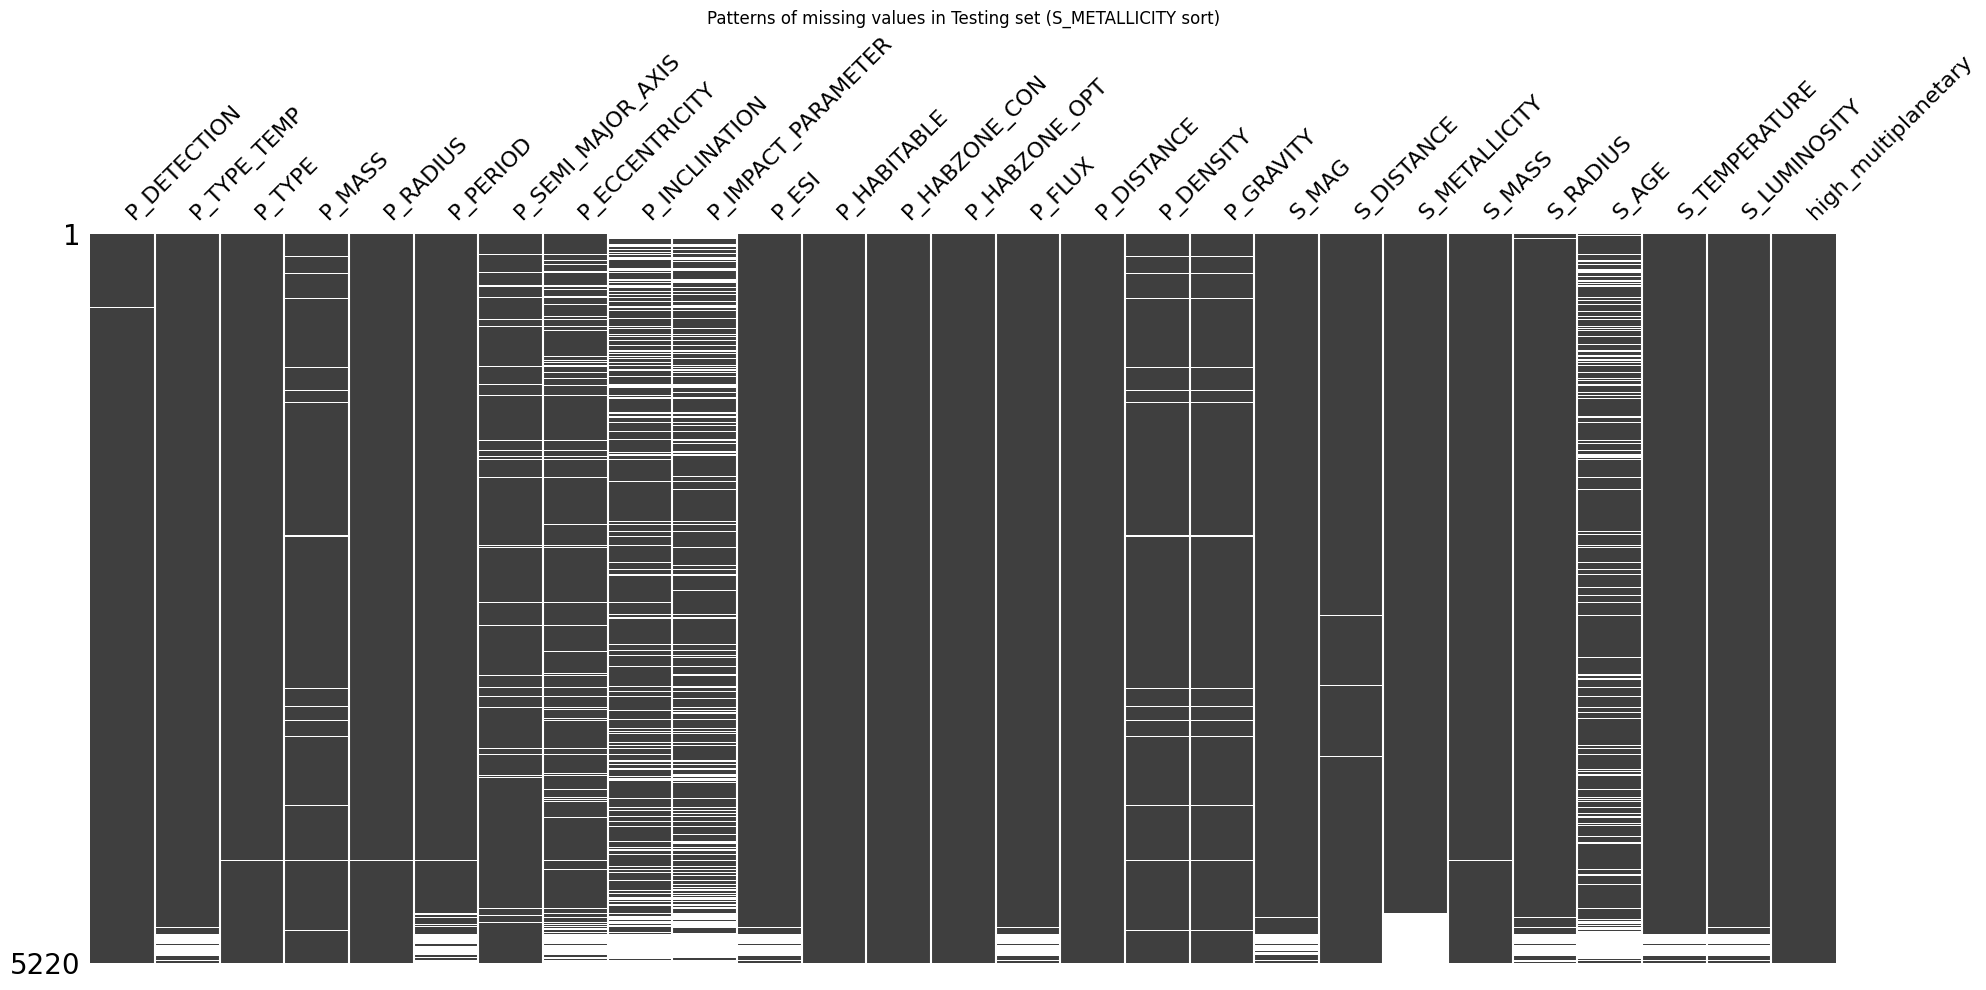

In [148]:
plot_data_with_stacked_bars(df, 'S_METALLICITY')

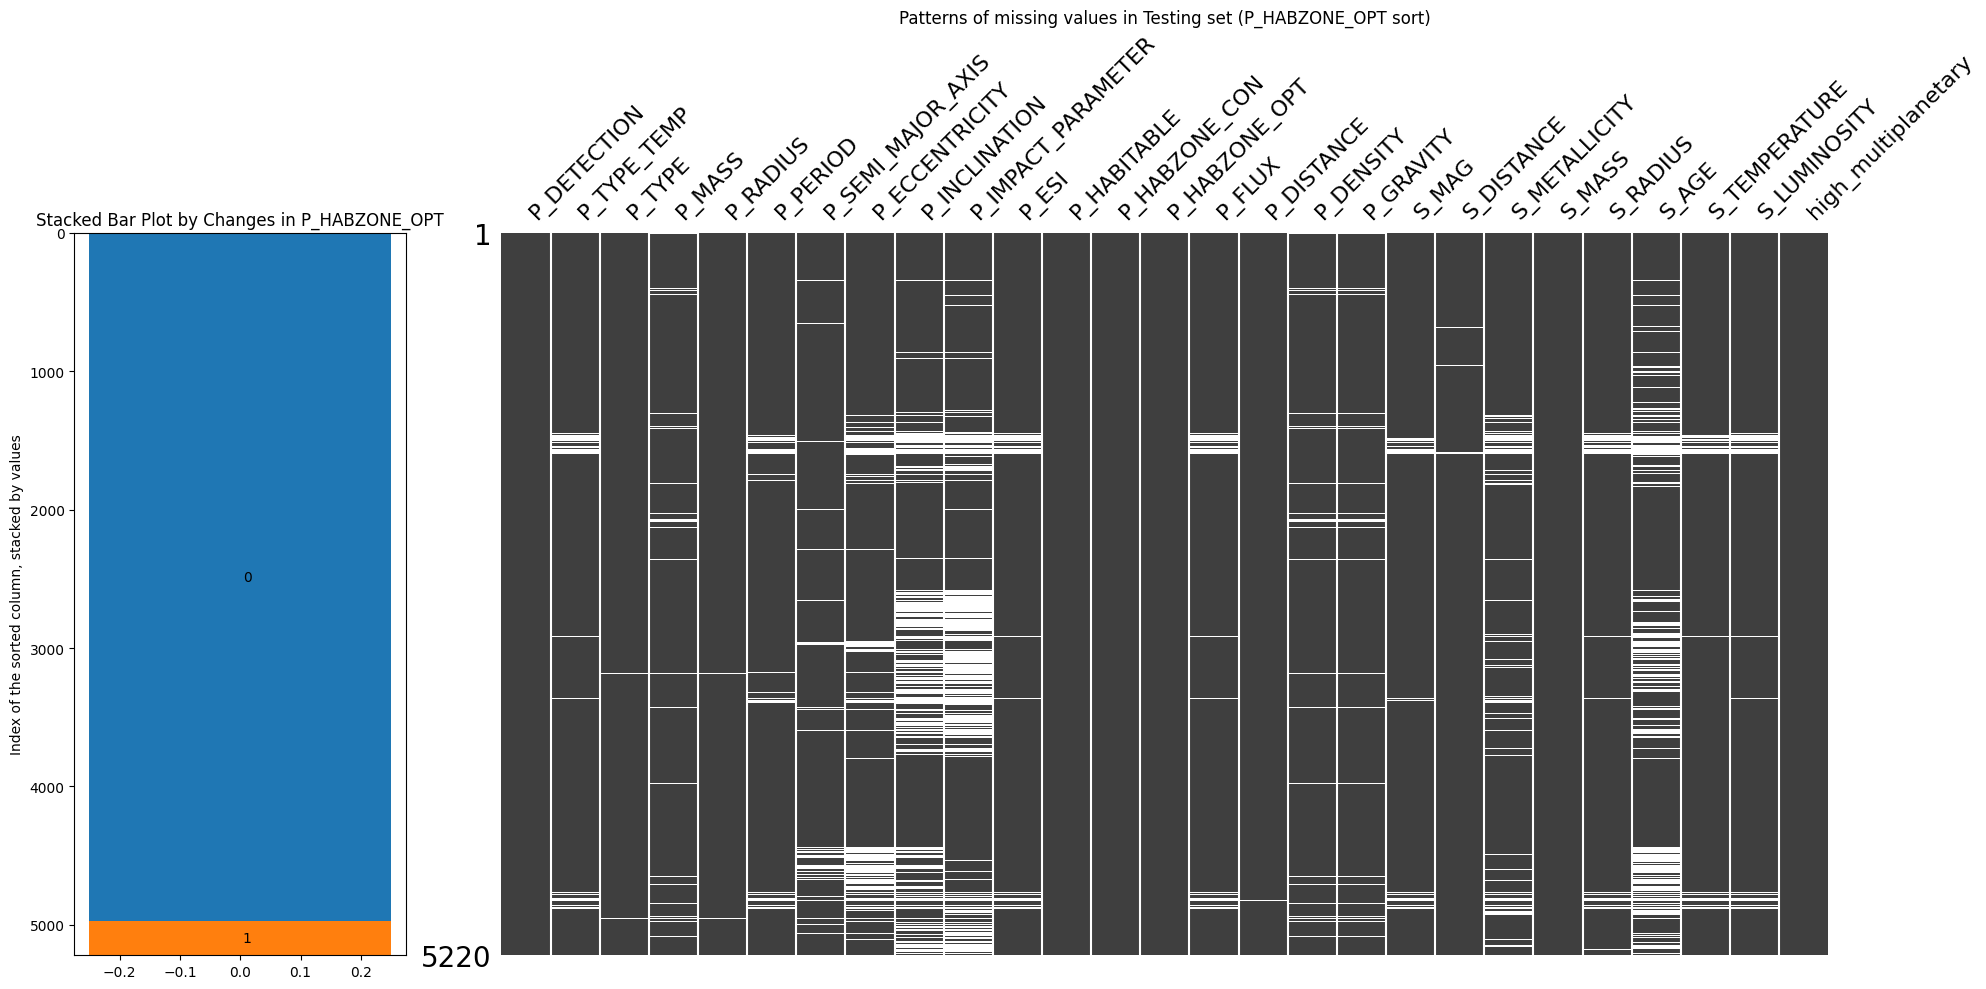

In [149]:
plot_data_with_stacked_bars(df, 'P_HABZONE_OPT')

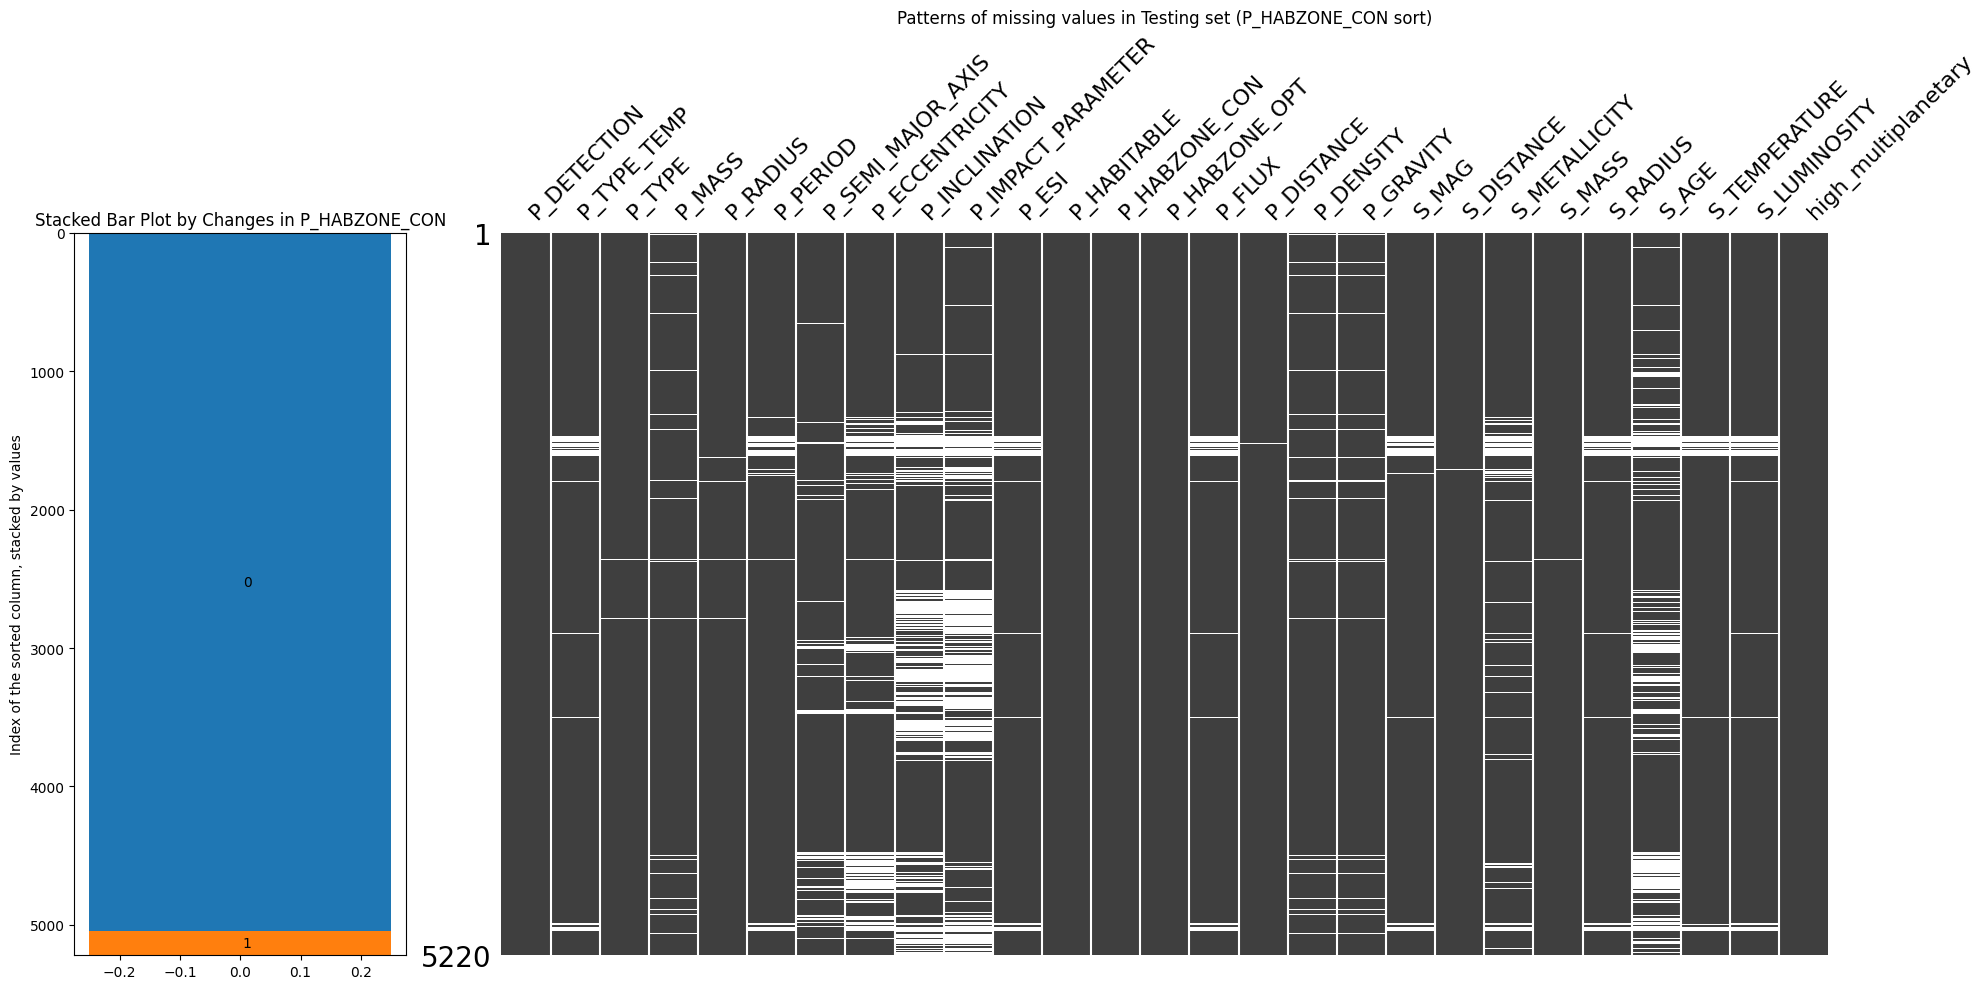

In [150]:
plot_data_with_stacked_bars(df, 'P_HABZONE_CON')

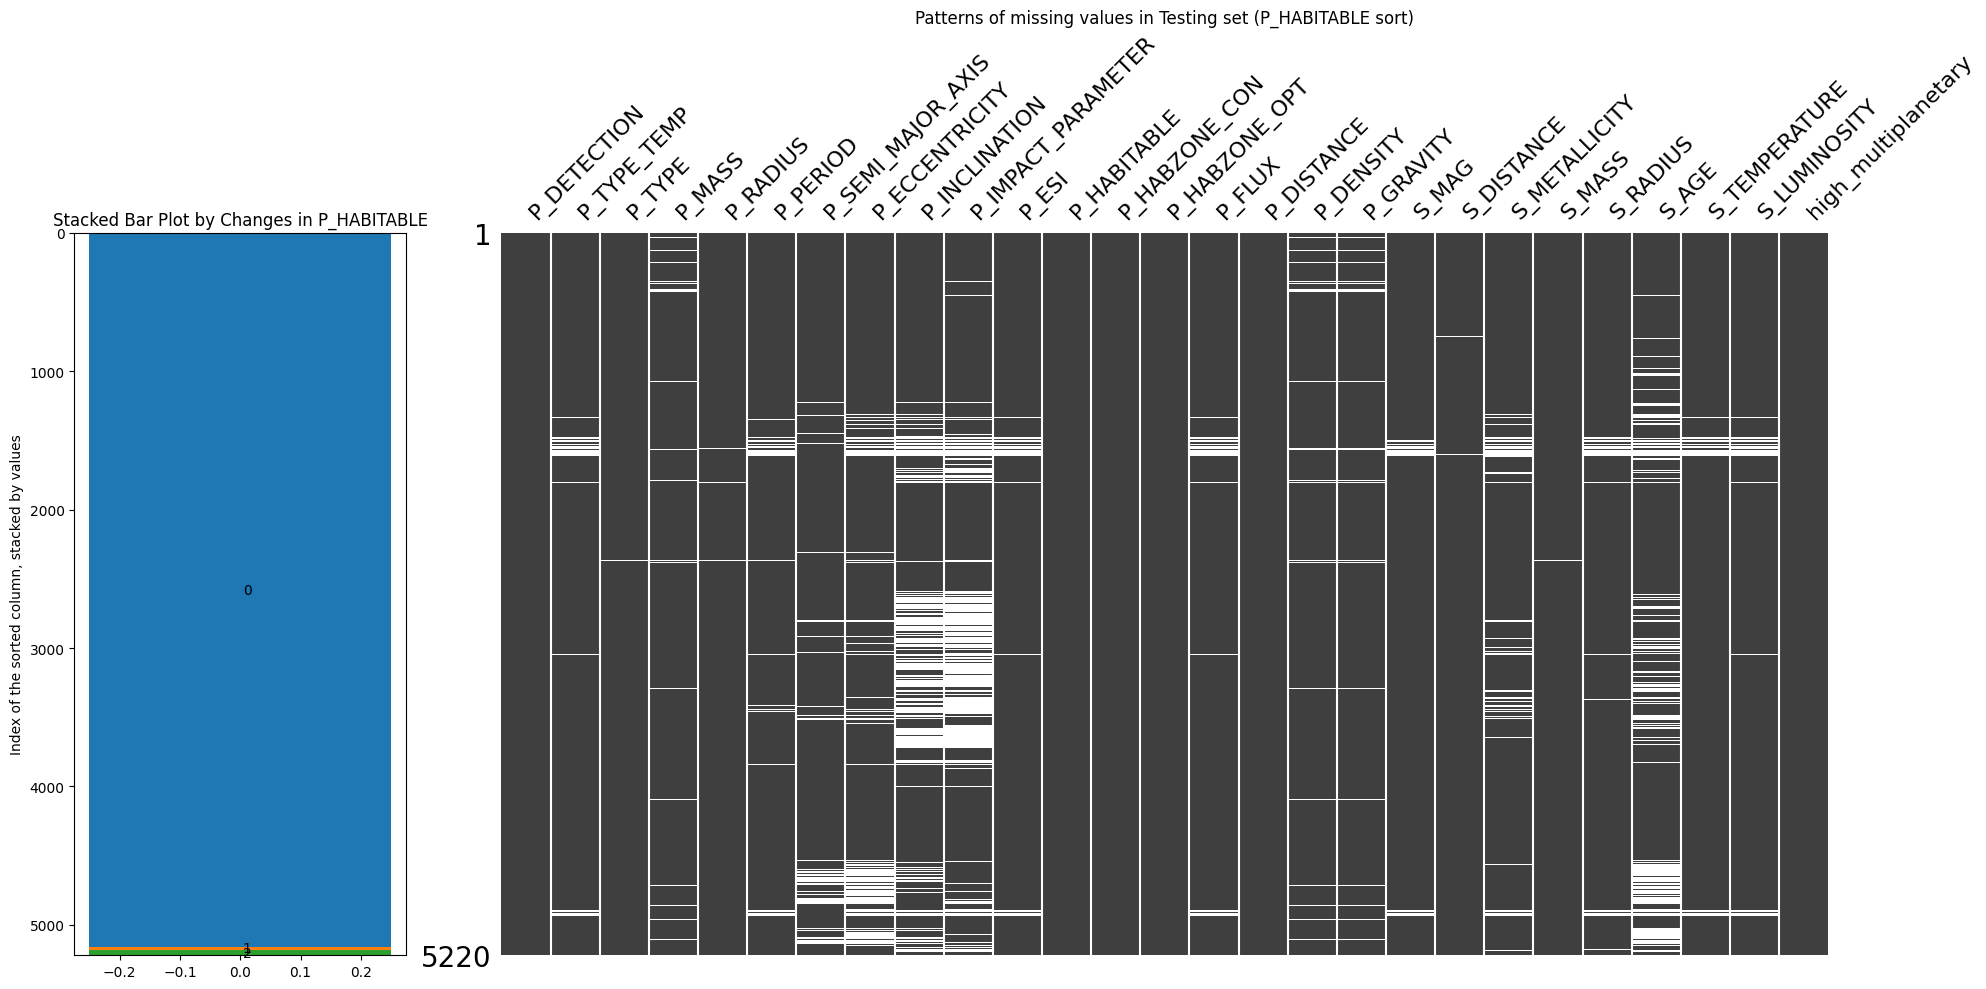

In [151]:
plot_data_with_stacked_bars(df, 'P_HABITABLE')

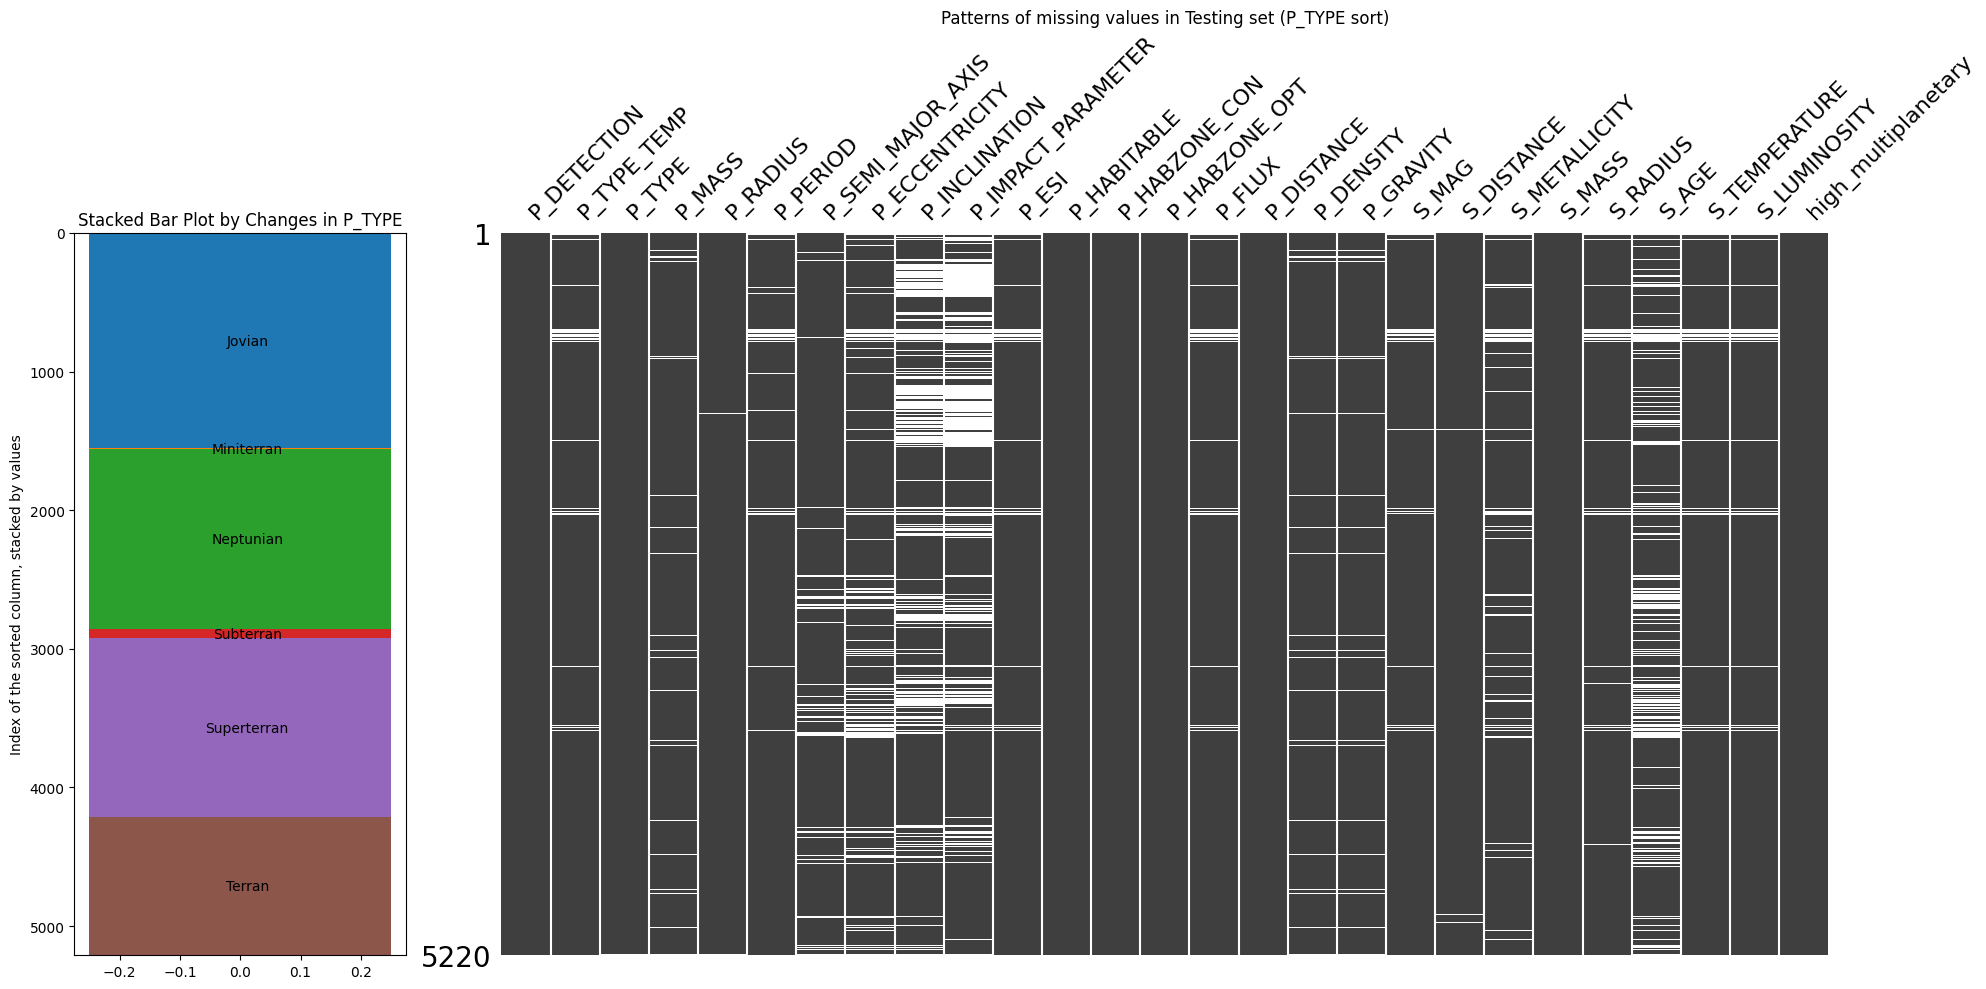

In [152]:
plot_data_with_stacked_bars(df, 'P_TYPE')

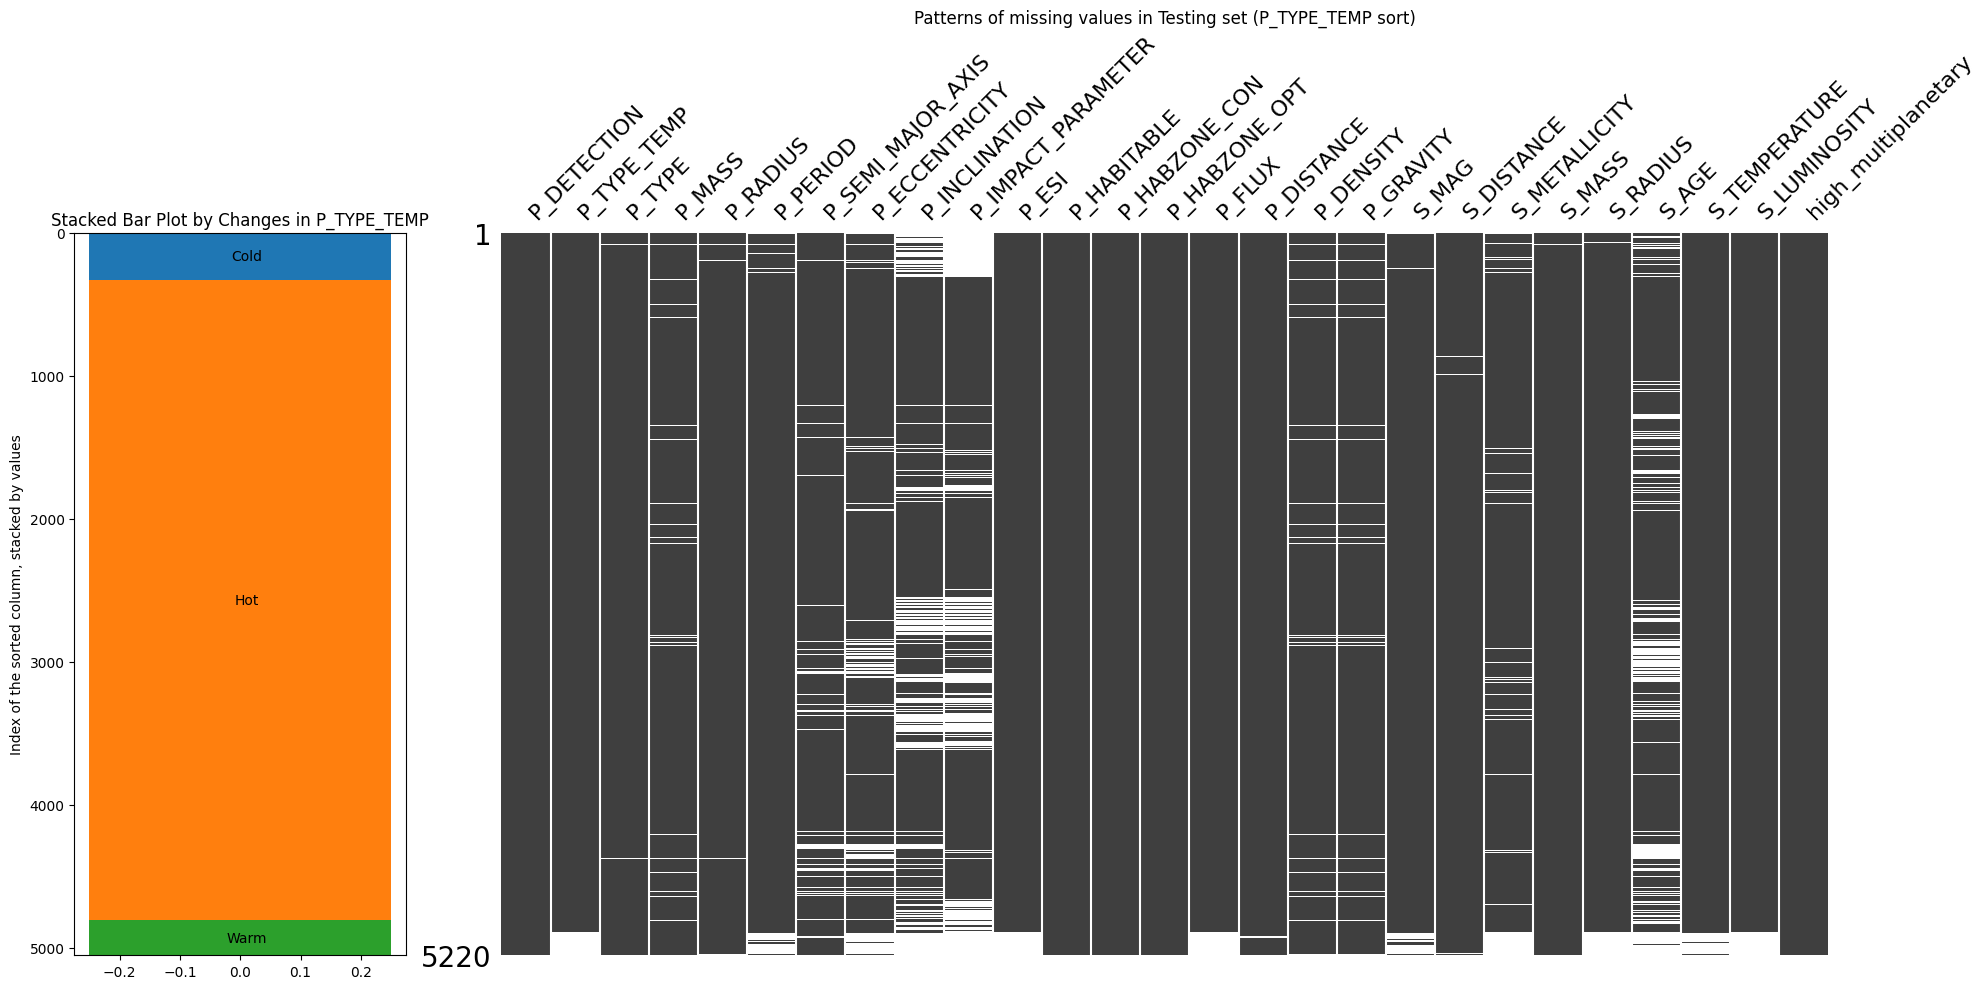

In [153]:
plot_data_with_stacked_bars(df, 'P_TYPE_TEMP')

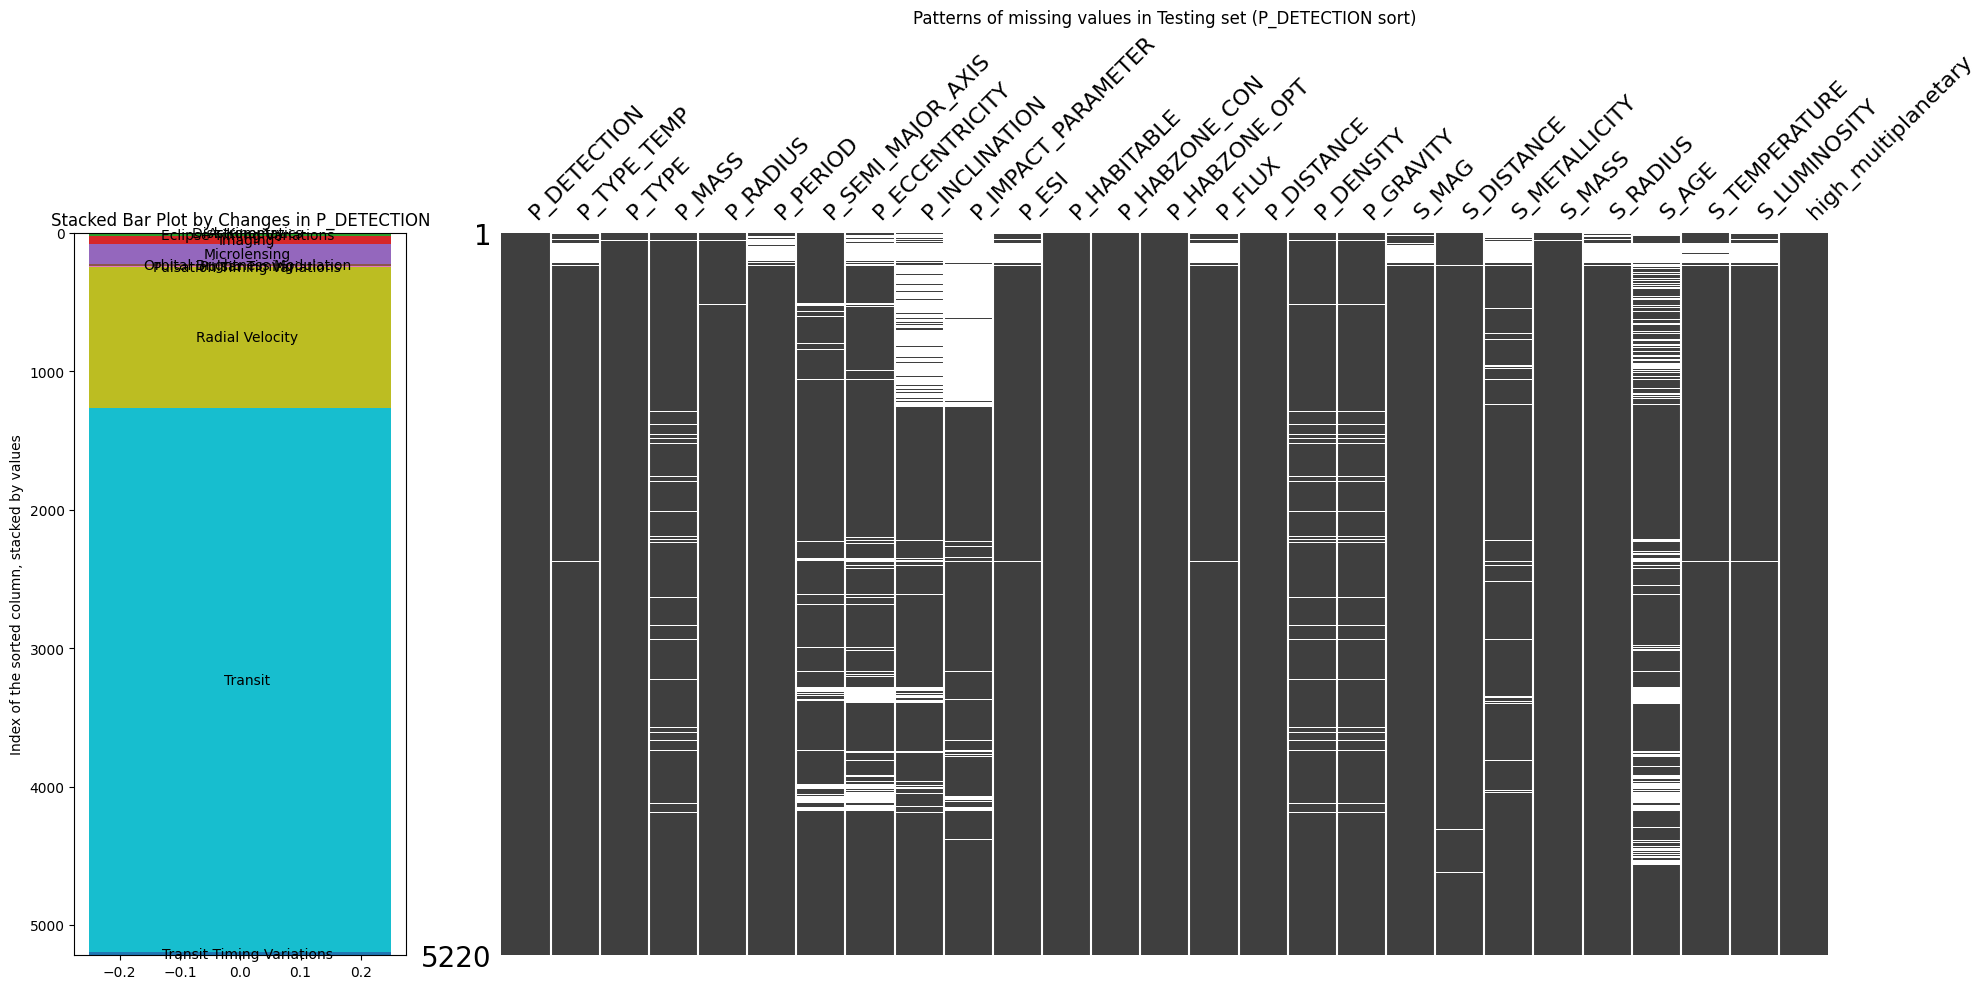

In [154]:
plot_data_with_stacked_bars(df, 'P_DETECTION')

It's important to notice here that the planet density, gravity and mass features exhibit the same pattern of missing values, simply because the mass is used to compute the two others. Similarly, star radius, temperature and luminosity also exhibit a somewhat similar pattern of missing values.

Moreover, we can see chunks of missing values, suggesting that when a variable have missing values, others also do. This type of structure removes MCAR assumption for those columns.

Let's look at the same matrix, but sorted on some variables, to see if there is any structure appearing, conforting us in whether it is MCAR, MAR or MNAR.

There is no eye-catching pattern telling us that we are more in MAR or MNAR.

Let's take a look at the correlation.

- A value near -1 means if one variable appears then the other variable is very likely to be missing ;
- A value near 0 means there is no dependence between the occurrence of missing values of two variables ;
- A value near 1 means if one variable appears then the other variable is very likely to be present.

<AxesSubplot: >

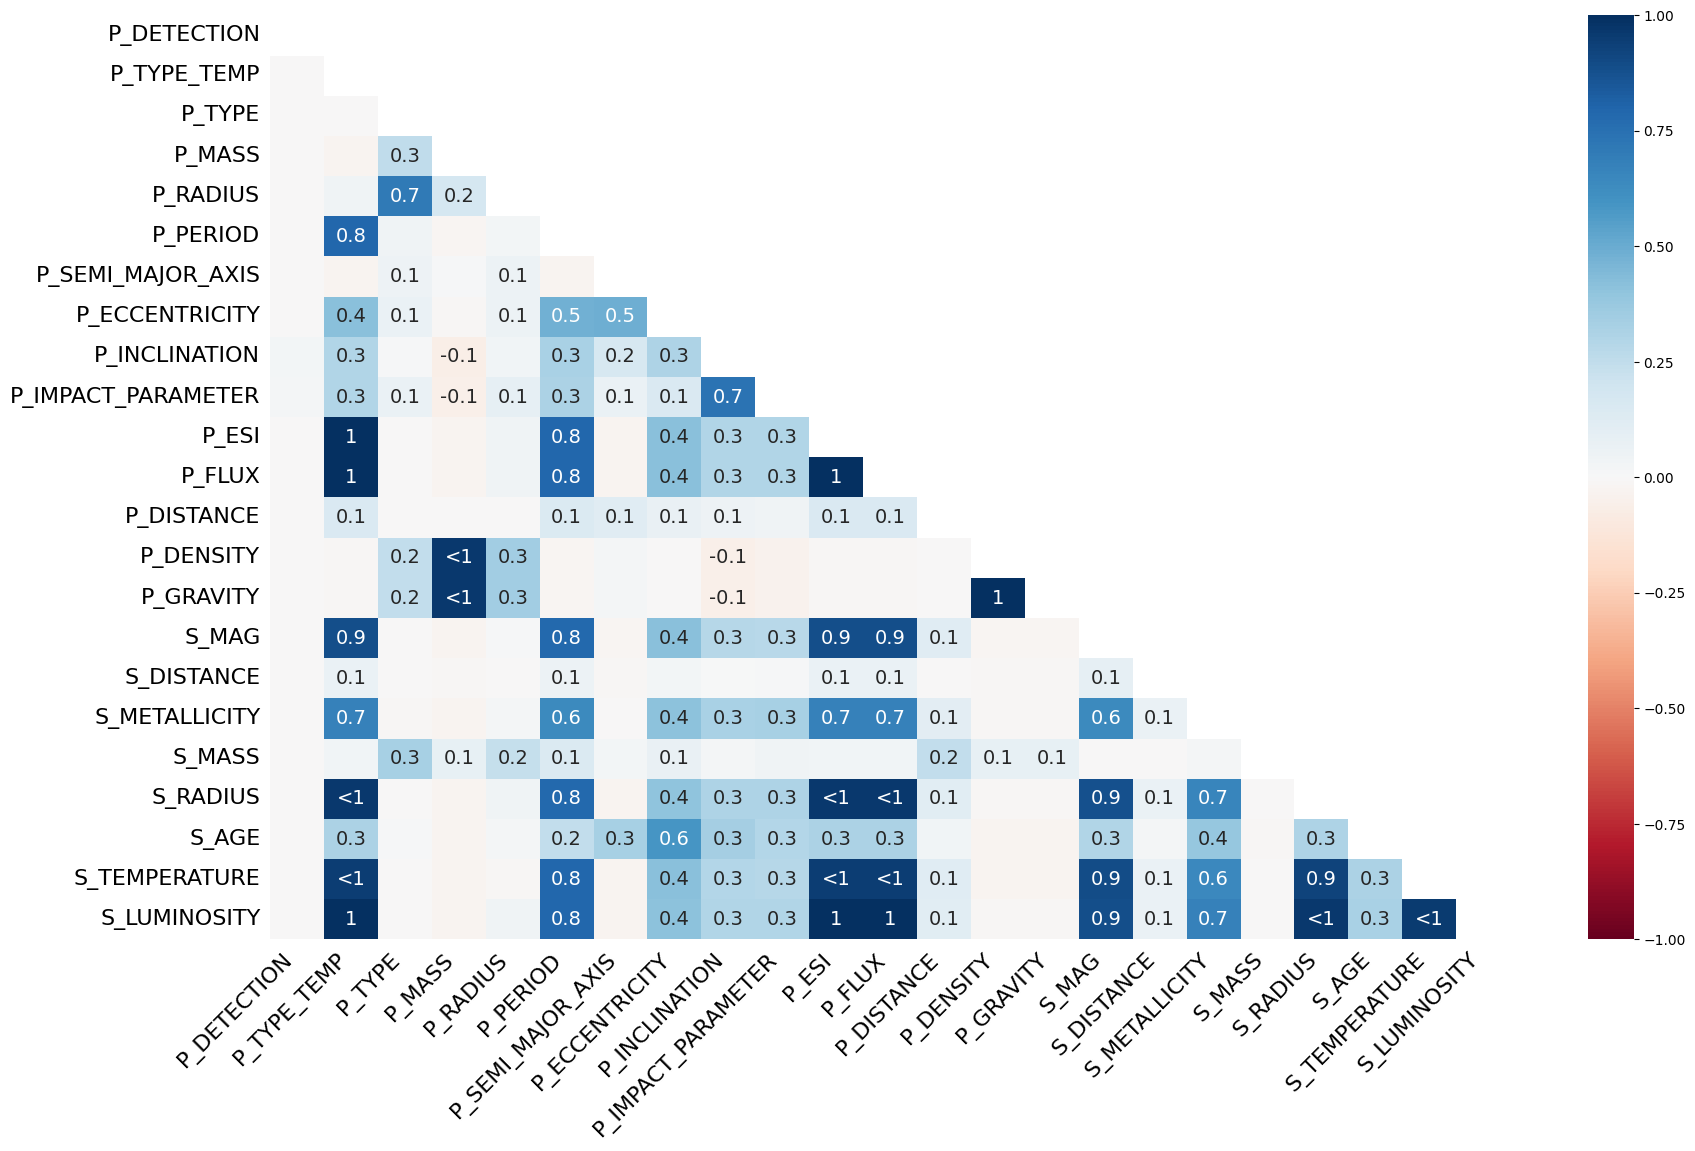

In [155]:
msno.heatmap(df)

The correlation tells us that some variables have correlated missing values :
- Period & luminosity/temperature/radius/metallicity/magnitude/flux/esi : correlated missingness ;
- P_TYPE_TEMP & luminosity/temperature/radius/metallicity/magnitude/flux/esi : correlated missingness ;

Also, some variables' missingness seem to be independent from one another :
- P_TYPE_TEMP & S_DISTANCE/P_DISTANCE ;
- P_TYPE & P_GRAVITY/P_DENSITY/P_IMPACT_PARAMETER/ECCENTRICITY/SEMI_MAJOR_AXIS ;
- P_MASS & S_MASS/IMPACT_PARAMETER/SEMI_MAJOR_AXIS ;
- P_RADIUS & IMPACT_PARAMETER/ECCENTRICTY/SEMI_MAJOR_AXIS
...

We have a lot of small correlations, meaning that, if we have a missing values, we are not likely to have one in some other features; if we have correlation between features, this is a good thing as it means we can predict missing values using other observed values, suggesting MAR missingness type.

For the project, we will assume MAR, but it's likely some are MNAR. Hence, we will use MICE imputation for the missing values.

Let's, although, take a look at a statistical test : MCAR Little Test.

In [156]:
mt = MCARTest(method='little')
print(mt.little_mcar_test(df.select_dtypes(include=np.number)))

0.0


Predicting missingness :

In [485]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [486]:
df_phl = pd.read_csv('data/phl_data.csv') 
col_to_drop = ['P_NAME', 'S_NAME', 'S_CONSTELLATION', 'P_YEAR', 'S_RA', 'S_DEC', 'hip_name', 'hd_name', 'matched']
df_phl.drop(col_to_drop, axis=1, inplace=True)
df_phl = remove_col(df_phl)

Numeric columns dropped: []
Non-numeric columns dropped: ['S_TYPE']


In [487]:
df_learn, df_test = train_test_split(df_phl, test_size=0.3, random_state=17)

In [488]:
for df in [df_test, df_learn]:
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for column in numerical_cols:
        if df[column].isnull().any():
            df[f'{column}_is_missing'] = np.where(df[column].isnull(), True, False)

Encode categorical variables : By encoding Categorical Variables, we won't Impute them.

Two techniques will be used : One Hot Encoding when the sets of values is not too big, and frequency encoding otherwise.

In [489]:
# Categorical columns

categorical_cols_learn = df_learn.select_dtypes(include=['object', 'category']).columns
categorical_cols_test = df_test.select_dtypes(include=['object', 'category']).columns

# Check if have the same categorical features in both data sets
if categorical_cols_learn.all() == categorical_cols_test.all():
    print("The lists are equal.")
else:
    print("The lists are not equal.")

print(categorical_cols_learn)

The lists are equal.
Index(['P_DETECTION', 'P_TYPE_TEMP', 'P_TYPE'], dtype='object')


In [490]:
def encode_categorical_columns(df, encoder, columns):
    encoded = encoder.transform(df[columns]).astype(float)
    return pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

def frequency_encode_column(df_train, df_test, column, nan_placeholder='Missing'):
    df_train_filled = df_train[column].fillna(nan_placeholder)
    df_test_filled = df_test[column].fillna(nan_placeholder)

    frequencies = df_train_filled.value_counts(normalize=True)

    train_encoded = df_train_filled.map(frequencies)
    test_encoded = df_test_filled.map(frequencies)

    return train_encoded, test_encoded

# Initialize the One Hot Encoder
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(df_learn[['P_TYPE_TEMP', 'P_TYPE']])

# One Hot Encoding
learn_encoded_df = encode_categorical_columns(df_learn, one_hot_encoder, ['P_TYPE_TEMP', 'P_TYPE'])
test_encoded_df = encode_categorical_columns(df_test, one_hot_encoder, ['P_TYPE_TEMP', 'P_TYPE'])

# Frequency encoding 
learn_encoded_df['DETECTION_Encoded'] = frequency_encode_column(df_learn.reset_index(), df_test.reset_index(), 'P_DETECTION')[0]
test_encoded_df['DETECTION_Encoded'] = frequency_encode_column(df_learn.reset_index(), df_test.reset_index(), 'P_DETECTION')[1]

# Dropping original categorical columns
df_learn_temp = df_learn.drop(columns=categorical_cols_learn)
df_test_temp = df_test.drop(columns=categorical_cols_test)

# Resetting index and Concatenating DataFrames
learn_final = pd.concat([df_learn_temp.reset_index(drop=True), learn_encoded_df.reset_index(drop=True)], axis=1)
test_final = pd.concat([df_test_temp.reset_index(drop=True), test_encoded_df.reset_index(drop=True)], axis=1)

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [491]:
# List of columns without missing values

complete_values_variables_list=[]

for column in learn_final.columns:
        if "_is_missing" not in column:
            if learn_final[column].notnull().all():
                complete_values_variables_list.append(column)

complete_values_variables_list

['P_HABITABLE',
 'P_HABZONE_CON',
 'P_HABZONE_OPT',
 'high_multiplanetary',
 'P_TYPE_TEMP_Cold',
 'P_TYPE_TEMP_Hot',
 'P_TYPE_TEMP_Warm',
 'P_TYPE_TEMP_nan',
 'P_TYPE_Jovian',
 'P_TYPE_Miniterran',
 'P_TYPE_Neptunian',
 'P_TYPE_Subterran',
 'P_TYPE_Superterran',
 'P_TYPE_Terran',
 'P_TYPE_nan',
 'DETECTION_Encoded']

In [494]:
# List of columns with missing values
missing_values_variables_list=[]

for missing_indicator in filter(lambda c: "_is_missing" in c, learn_final.columns):
    missing_values_variables_list.append(missing_indicator)

missing_values_variables_list

['P_MASS_is_missing',
 'P_RADIUS_is_missing',
 'P_PERIOD_is_missing',
 'P_SEMI_MAJOR_AXIS_is_missing',
 'P_ECCENTRICITY_is_missing',
 'P_INCLINATION_is_missing',
 'P_IMPACT_PARAMETER_is_missing',
 'P_ESI_is_missing',
 'P_FLUX_is_missing',
 'P_DISTANCE_is_missing',
 'P_DENSITY_is_missing',
 'P_GRAVITY_is_missing',
 'S_MAG_is_missing',
 'S_DISTANCE_is_missing',
 'S_METALLICITY_is_missing',
 'S_MASS_is_missing',
 'S_RADIUS_is_missing',
 'S_AGE_is_missing',
 'S_TEMPERATURE_is_missing',
 'S_LUMINOSITY_is_missing']

In [495]:
complete_values_variables_list=[]

for column in learn_final.columns:
        if "_is_missing" not in column:
            if learn_final[column].notnull().all():
                complete_values_variables_list.append(column)

complete_values_variables_list

['P_HABITABLE',
 'P_HABZONE_CON',
 'P_HABZONE_OPT',
 'high_multiplanetary',
 'P_TYPE_TEMP_Cold',
 'P_TYPE_TEMP_Hot',
 'P_TYPE_TEMP_Warm',
 'P_TYPE_TEMP_nan',
 'P_TYPE_Jovian',
 'P_TYPE_Miniterran',
 'P_TYPE_Neptunian',
 'P_TYPE_Subterran',
 'P_TYPE_Superterran',
 'P_TYPE_Terran',
 'P_TYPE_nan',
 'DETECTION_Encoded']

In [505]:
missing_values_variables_list

['P_MASS_is_missing',
 'P_RADIUS_is_missing',
 'P_PERIOD_is_missing',
 'P_SEMI_MAJOR_AXIS_is_missing',
 'P_ECCENTRICITY_is_missing',
 'P_INCLINATION_is_missing',
 'P_IMPACT_PARAMETER_is_missing',
 'P_ESI_is_missing',
 'P_FLUX_is_missing',
 'P_DISTANCE_is_missing',
 'P_DENSITY_is_missing',
 'P_GRAVITY_is_missing',
 'S_MAG_is_missing',
 'S_DISTANCE_is_missing',
 'S_METALLICITY_is_missing',
 'S_MASS_is_missing',
 'S_RADIUS_is_missing',
 'S_AGE_is_missing',
 'S_TEMPERATURE_is_missing',
 'S_LUMINOSITY_is_missing']

In [507]:
complete_values_variables_list_temp=complete_values_variables_list.copy()
feature=complete_values_variables_list_temp

# Create a dictionary to store feature importances for each target variable
feature_importance_dict = {}

# In case one value not seen in train and present in test, drop it

test_final.dropna(inplace=True)

# Iterate over each target variable
for t in missing_values_variables_list:

    # Prepare data
    X_train = learn_final[feature]
    y_train = learn_final[t]
    X_test = test_final[feature]
    y_test = test_final[t]

    print(f"Class distribution in training set for {t}:\n", y_train.value_counts())

    # Create and train RandomForestClassifier
    model = RandomForestClassifier(random_state=17)
    cv_folds = KFold(n_splits=5, shuffle=True, random_state=17)
    

    algorithm_params = {
        'n_estimators': np.arange(50,60,10),
        'max_depth': np.arange(5,15,10),
    }

    grid_search = GridSearchCV(model, algorithm_params, cv = cv_folds, scoring='neg_mean_squared_error',n_jobs=-1)
    grid_search.fit(X_train, y_train.astype(float))

    best_model = grid_search.best_estimator_

    # Get feature importances
    feature_importances = best_model.feature_importances_
    feature_importance_dict[t] = dict(zip(feature, feature_importances))

    # Evaluate model performance
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test.astype(float), y_pred.astype(float))
    conf_matrix = confusion_matrix(y_test.astype(float), y_pred.astype(float))

    # Check if conf_matrix is not one-dimensional
    if conf_matrix.shape == (2, 2):
        precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
        sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    else:
        precision = 'Not applicable'
        sensitivity = 'Not applicable'
        print("Warning: Only one class present in y_pred or y_test.")
    print(f"Model Accuracy for {t}: {accuracy}")
    print(f"Model Precision for {t}: {precision} ")
    print(f"Model Sensitivity for {t}: {sensitivity} ")

Class distribution in training set for P_MASS_is_missing:
 False    3562
True       92
Name: P_MASS_is_missing, dtype: int64
Model Accuracy for P_MASS_is_missing: 1.0
Model Precision for P_MASS_is_missing: Not applicable 
Model Sensitivity for P_MASS_is_missing: Not applicable 
Class distribution in training set for P_RADIUS_is_missing:
 False    3643
True       11
Name: P_RADIUS_is_missing, dtype: int64
Model Accuracy for P_RADIUS_is_missing: 1.0
Model Precision for P_RADIUS_is_missing: Not applicable 
Model Sensitivity for P_RADIUS_is_missing: Not applicable 
Class distribution in training set for P_PERIOD_is_missing:
 False    3543
True      111
Name: P_PERIOD_is_missing, dtype: int64
Model Accuracy for P_PERIOD_is_missing: 1.0
Model Precision for P_PERIOD_is_missing: Not applicable 
Model Sensitivity for P_PERIOD_is_missing: Not applicable 
Class distribution in training set for P_SEMI_MAJOR_AXIS_is_missing:
 False    3455
True      199
Name: P_SEMI_MAJOR_AXIS_is_missing, dtype: in

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1984\2607073736.py:49: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])


Model Accuracy for P_INCLINATION_is_missing: 0.9891186071817193
Model Precision for P_INCLINATION_is_missing: 0.0 
Model Sensitivity for P_INCLINATION_is_missing: nan 
Class distribution in training set for P_IMPACT_PARAMETER_is_missing:
 False    2699
True      955
Name: P_IMPACT_PARAMETER_is_missing, dtype: int64


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1984\2607073736.py:49: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])


Model Accuracy for P_IMPACT_PARAMETER_is_missing: 0.984766050054407
Model Precision for P_IMPACT_PARAMETER_is_missing: 0.0 
Model Sensitivity for P_IMPACT_PARAMETER_is_missing: nan 
Class distribution in training set for P_ESI_is_missing:
 False    3551
True      103
Name: P_ESI_is_missing, dtype: int64
Model Accuracy for P_ESI_is_missing: 1.0
Model Precision for P_ESI_is_missing: Not applicable 
Model Sensitivity for P_ESI_is_missing: Not applicable 
Class distribution in training set for P_FLUX_is_missing:
 False    3551
True      103
Name: P_FLUX_is_missing, dtype: int64
Model Accuracy for P_FLUX_is_missing: 1.0
Model Precision for P_FLUX_is_missing: Not applicable 
Model Sensitivity for P_FLUX_is_missing: Not applicable 
Class distribution in training set for P_DISTANCE_is_missing:
 False    3652
True        2
Name: P_DISTANCE_is_missing, dtype: int64
Model Accuracy for P_DISTANCE_is_missing: 1.0
Model Precision for P_DISTANCE_is_missing: Not applicable 
Model Sensitivity for P_DIS

For AT-HYG dataset

In [508]:
df_at_hyg = pd.read_csv('data/at_hyg_data.csv')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1984\239155627.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_at_hyg = pd.read_csv('data/at_hyg_data.csv')


In [510]:
df_at_hyg.drop(['proper', 'id', 'hip', 'hd', 'hyg', 'spect'], axis = 1, inplace=True)

In [511]:
null_values_df = df_at_hyg.isnull().mean().sort_values(ascending=False)*100
null_values_df = null_values_df[null_values_df>0]

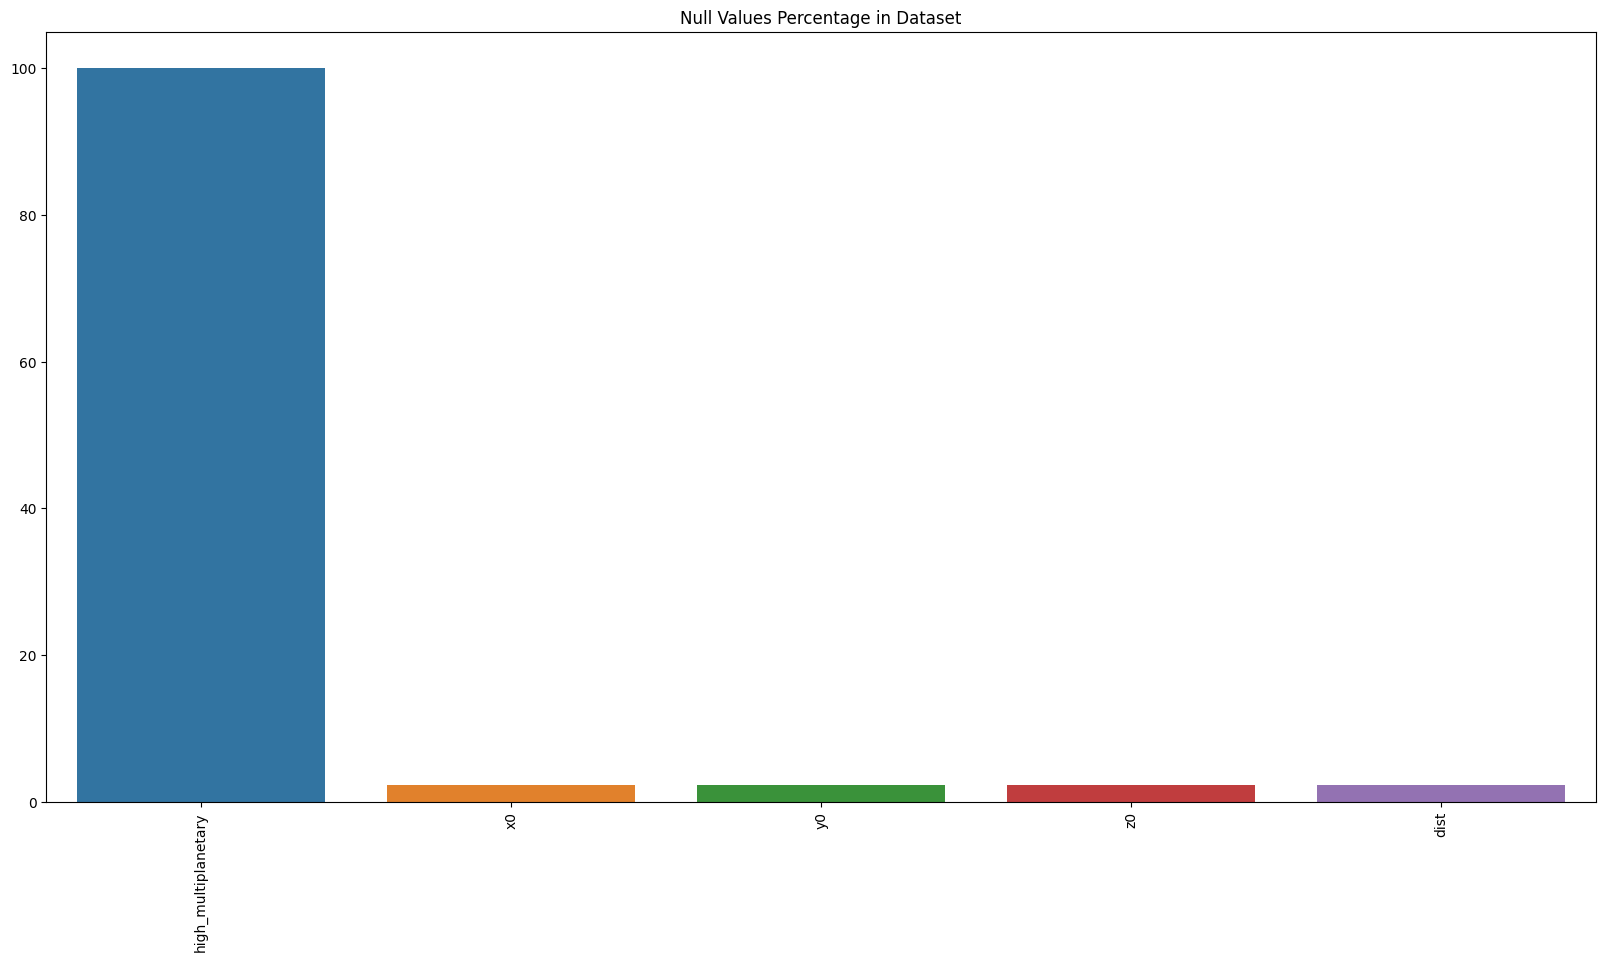

In [512]:
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x=null_values_df.index, y=null_values_df.values)
ax.set_title('Null Values Percentage in Dataset')
plt.xticks(rotation=90) 
plt.show()

In [514]:
df_at_hyg.isna().sum()

ra                           0
dec                          0
dist                     58068
x0                       58698
y0                       58698
z0                       58698
mag                          0
absmag                       0
rv                           0
ci                           0
host_exoplanet               0
high_multiplanetary    2551468
dtype: int64

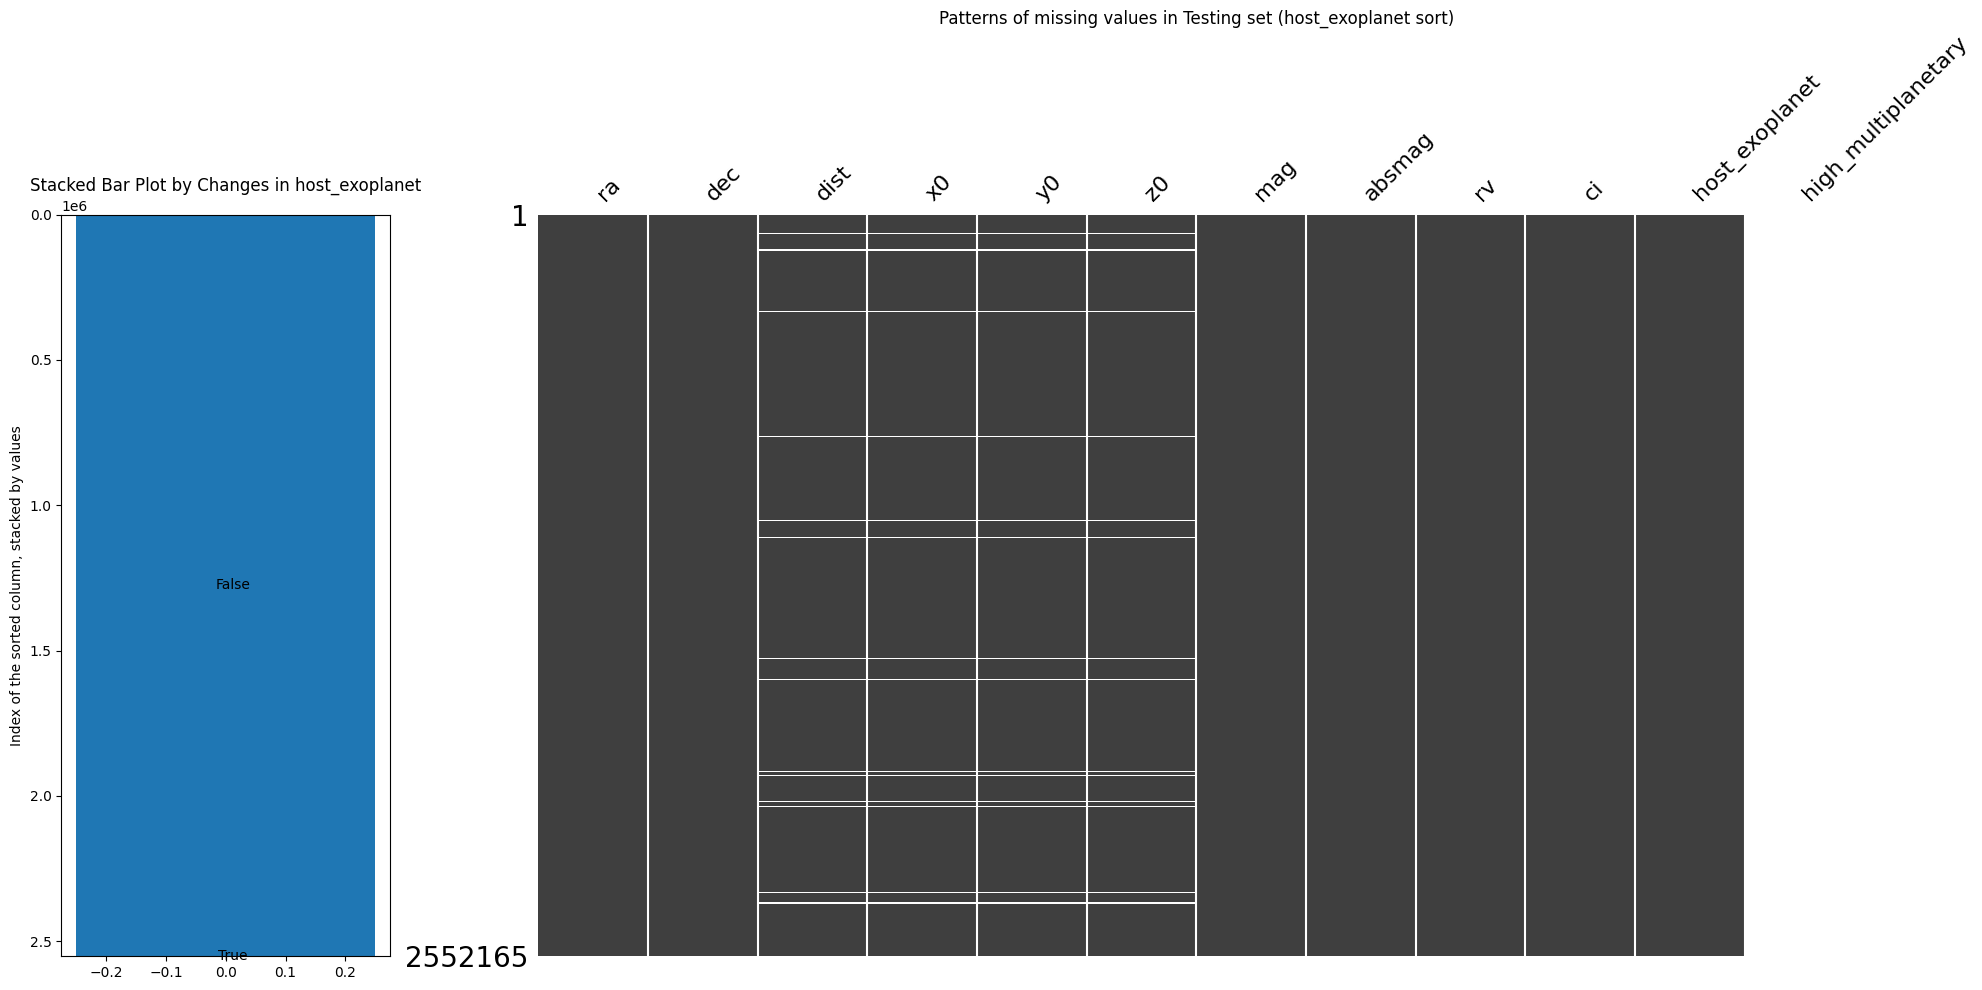

In [522]:
plot_data_with_stacked_bars(df_at_hyg, 'host_exoplanet')

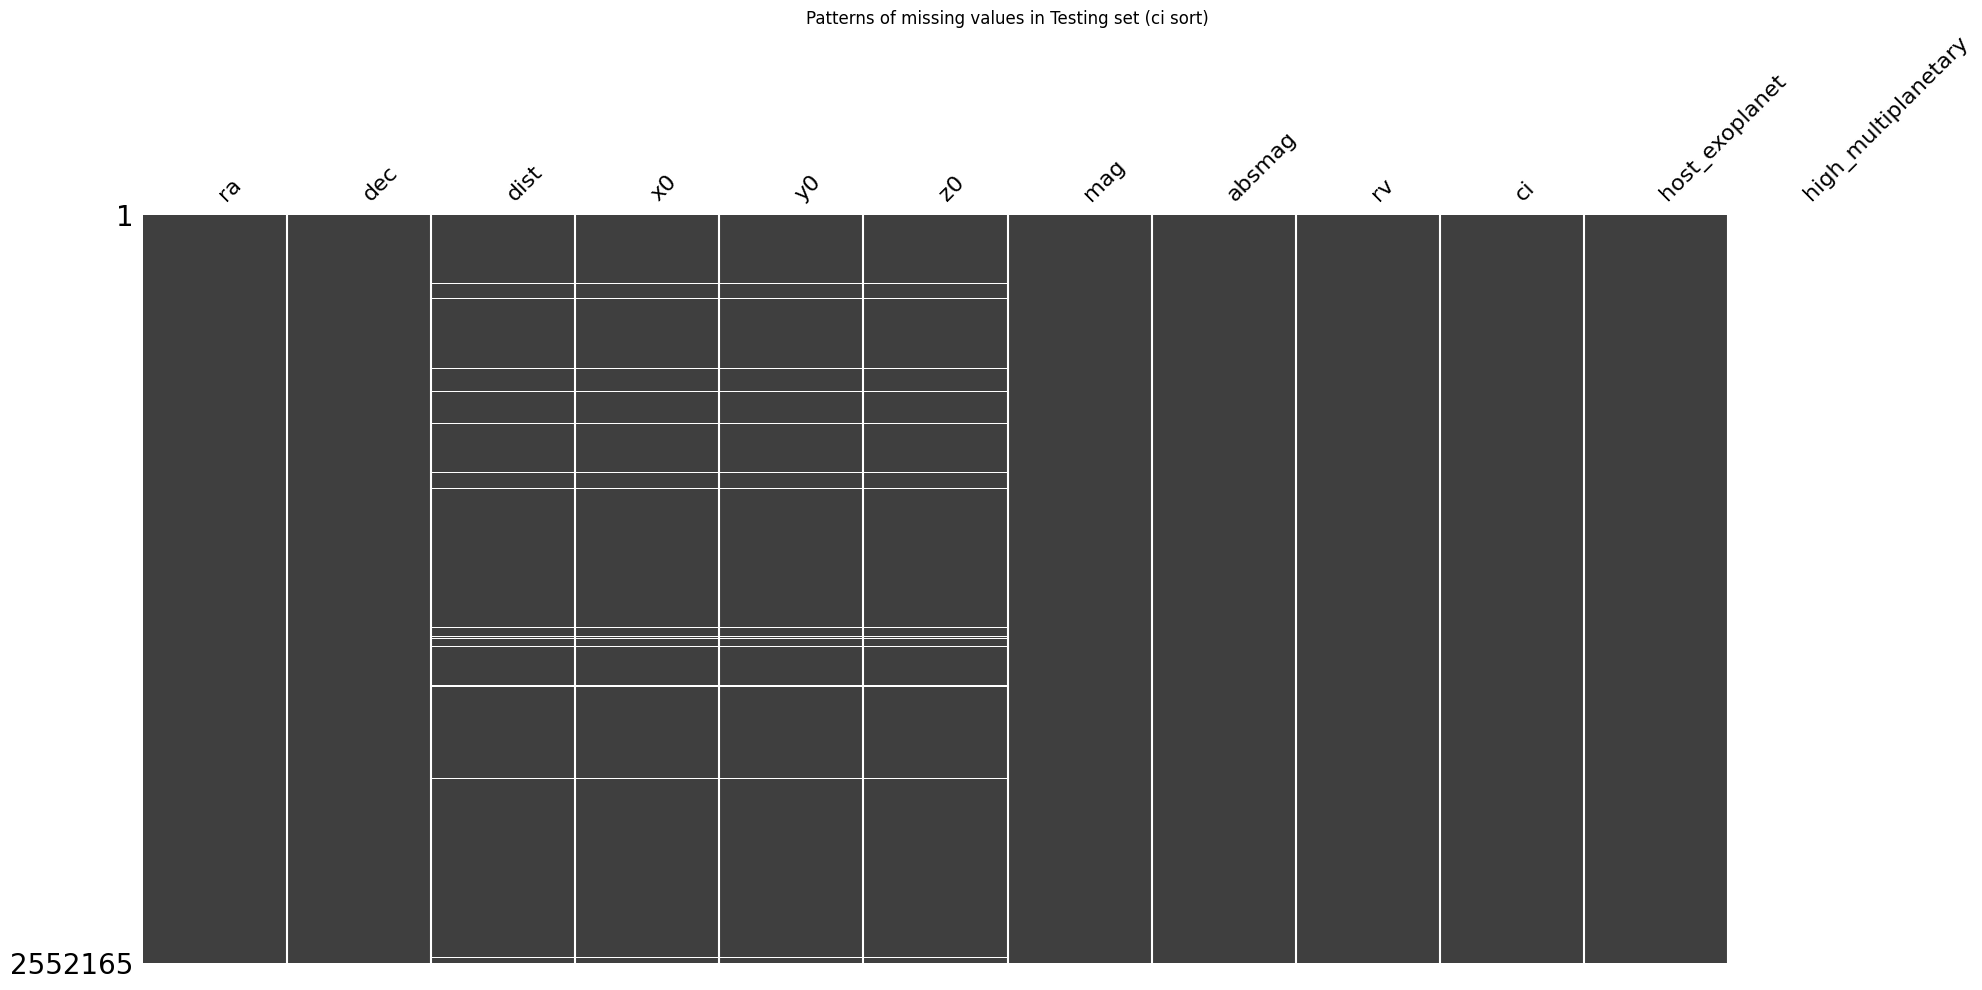

In [521]:
plot_data_with_stacked_bars(df_at_hyg, 'ci')

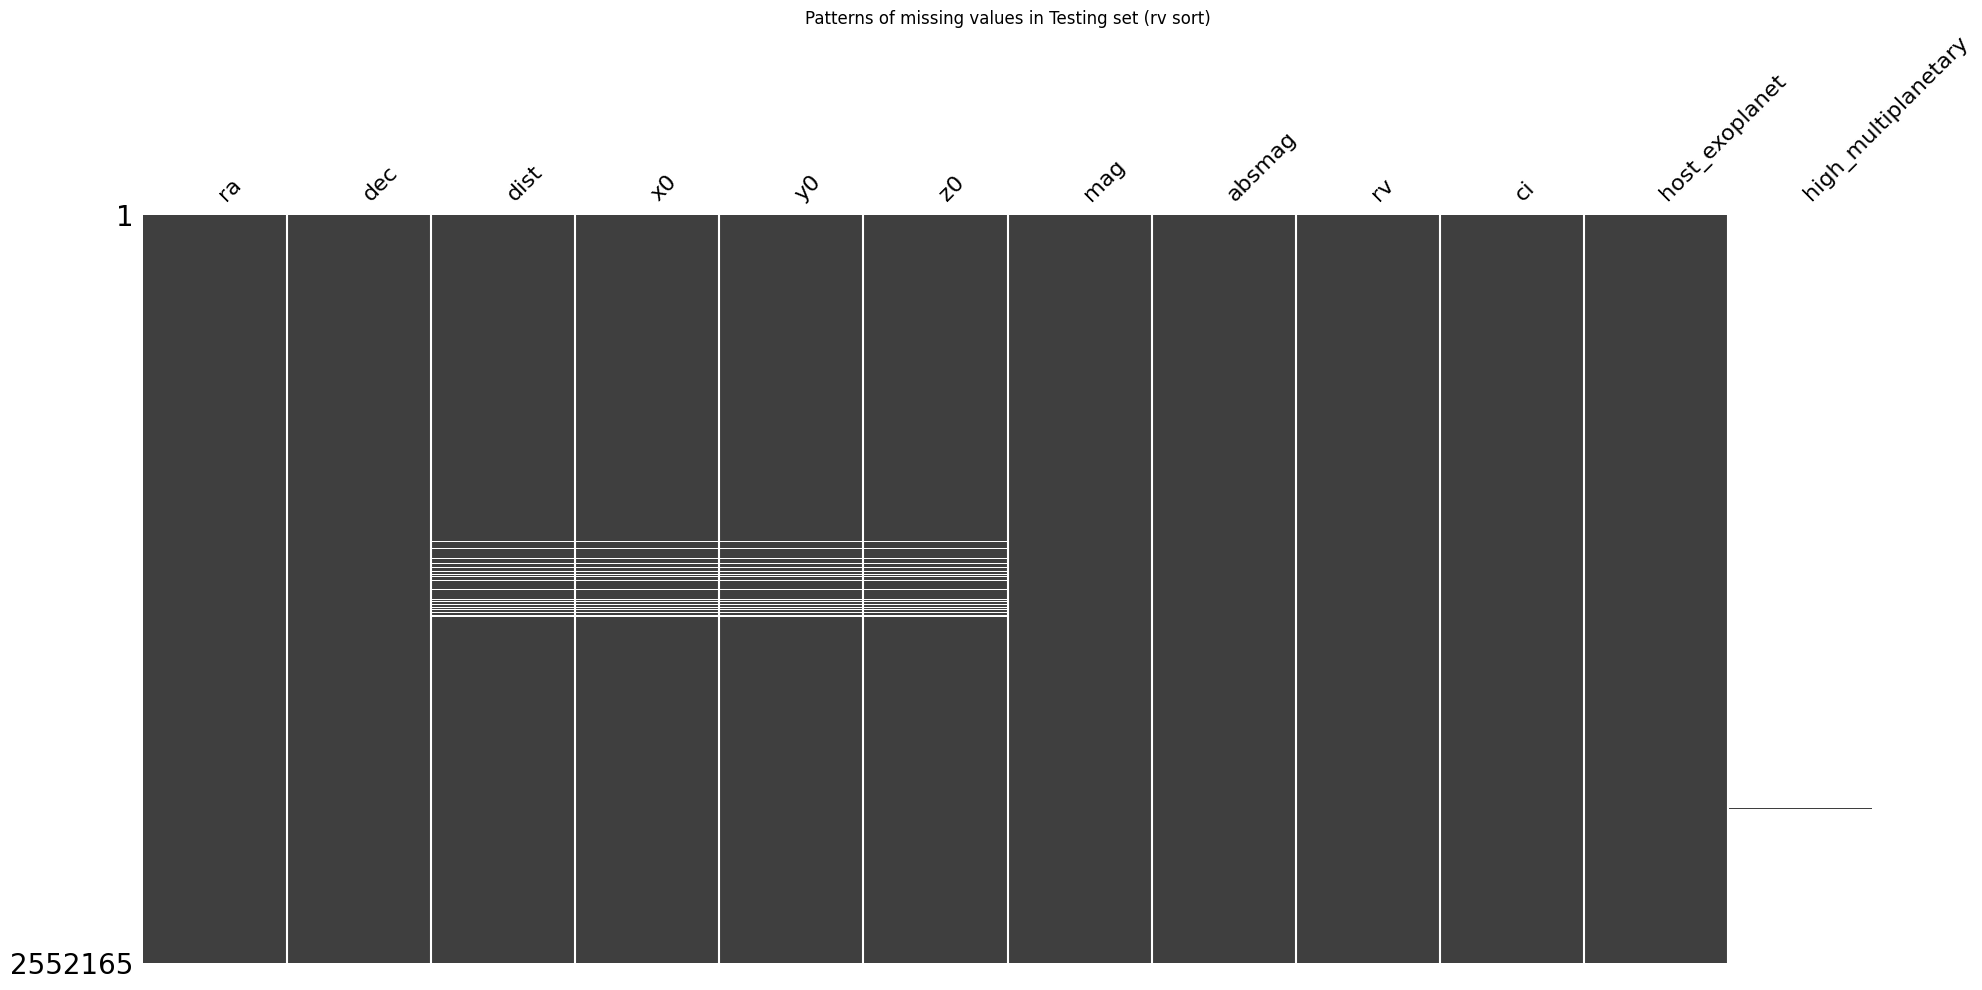

In [525]:
plot_data_with_stacked_bars(df_at_hyg, 'rv')

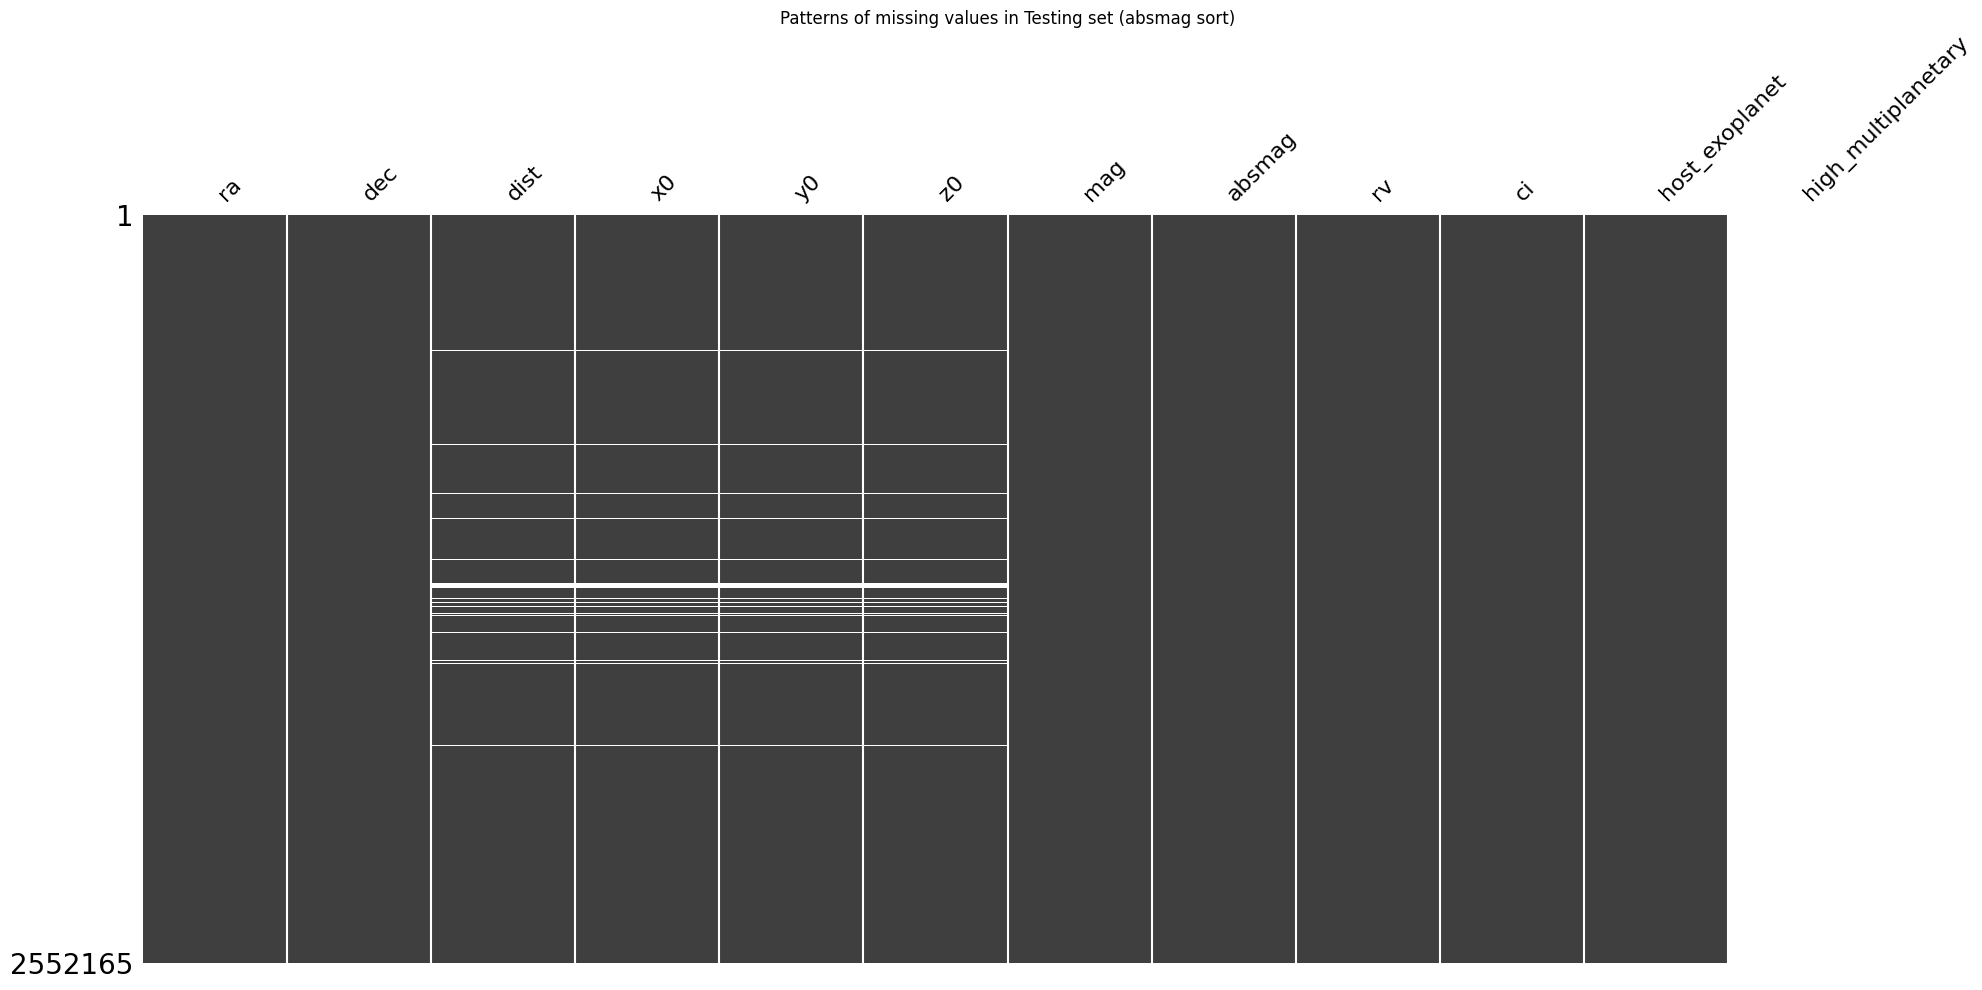

In [519]:
plot_data_with_stacked_bars(df_at_hyg, 'absmag')

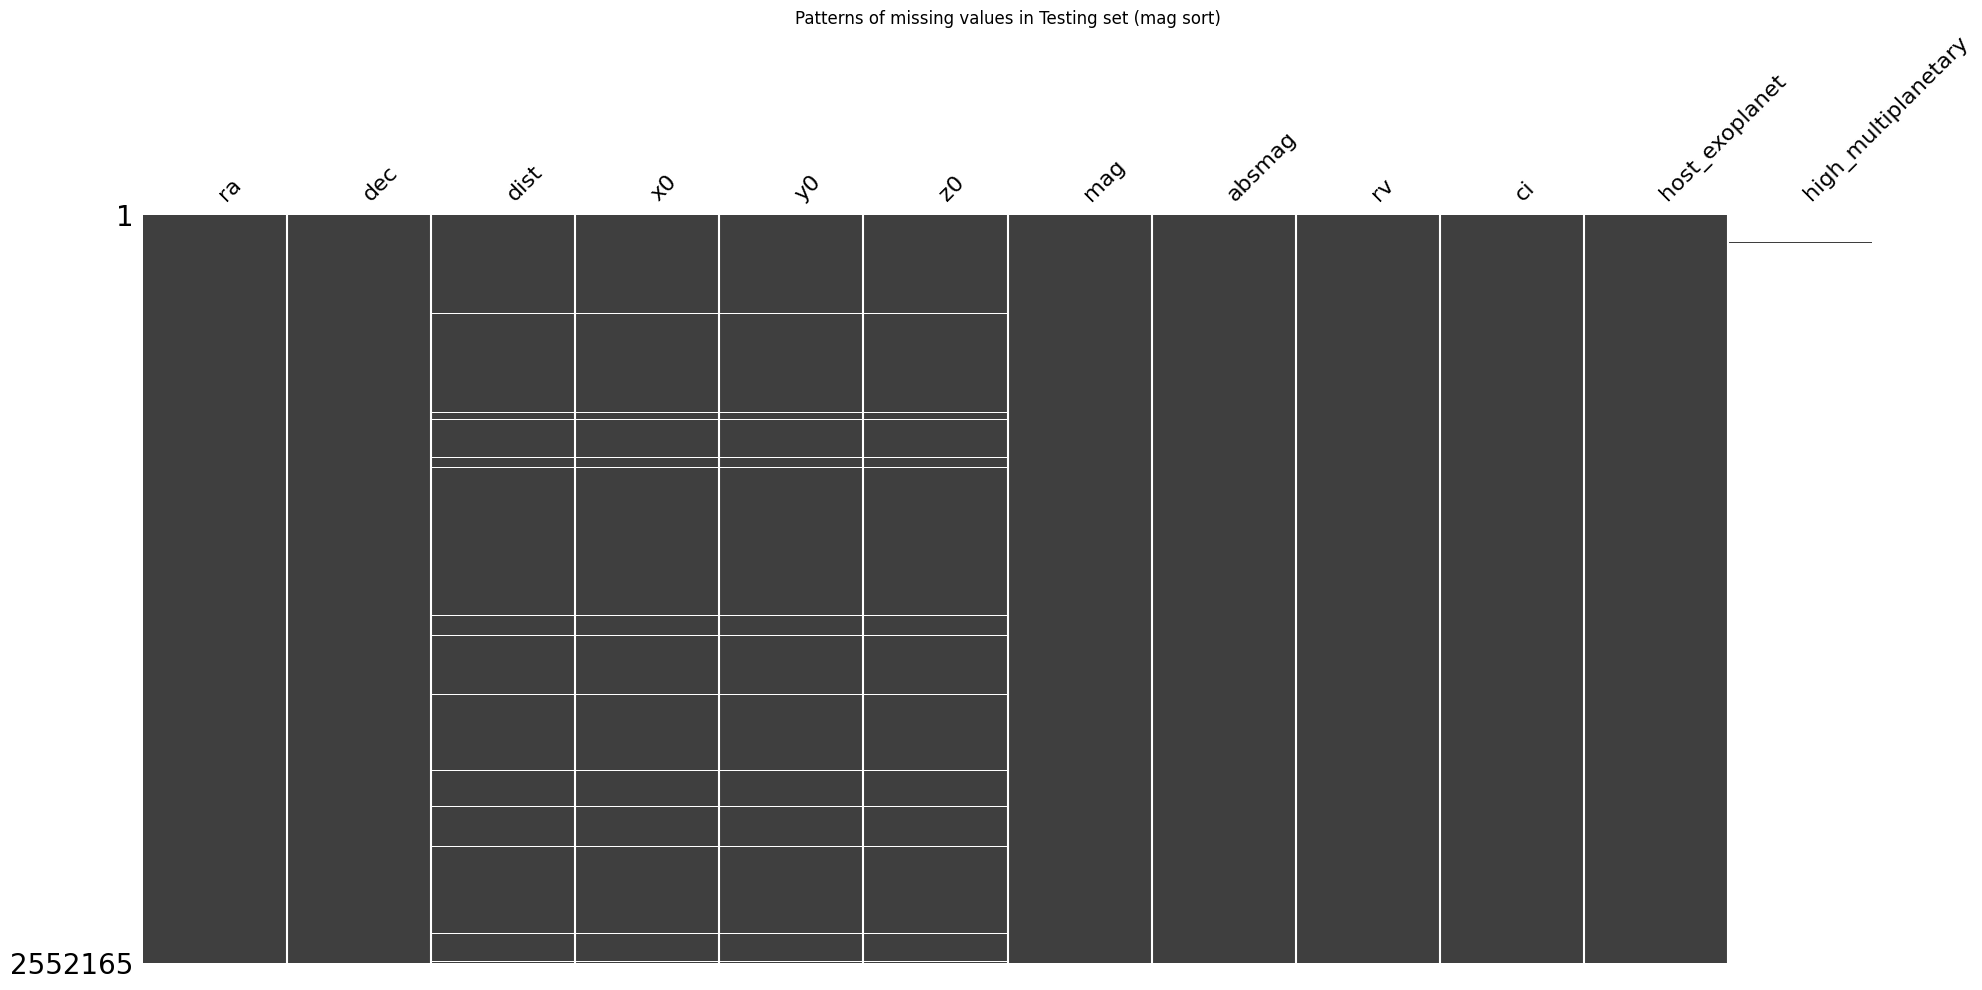

In [518]:
plot_data_with_stacked_bars(df_at_hyg, 'mag')

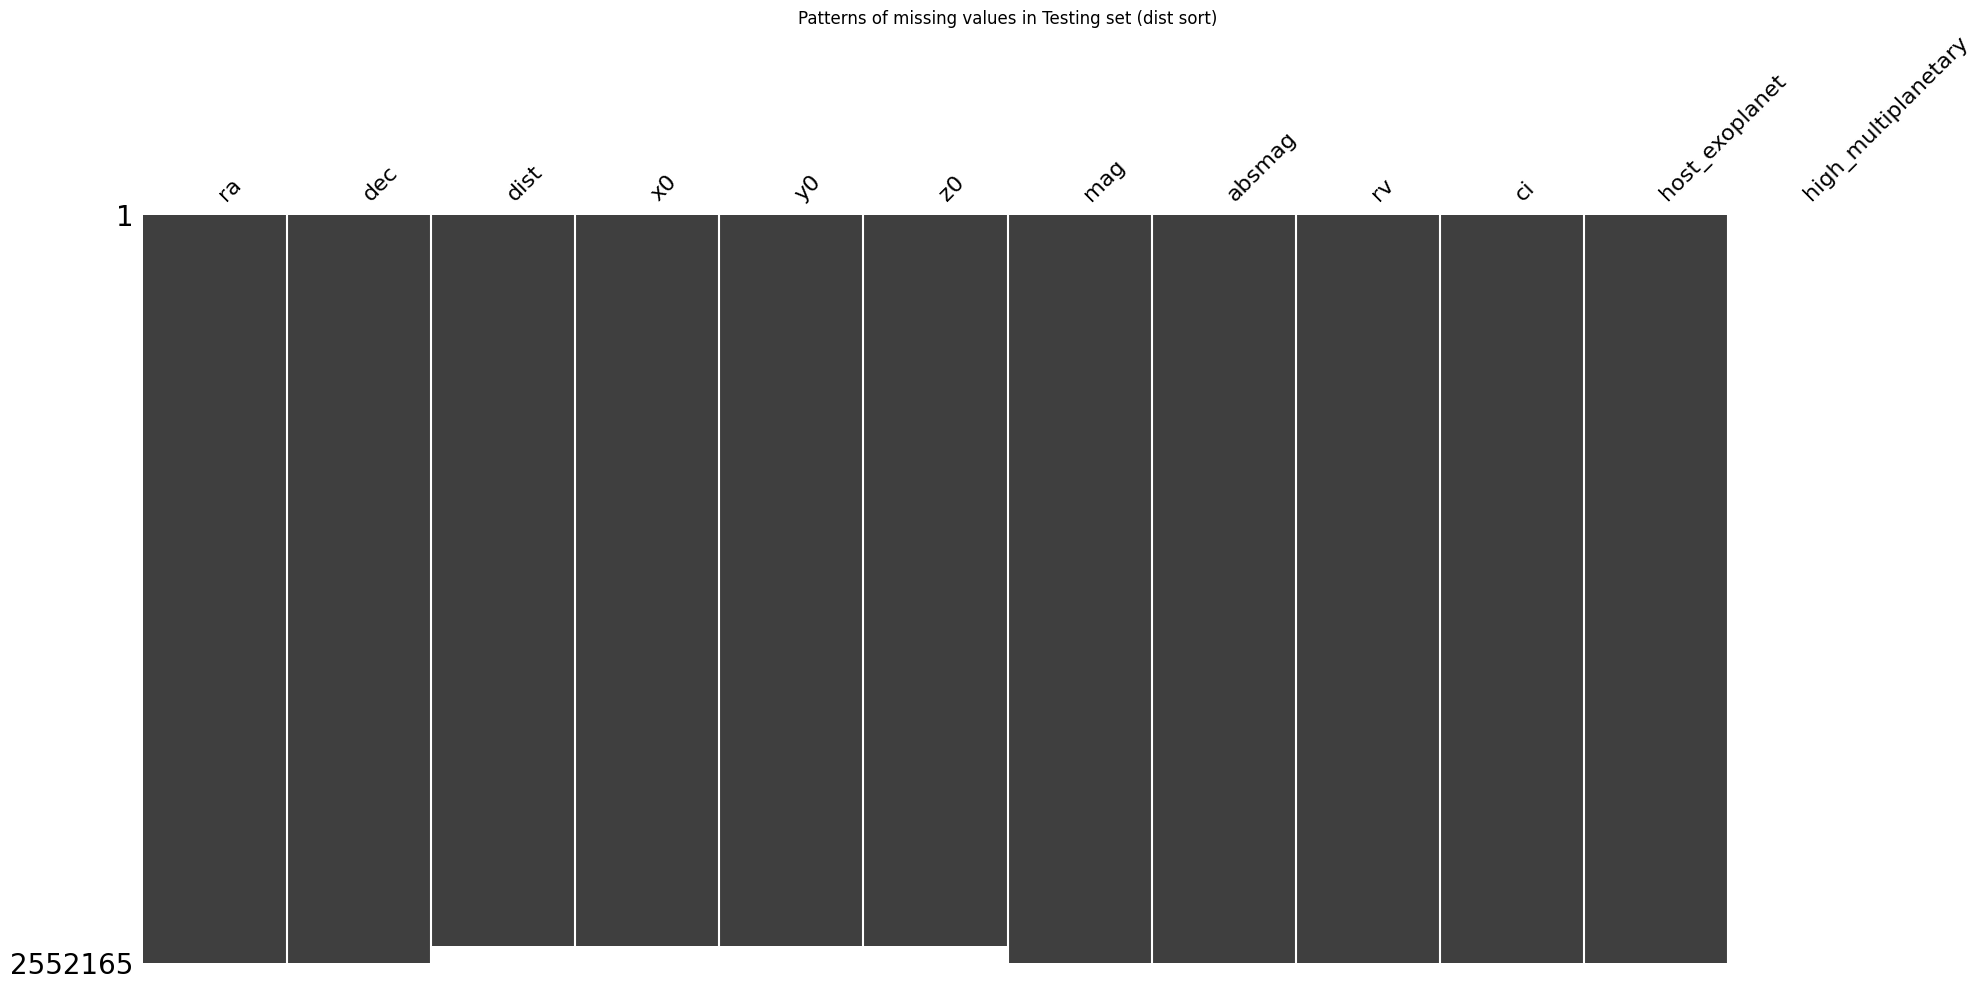

In [517]:
plot_data_with_stacked_bars(df_at_hyg, 'dist')

We see that stars that are the furthest away don't have localisation.

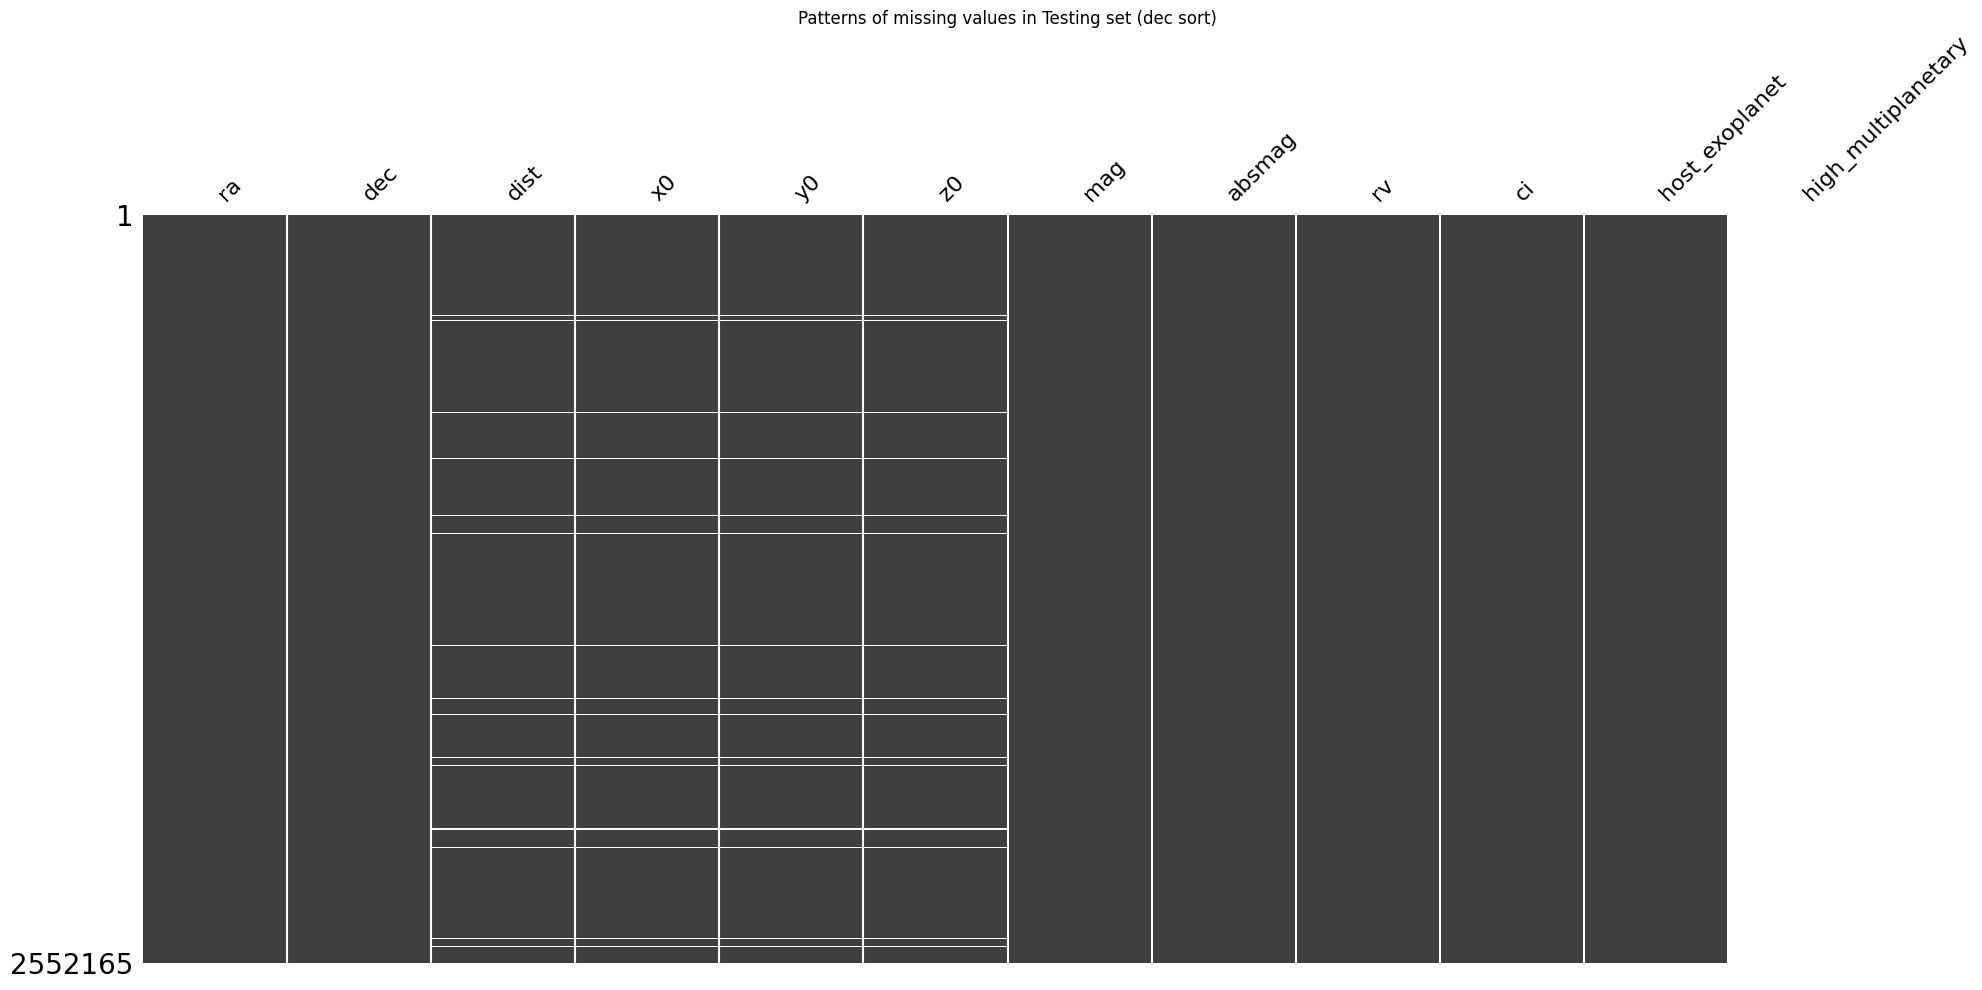

In [516]:
plot_data_with_stacked_bars(df_at_hyg, 'dec')

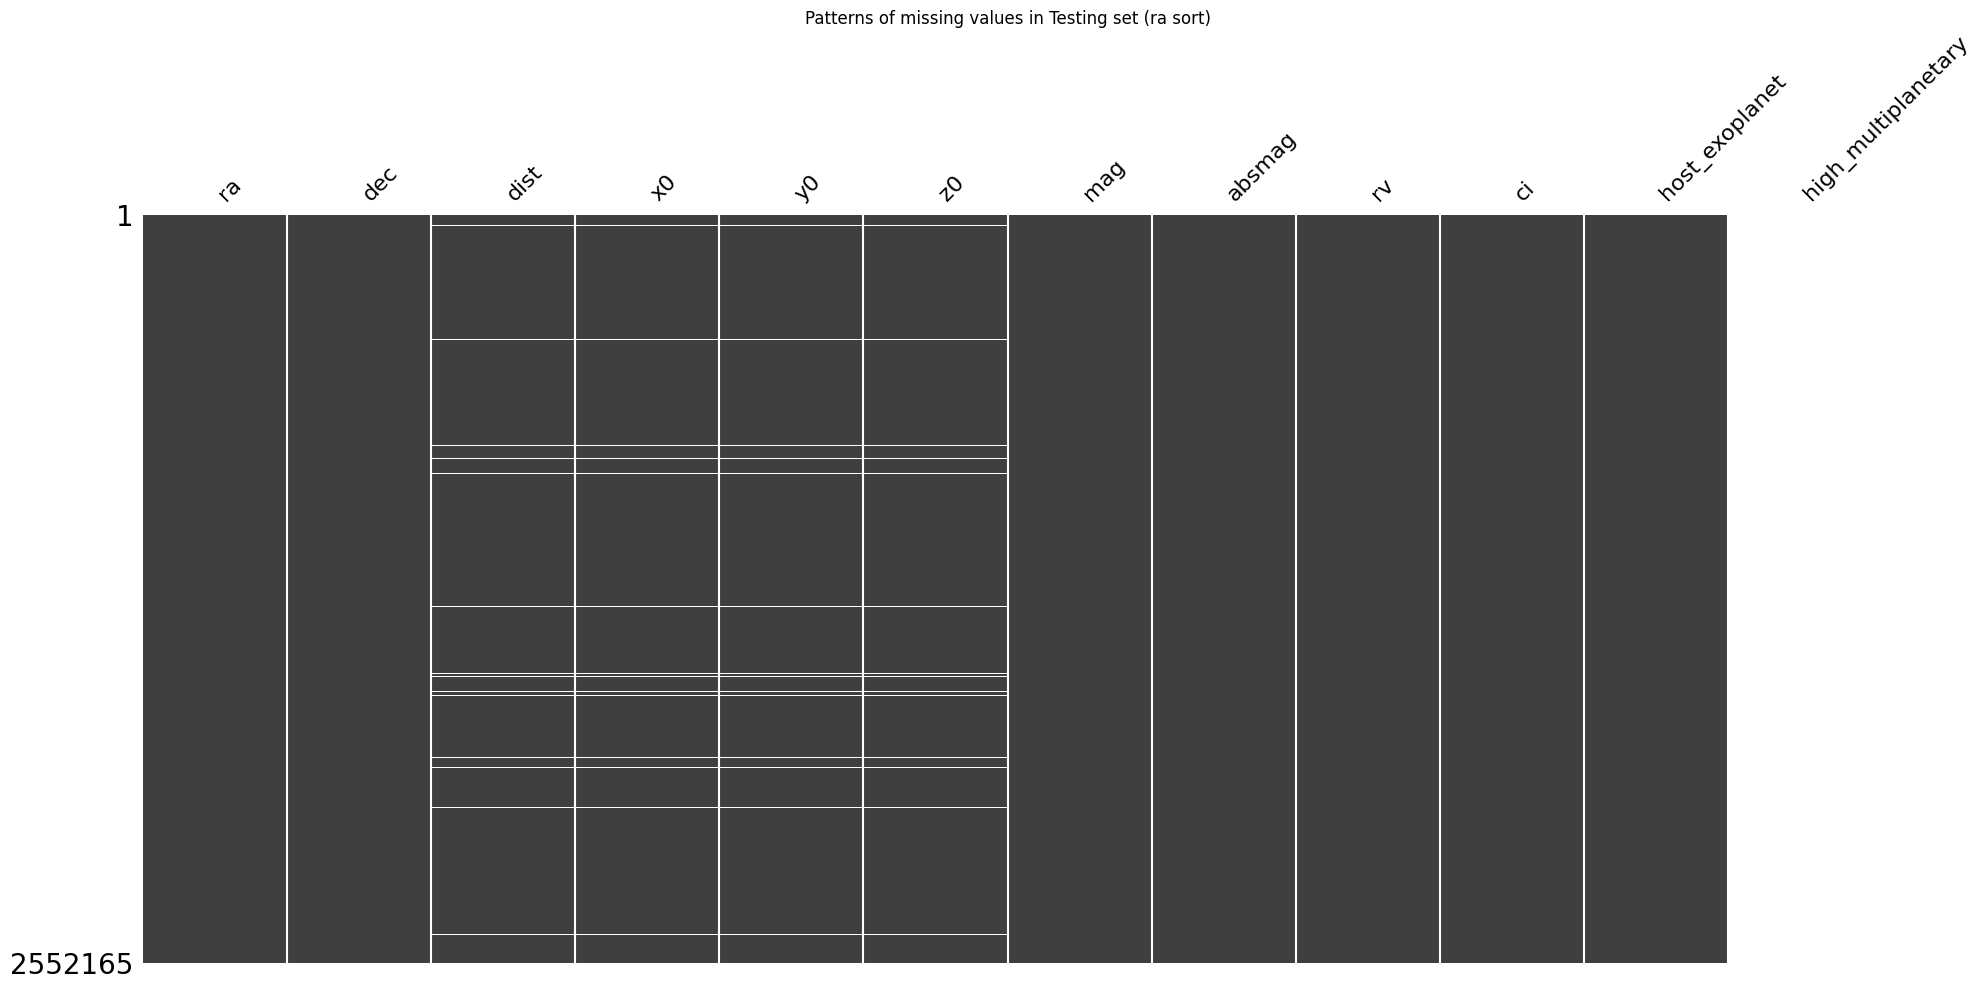

In [515]:
plot_data_with_stacked_bars(df_at_hyg, 'ra')

<AxesSubplot: >

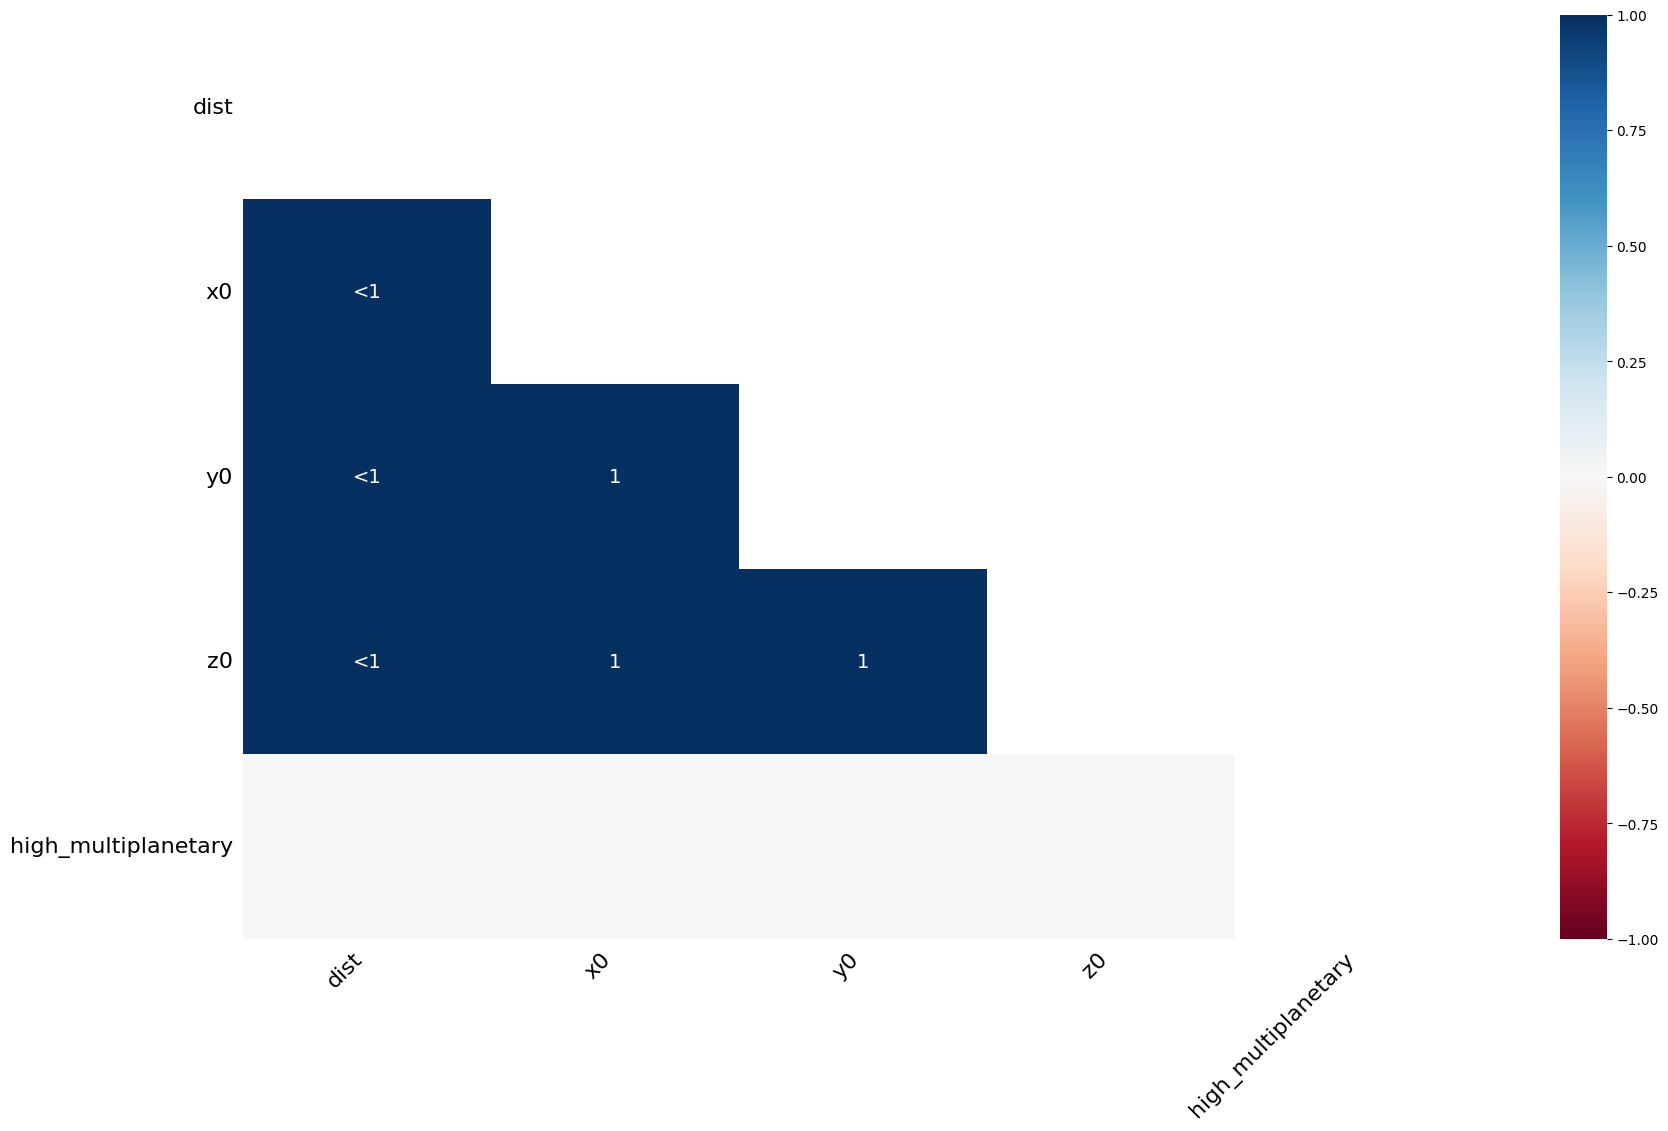

In [529]:
msno.heatmap(df_at_hyg)

No categorical columns to encode here. Just MICE imputation on numerical columns.